1. Проверка на лики в данных, т.к. данные уже разбиты на тренировку и тест. Шаги для проверки утечки данных:
 - Понимание данных;
 - Проверка напрямую на утечку (дубликаты ID);
 - Анализ корреляций;
 - Проверка взаимосвязей между признаками и целевой переменной;
 - Использование модельных методов;
 - Использование инструментов для автоматической реализации решения задачи регрессии.


In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# Понимание данных;
# Загрузка данных:
train_data = pd.read_csv("train_test_data/train_data.csv")
test_data = pd.read_csv("train_test_data/test_data.csv")


In [3]:
# Обзор размеров наборов данных:
print(f"Размер обучающего набора: {train_data.shape}")
print(f"Размер тестового набора: {test_data.shape}")


Размер обучающего набора: (145906, 63)
Размер тестового набора: (75925, 62)


In [4]:
# Просмотр первых 5 строк
print("Обучающий набор данных:")
print(train_data.head())

print("\nТестовый набор данных:")
print(test_data.head())


Обучающий набор данных:
       ID  cat_0  cat_1  cat_2  cat_3  cat_4  cat_5      num_0  num_7  \
0  363500     54      8    682      4   1325      2  11.677298    0.0   
1   77605     68      8    682      4   1334      2        NaN    0.0   
2   23410    205      8    682      4   1276      3        NaN    0.0   
3  119647    205     14    891      4   2964      2        NaN    0.0   
4  230755    207      0    682      0   1366      2        NaN    0.0   

    num_36  ...  num_32  num_30  num_50    num_14  num_37    num_46    num_12  \
0  11.8748  ...   147.0     1.0    66.0  112552.0   152.0  1.000000  1.000000   
1   0.0000  ...   203.0     1.0    33.0   86131.0   234.0  1.000000  1.000000   
2   0.0000  ...   168.0     1.0    46.0  112968.0   163.0  1.000000  1.000000   
3   0.0000  ...    -1.0     0.0     3.0     279.0    -1.0  0.000000  0.000000   
4   0.0000  ...   143.0     1.0    22.0   86052.0   191.0  0.121375  0.123628   

     num_18  num_16    target  
0  1.000000       

In [5]:
# Информация о наборе данных
print("\nИнформация об обучающем наборе данных:")
print(train_data.info())

print("\nИнформация о тестовом наборе данных:")
print(test_data.info())



Информация об обучающем наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145906 entries, 0 to 145905
Data columns (total 63 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      145906 non-null  int64  
 1   cat_0   145906 non-null  int64  
 2   cat_1   145906 non-null  int64  
 3   cat_2   145906 non-null  int64  
 4   cat_3   145906 non-null  int64  
 5   cat_4   145906 non-null  int64  
 6   cat_5   145906 non-null  int64  
 7   num_0   7448 non-null    float64
 8   num_7   145906 non-null  float64
 9   num_36  145906 non-null  float64
 10  num_2   145906 non-null  float64
 11  num_24  7448 non-null    float64
 12  num_27  22855 non-null   float64
 13  num_1   145906 non-null  float64
 14  num_43  145906 non-null  float64
 15  num_39  119023 non-null  float64
 16  num_10  67710 non-null   float64
 17  num_23  145906 non-null  float64
 18  num_40  145906 non-null  float64
 19  num_22  145906 non-null  float64
 20  num_47  

In [6]:
# Функция для подсчёта пропущенных значений
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}
    )
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0
    ].sort_values(by='% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

print("Пропущенные значения в обучающем наборе данных:")
print(missing_values_table(train_data))

print("\nПропущенные значения в тестовом наборе данных:")
print(missing_values_table(test_data))


Пропущенные значения в обучающем наборе данных:
        Missing Values  % of Total Values
num_0           138458               94.9
num_24          138458               94.9
num_27          123051               84.3
num_10           78196               53.6
num_39           26883               18.4
num_38            8719                6.0

Пропущенные значения в тестовом наборе данных:
        Missing Values  % of Total Values
num_0            72765               95.8
num_24           72765               95.8
num_27           66257               87.3
num_10           43399               57.2
num_39           16731               22.0
num_38            5253                6.9


In [7]:
# я думала над интуитивной и понятной визуализацией;
# оставновилась на трех подходах: (TODO, если останеться время, попробовать другие подходы);


Количество признаков с >10.0% пропусков в обучающем наборе: 5
Количество признаков с >10.0% пропусков в тестовом наборе: 5


<Figure size 2000x1000 with 0 Axes>

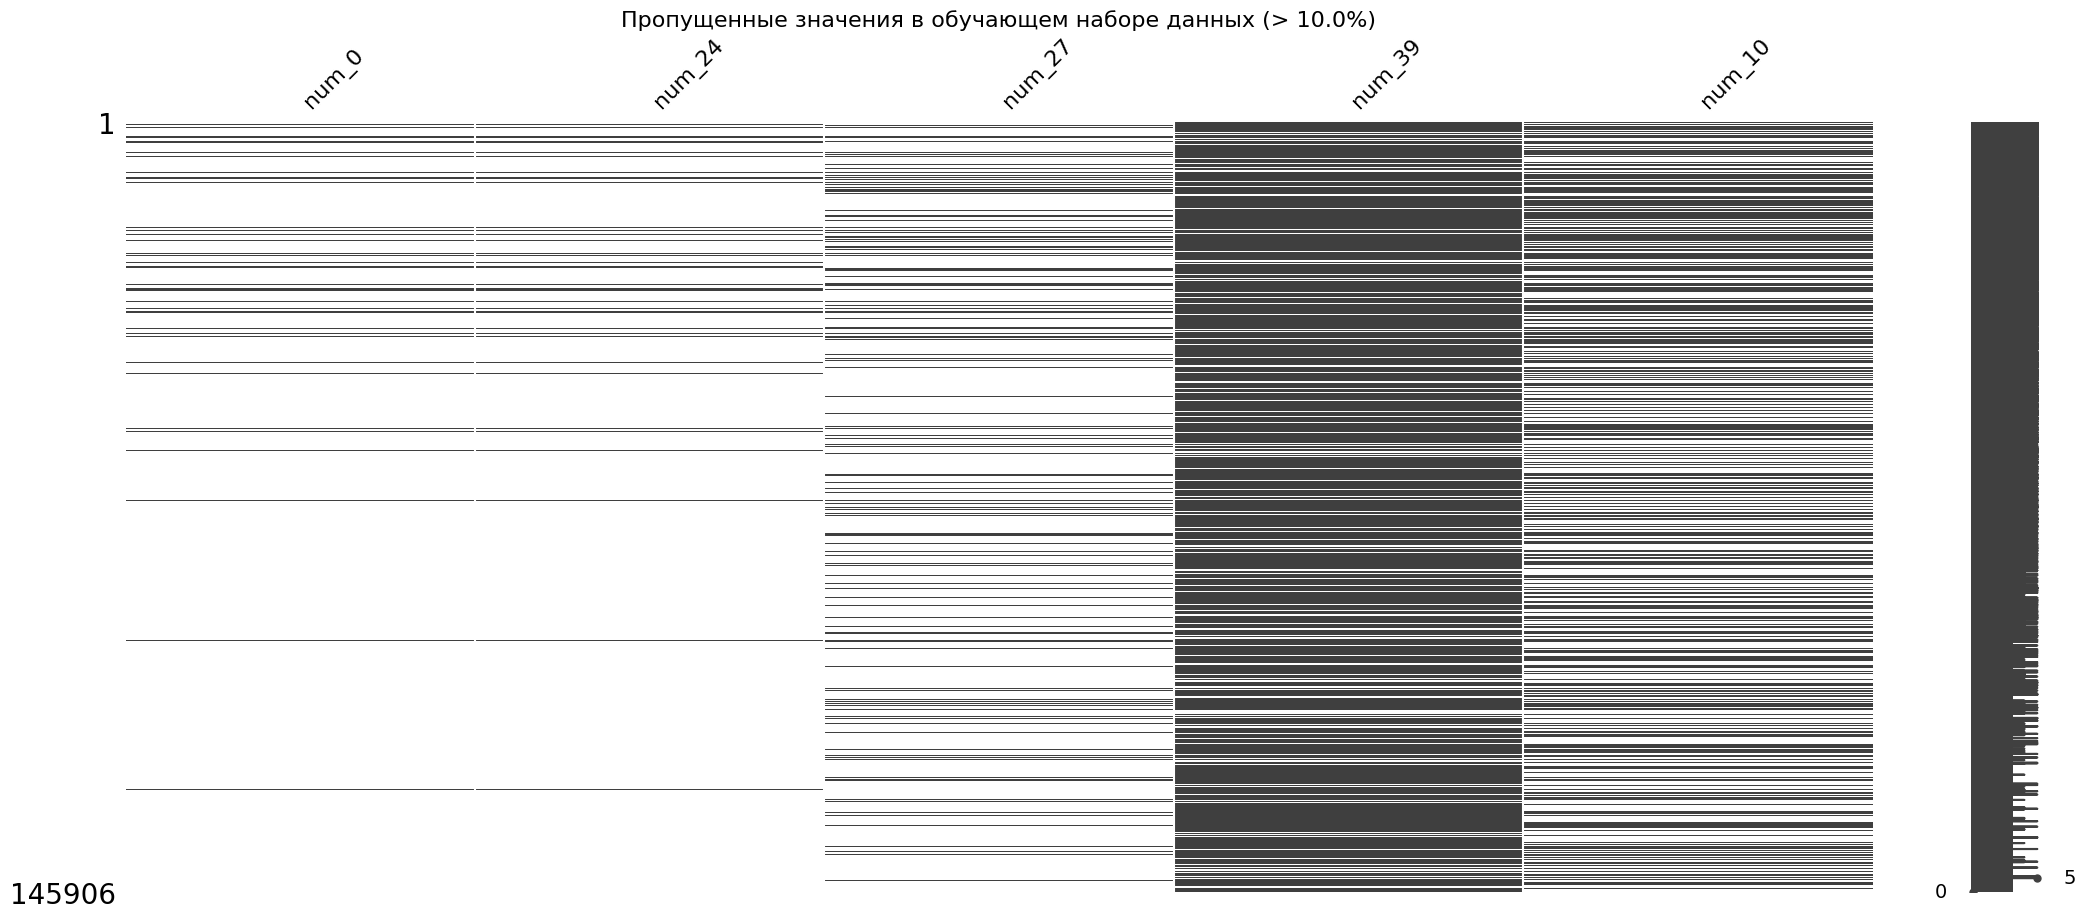

<Figure size 2000x1000 with 0 Axes>

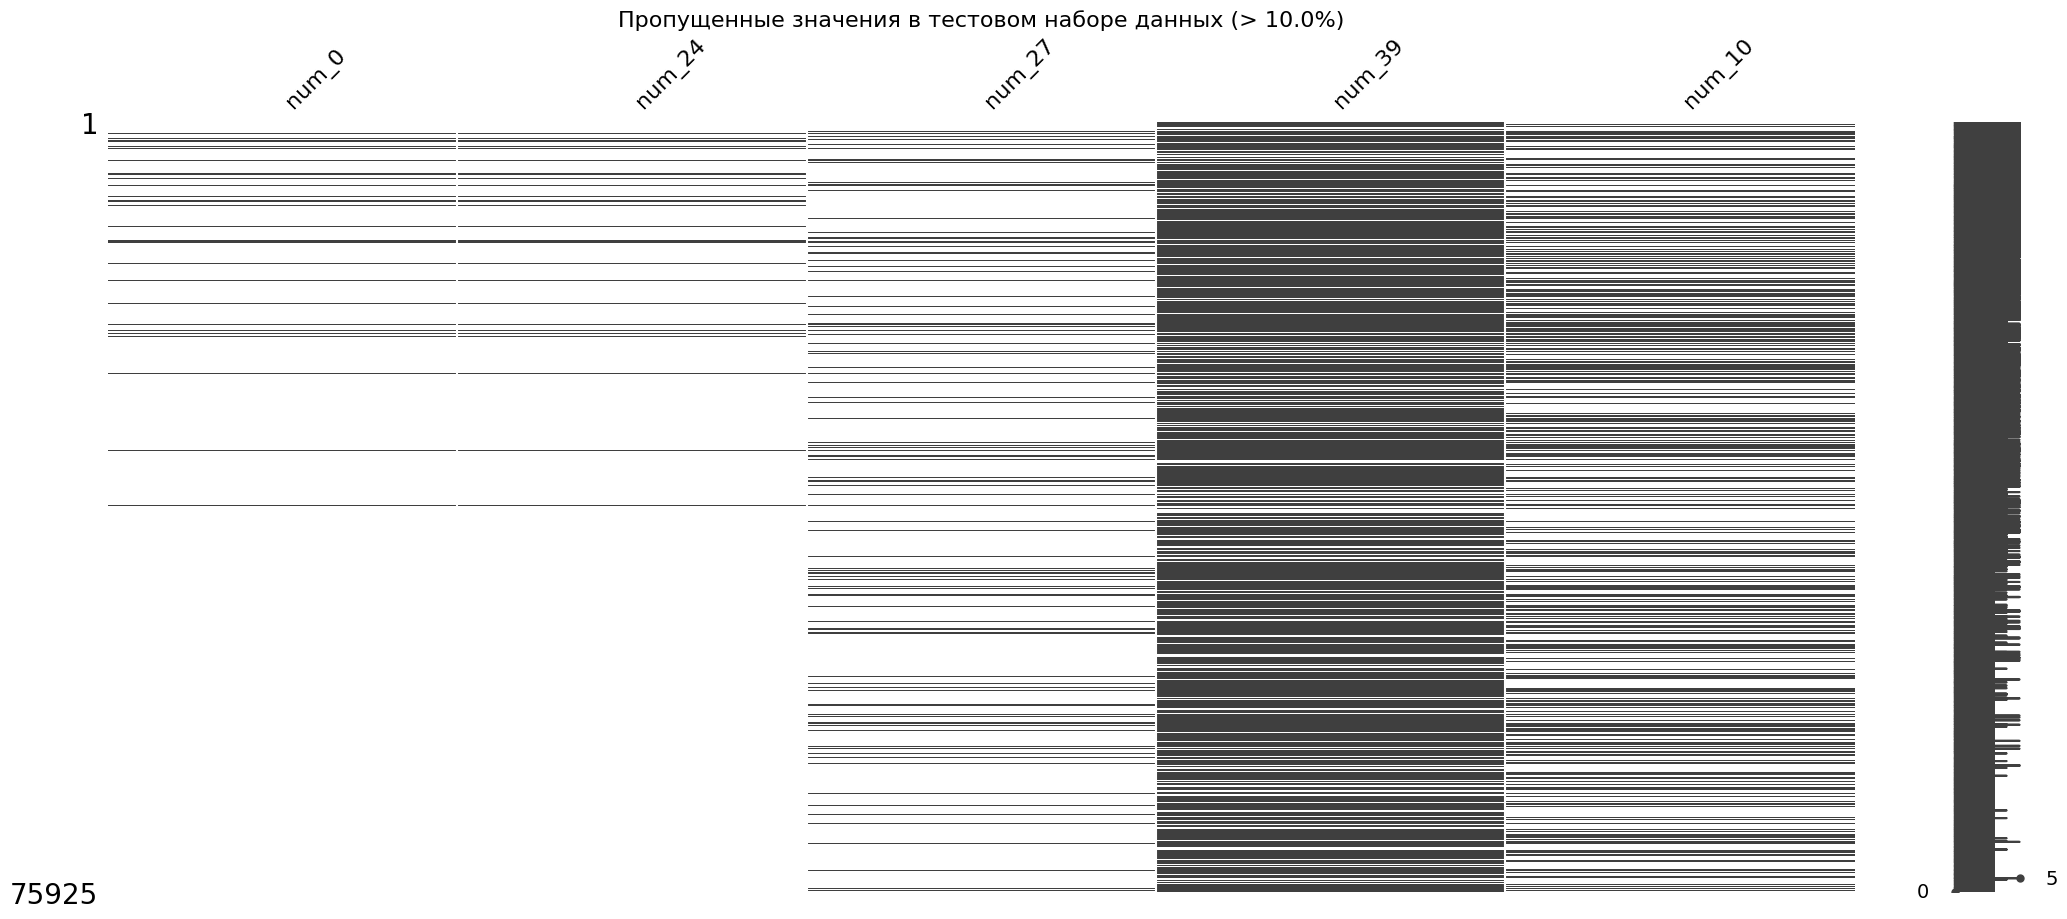

In [8]:
# Первый подход: 
# Есть такой фокус, выбрать порог пропущенных значений, в моем случае выше 10% (TODO попробовать 5%)
# Функция для выбора колонок с пропусками выше заданного порога:
def get_columns_with_missingness(df, threshold):
    return df.columns[df.isnull().mean() > threshold].tolist()

def plot_missing_matrix(df, columns, title):
    plt.figure(figsize=(20, 10))  # Увеличенный размер фигуры для лучшей читаемости
    msno.matrix(df[columns])
    plt.title(title, fontsize=16)
    plt.show()

# Определим порог, например, 10%
threshold = 0.10

# Получение списка колонок с пропусками выше порога в 10 %
missing_train = get_columns_with_missingness(train_data, threshold)
missing_test = get_columns_with_missingness(test_data, threshold)

print(f"Количество признаков с >{threshold*100}% пропусков в обучающем наборе: {len(missing_train)}")
print(f"Количество признаков с >{threshold*100}% пропусков в тестовом наборе: {len(missing_test)}")

# Визуализация пропусков только для этих признаков
plot_missing_matrix(train_data, missing_train, f"Пропущенные значения в обучающем наборе данных (> {threshold*100}%)")
plot_missing_matrix(test_data, missing_test, f"Пропущенные значения в тестовом наборе данных (> {threshold*100}%)")


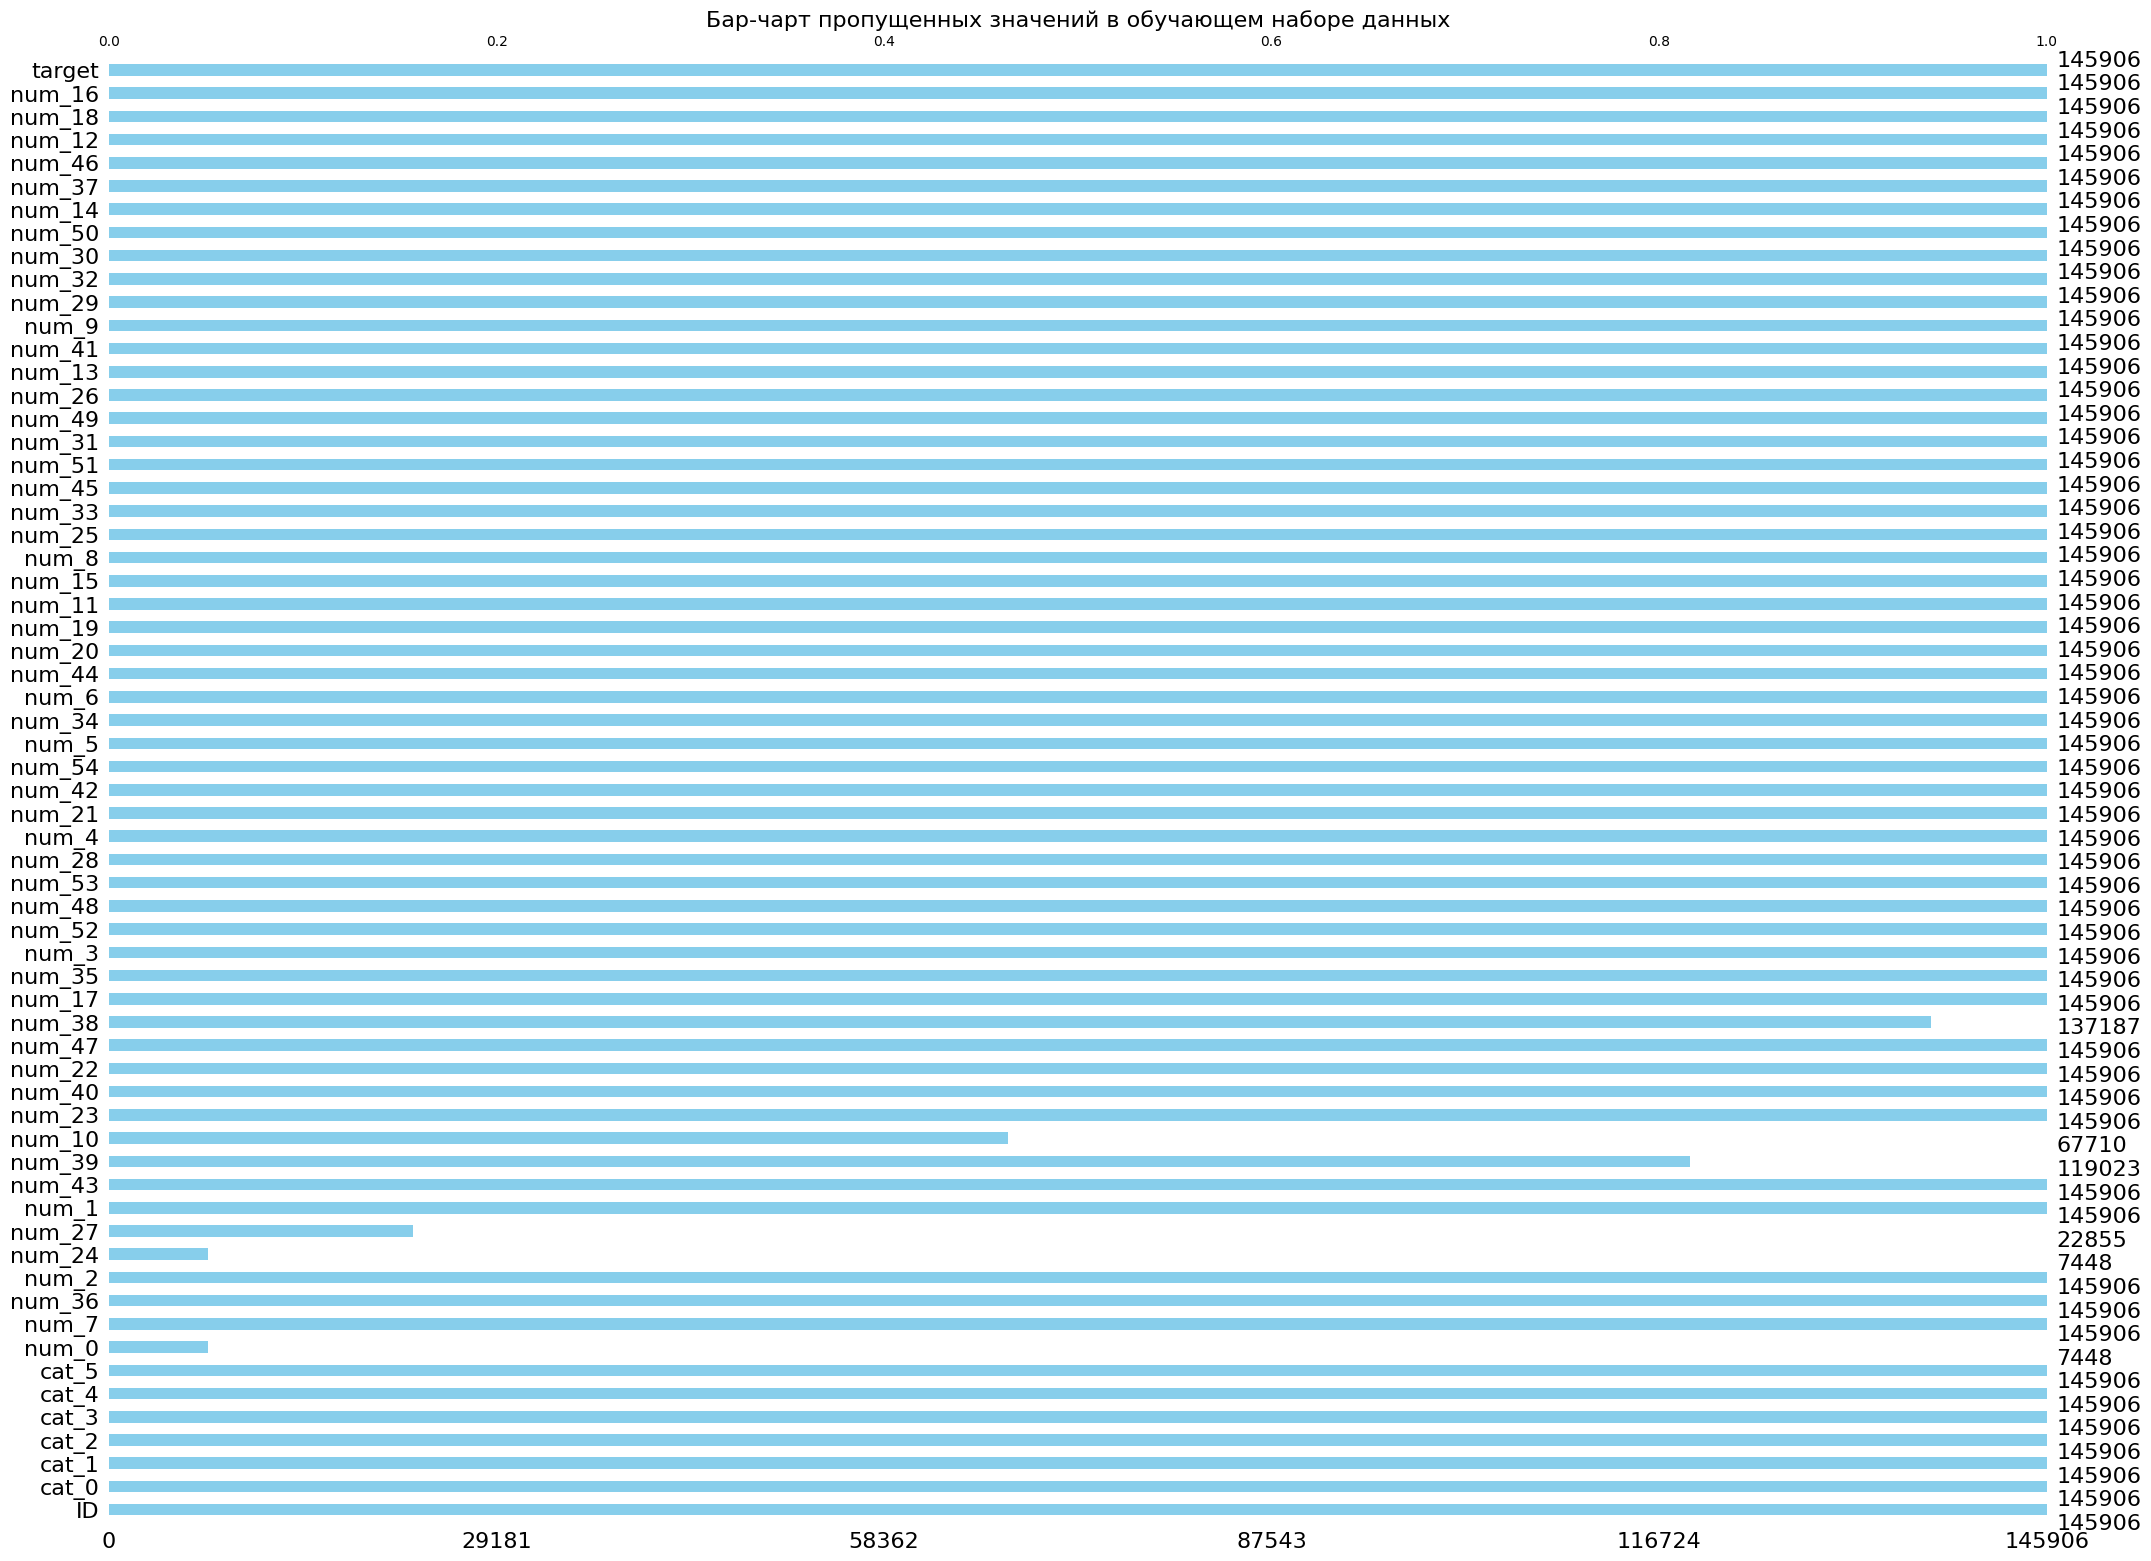

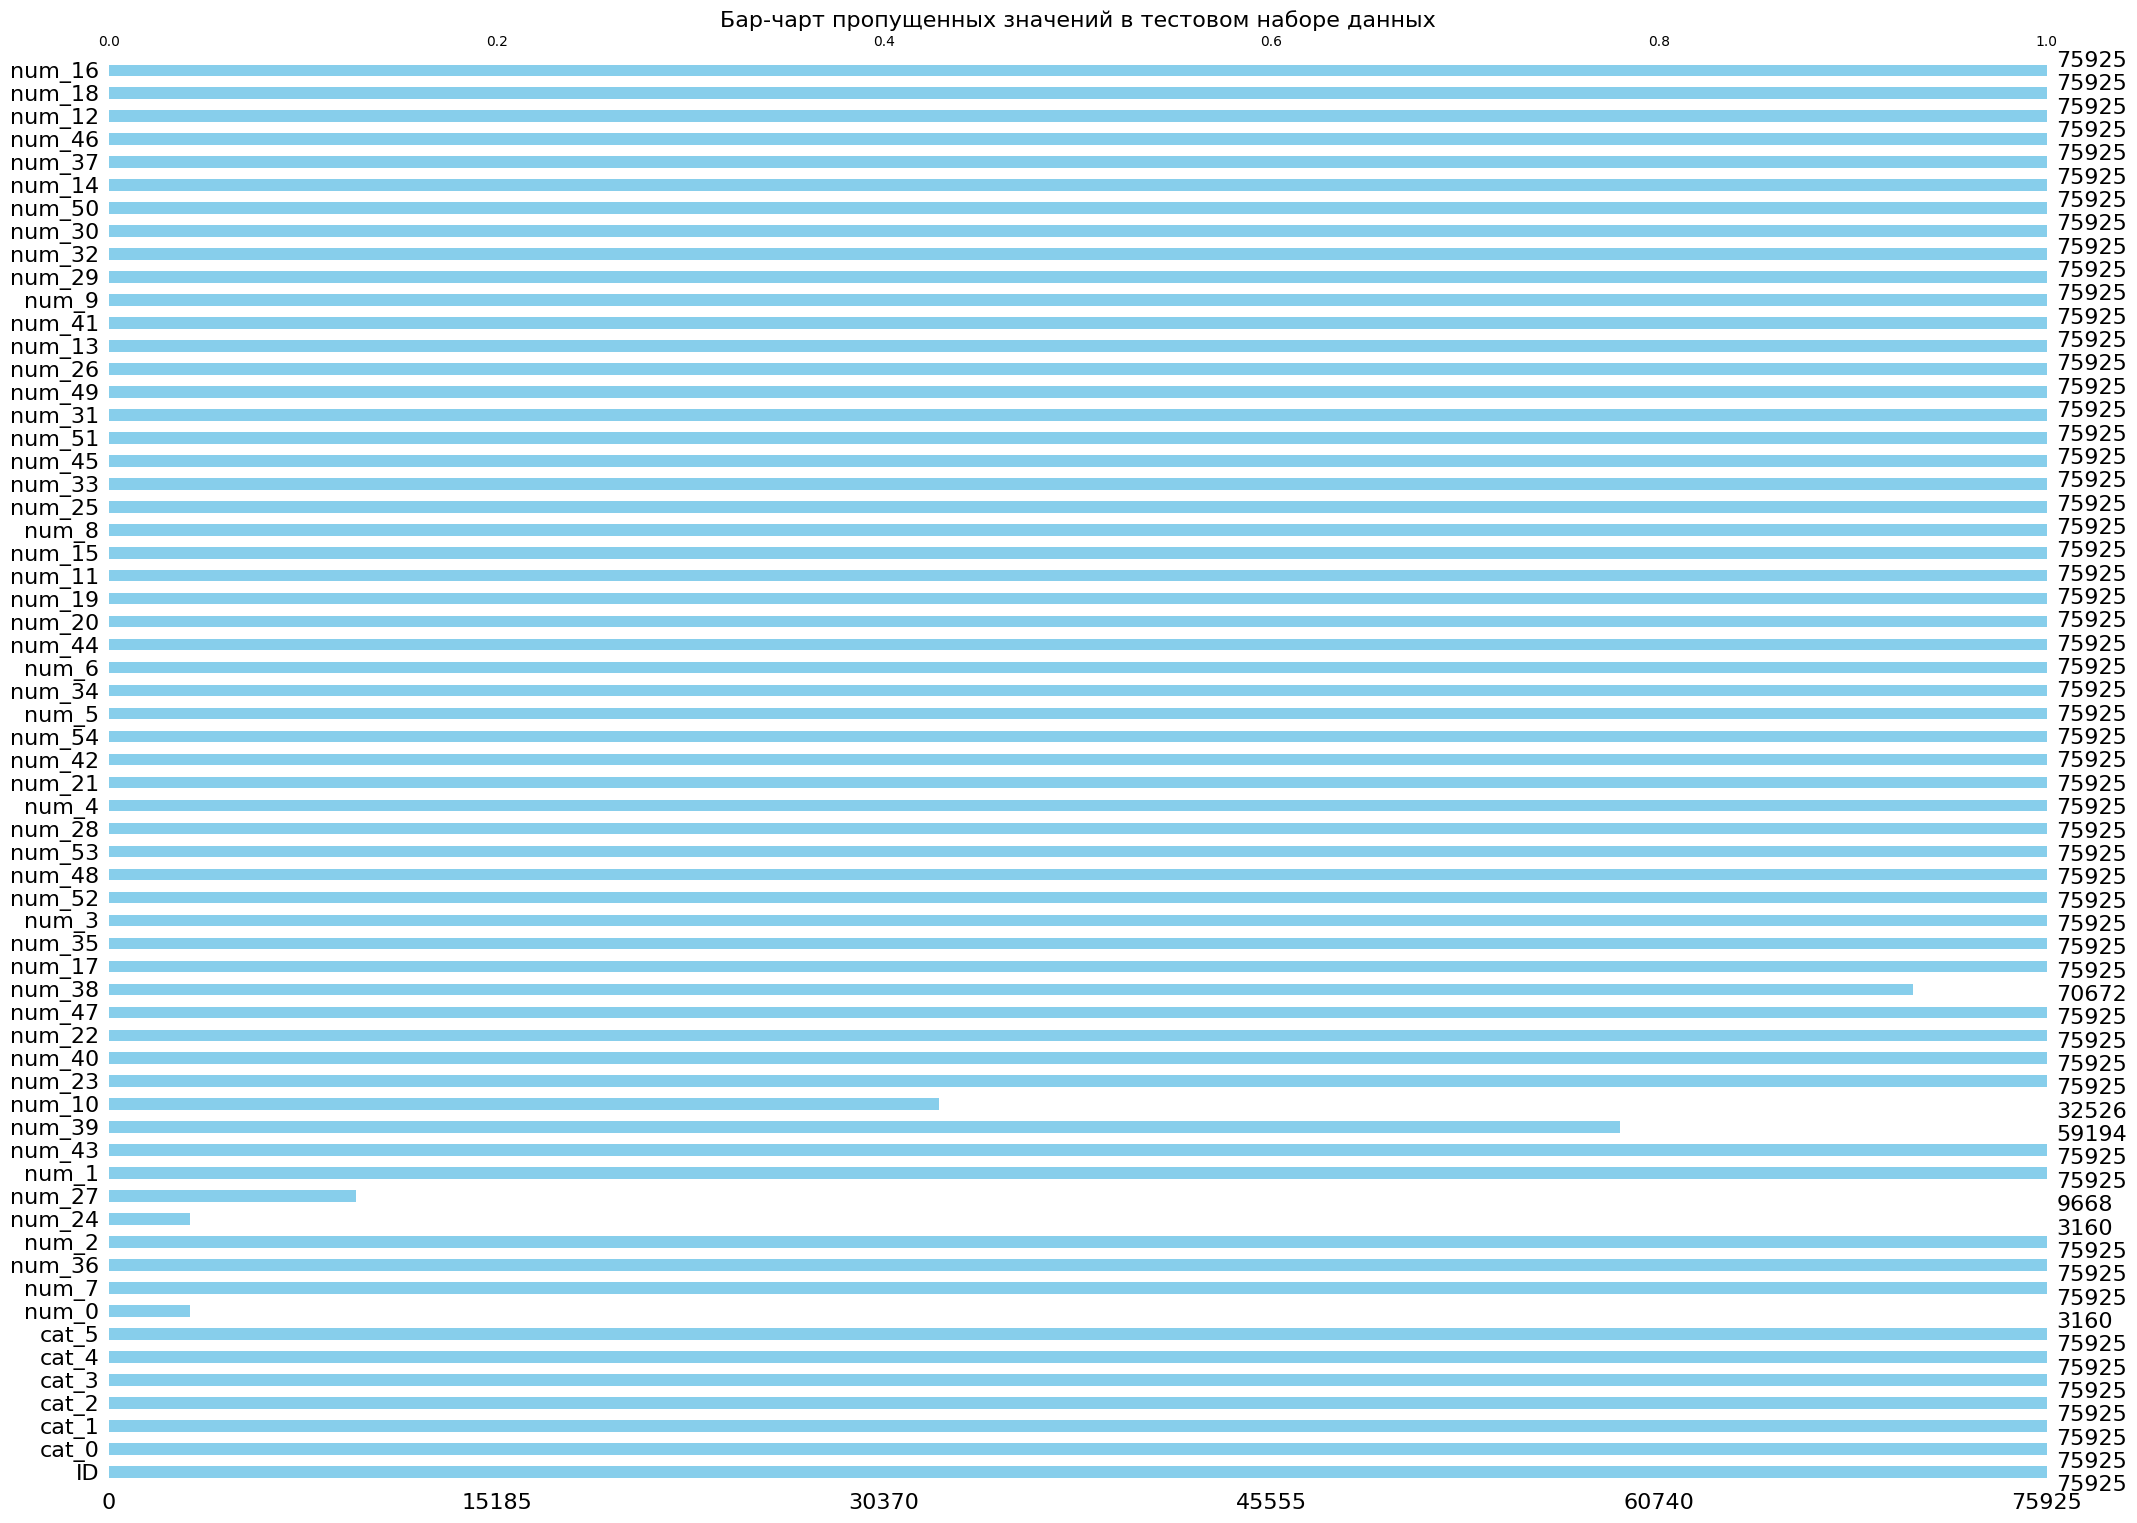

In [9]:
# Второй подход;
# Визуализация пропущенных значений с помощью bar-chart для обучающего набора:
plt.figure(figsize=(20, 10))
msno.bar(train_data, color='skyblue')
plt.title("Бар-чарт пропущенных значений в обучающем наборе данных", fontsize=16)
plt.show()

# Визуализация пропущенных значений с помощью bar-chart для тестового набора
plt.figure(figsize=(20, 10))
msno.bar(test_data, color='skyblue')
plt.title("Бар-чарт пропущенных значений в тестовом наборе данных", fontsize=16)
plt.show()


<Figure size 2000x1000 with 0 Axes>

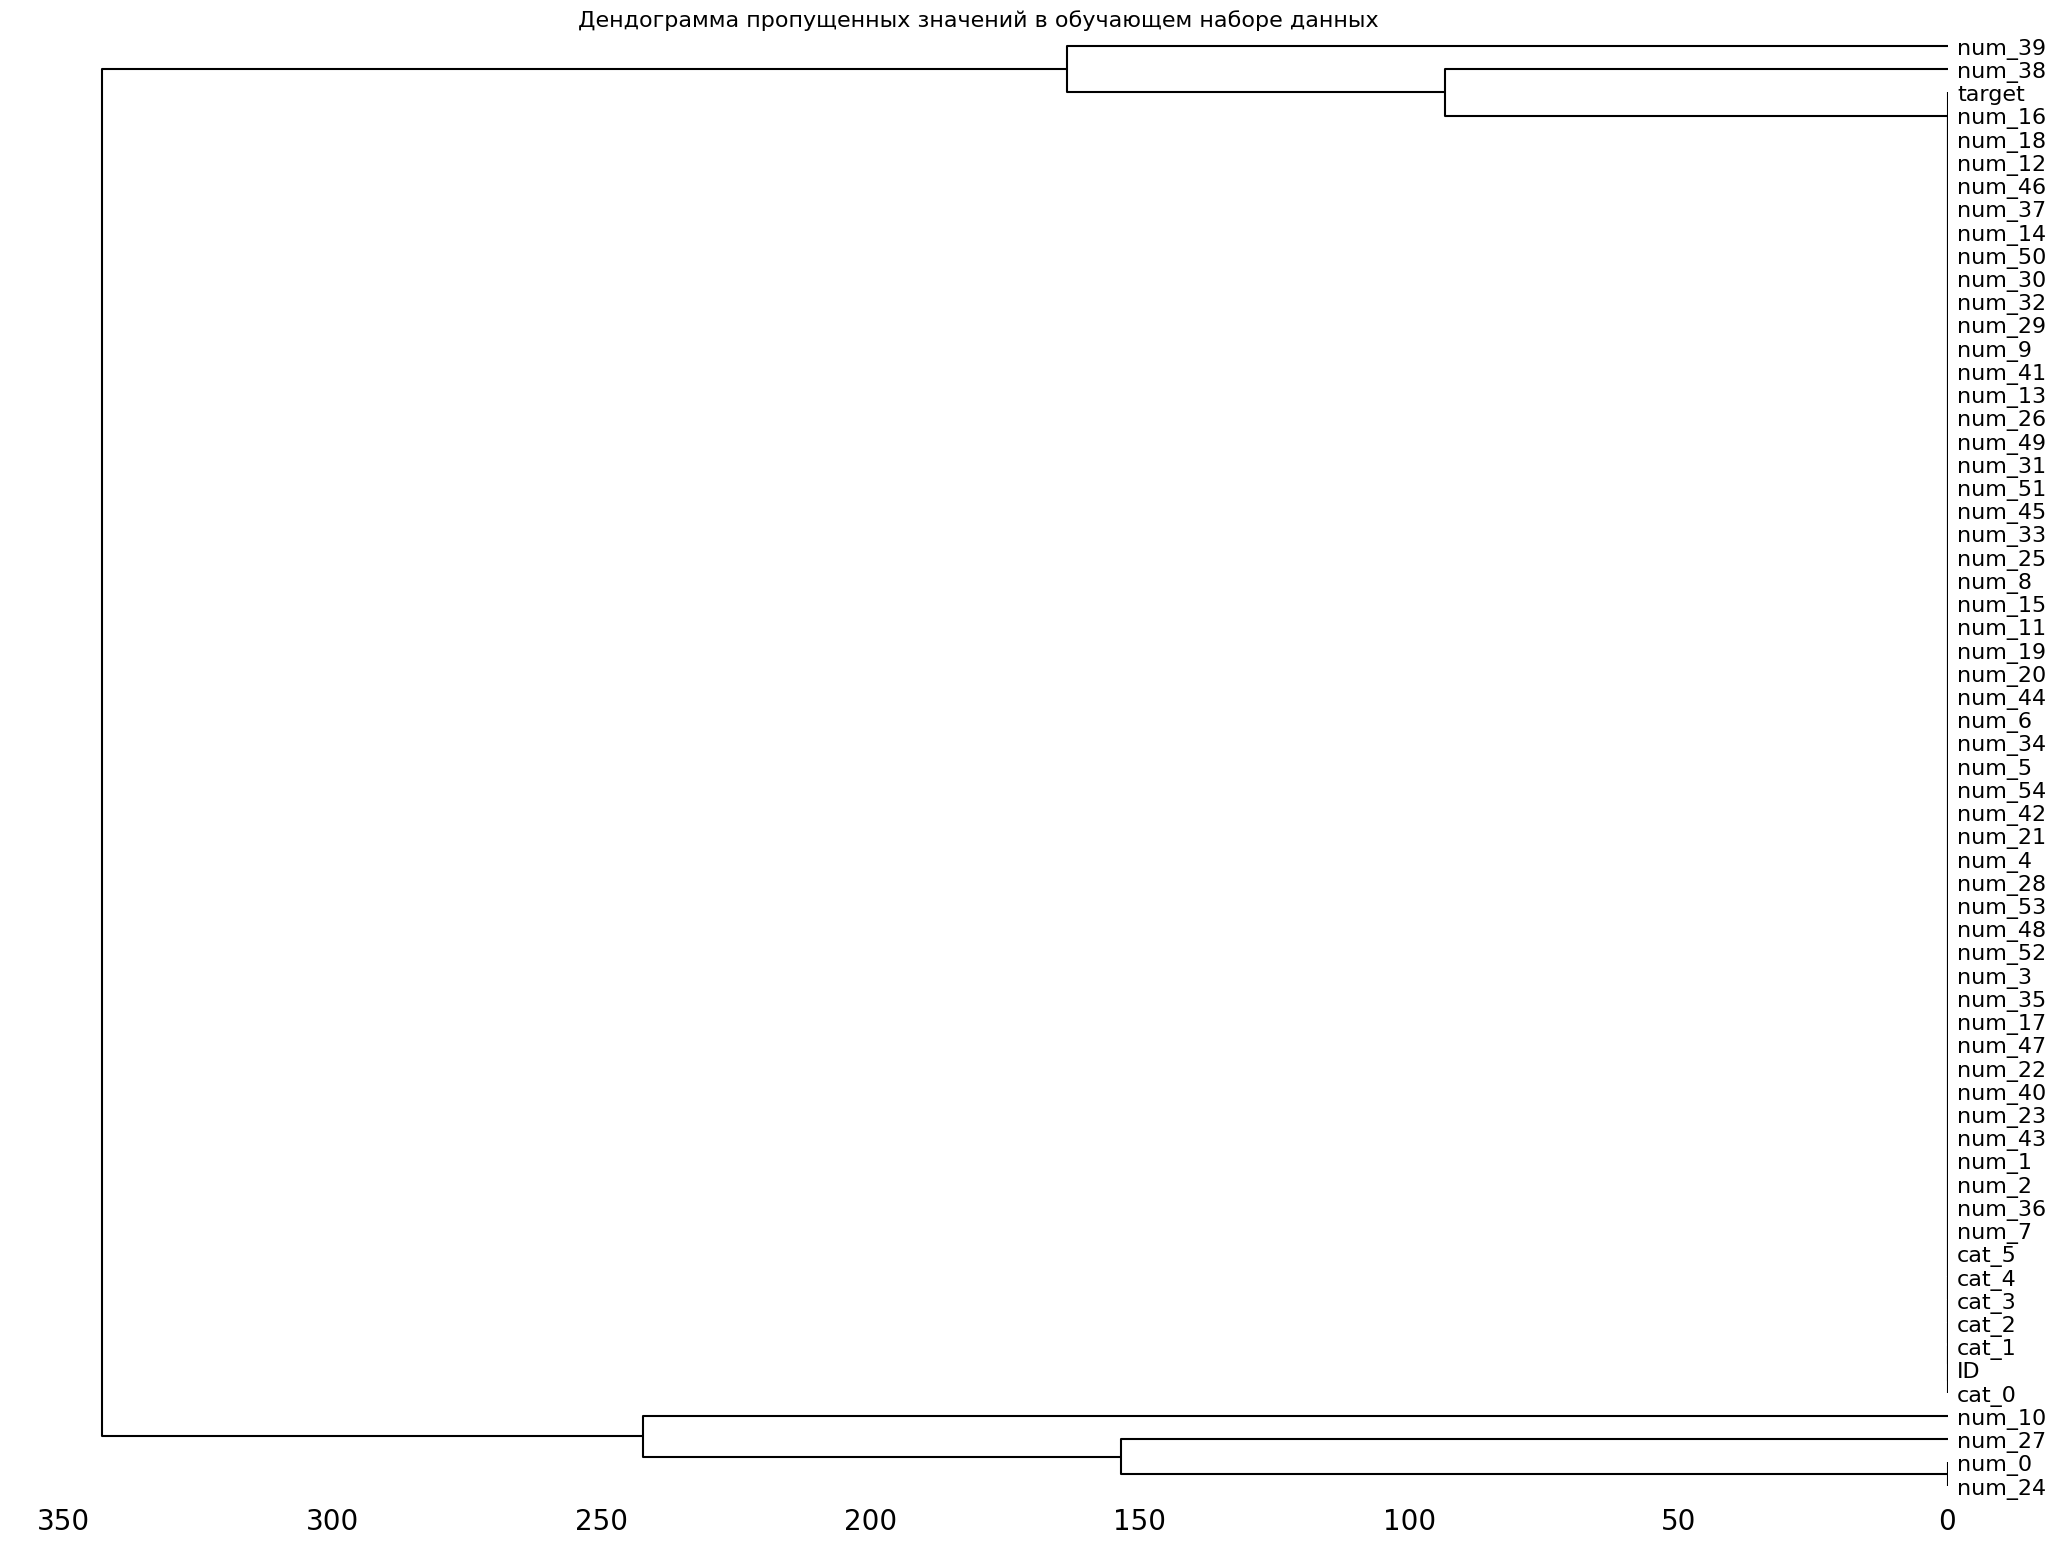

<Figure size 2000x1000 with 0 Axes>

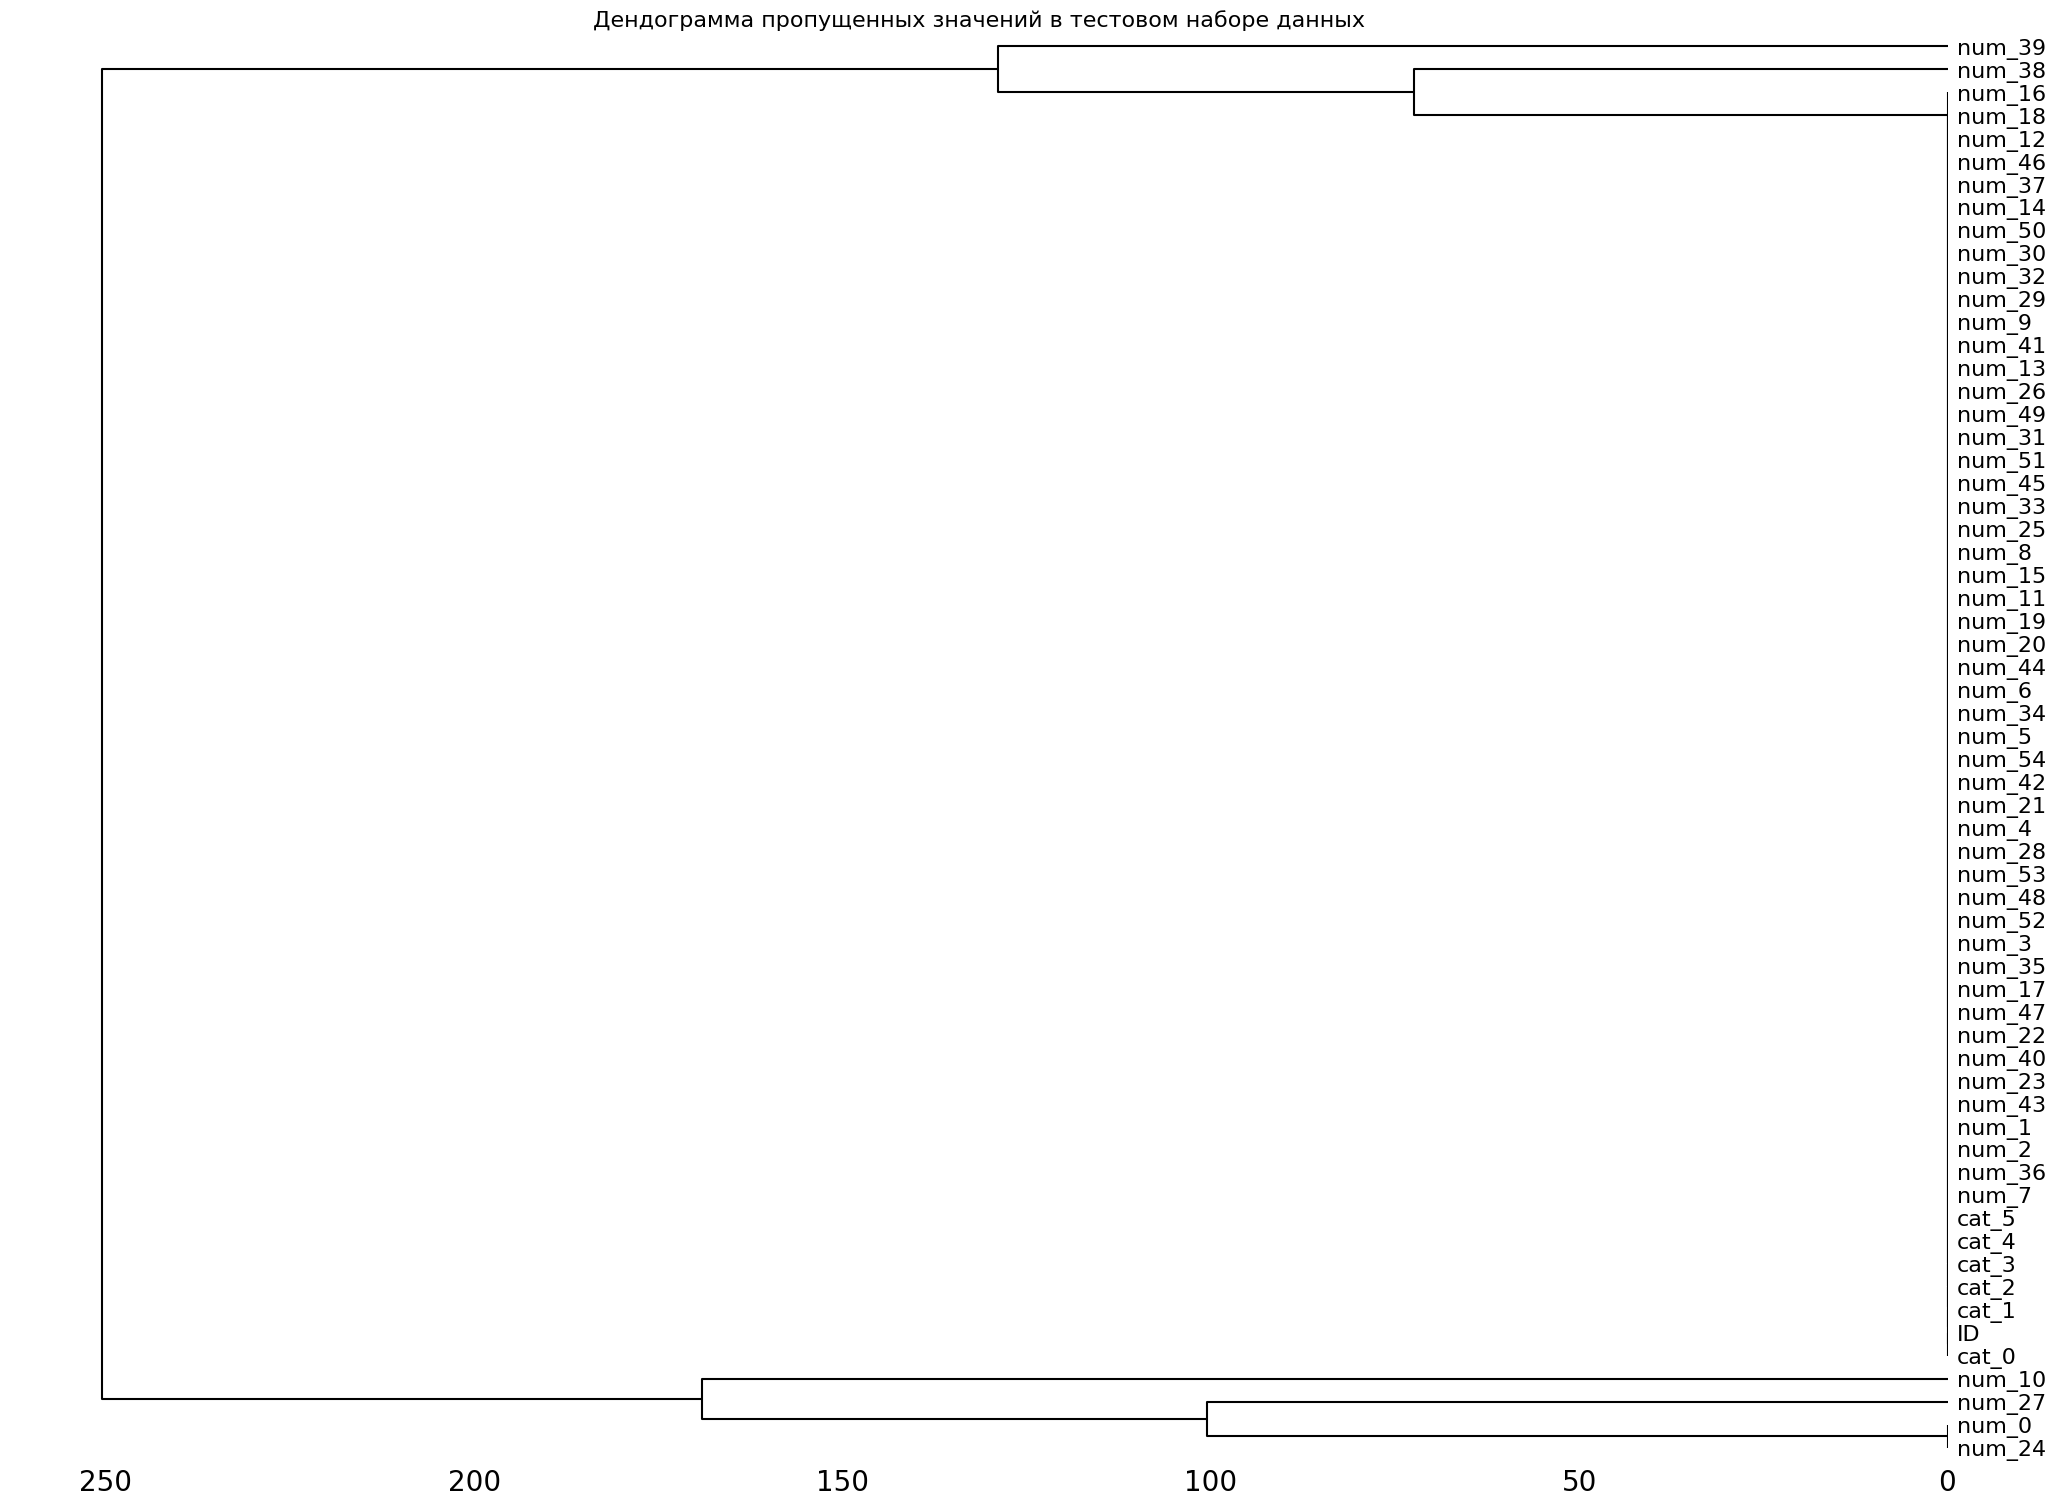

In [10]:
# Третий подход, Иерархическая класстеризациия, они же дендограммы
# Визуализация пропущенных значений с помощью dendrogram для обучающего набора
plt.figure(figsize=(20, 10))
msno.dendrogram(train_data)
plt.title("Дендограмма пропущенных значений в обучающем наборе данных", fontsize=16)
plt.show()

# Визуализация пропущенных значений с помощью dendrogram для тестового набора
plt.figure(figsize=(20, 10))
msno.dendrogram(test_data)
plt.title("Дендограмма пропущенных значений в тестовом наборе данных", fontsize=16)
plt.show()


Выводы:
 - обратить внимание на колонки: тренировочный набор данных --> num_38, num_16, num_39, num_10, num_27, num_0, num_24;
 - обратить внимание на колонки: тестовой набор данных --> num_38, num_18, num_39, num_10, num_27, num_0, num_24;
 - колонки с пропущенными значениями

In [11]:
# Проверка напрямую на утечку (дубликаты ID)
# Проверка уникальности ID внутри каждого набора данных
train_unique = train_data['ID'].is_unique
test_unique = test_data['ID'].is_unique

print(f"Все ID в обучающем наборе уникальны: {train_unique}")
print(f"Все ID в тестовом наборе уникальны: {test_unique}")

# Если дубликаты есть, вывести их
if not train_unique:
    duplicate_train_ids = train_data[train_data.duplicated(subset='ID', keep=False)]['ID'].unique()
    print(f"Дублирующиеся ID в обучающем наборе: {duplicate_train_ids}")
    
if not test_unique:
    duplicate_test_ids = test_data[test_data.duplicated(subset='ID', keep=False)]['ID'].unique()
    print(f"Дублирующиеся ID в тестовом наборе: {duplicate_test_ids}")

# Проверка перекрытия ID между наборами данных
train_ids = set(train_data['ID'])
test_ids = set(test_data['ID'])

overlapping_ids = train_ids.intersection(test_ids)
num_overlaps = len(overlapping_ids)

print(f"\nКоличество перекрывающихся ID между обучающим и тестовым наборами: {num_overlaps}")

if num_overlaps > 0:
    print("Следующие ID повторяются в обоих наборах данных:")
    print(overlapping_ids)
    
    # Шаг 3: Удаление перекрывающихся записей из тестового набора
    test_data = test_data[~test_data['ID'].isin(overlapping_ids)]
    print(f"Удалено {num_overlaps} перекрывающихся записей из тестового набора.")
    
    # Повторная проверка
    train_ids = set(train_data['ID'])
    test_ids = set(test_data['ID'])
    overlapping_ids = train_ids.intersection(test_ids)
    num_overlaps = len(overlapping_ids)

    print(f"\nПосле удаления перекрытий, количество перекрывающихся ID: {num_overlaps}")
else:
    print("Нет перекрывающихся ID между обучающим и тестовым наборами.")


Все ID в обучающем наборе уникальны: True
Все ID в тестовом наборе уникальны: True

Количество перекрывающихся ID между обучающим и тестовым наборами: 0
Нет перекрывающихся ID между обучающим и тестовым наборами.


In [12]:
# Чтобы понять, как обработать пропуски, я проведу анализ корреляций, 
# Для это произведу заменуЗначений -1 на NaN в числовых переменных:
num_cols = [col for col in train_data.columns if col.startswith('num_') and col != 'target']
train_data[num_cols] = train_data[num_cols].replace(-1, np.nan)
test_data[num_cols] = test_data[num_cols].replace(-1, np.nan)


In [13]:
# Настройки отображения
%matplotlib inline
sns.set(style="whitegrid")


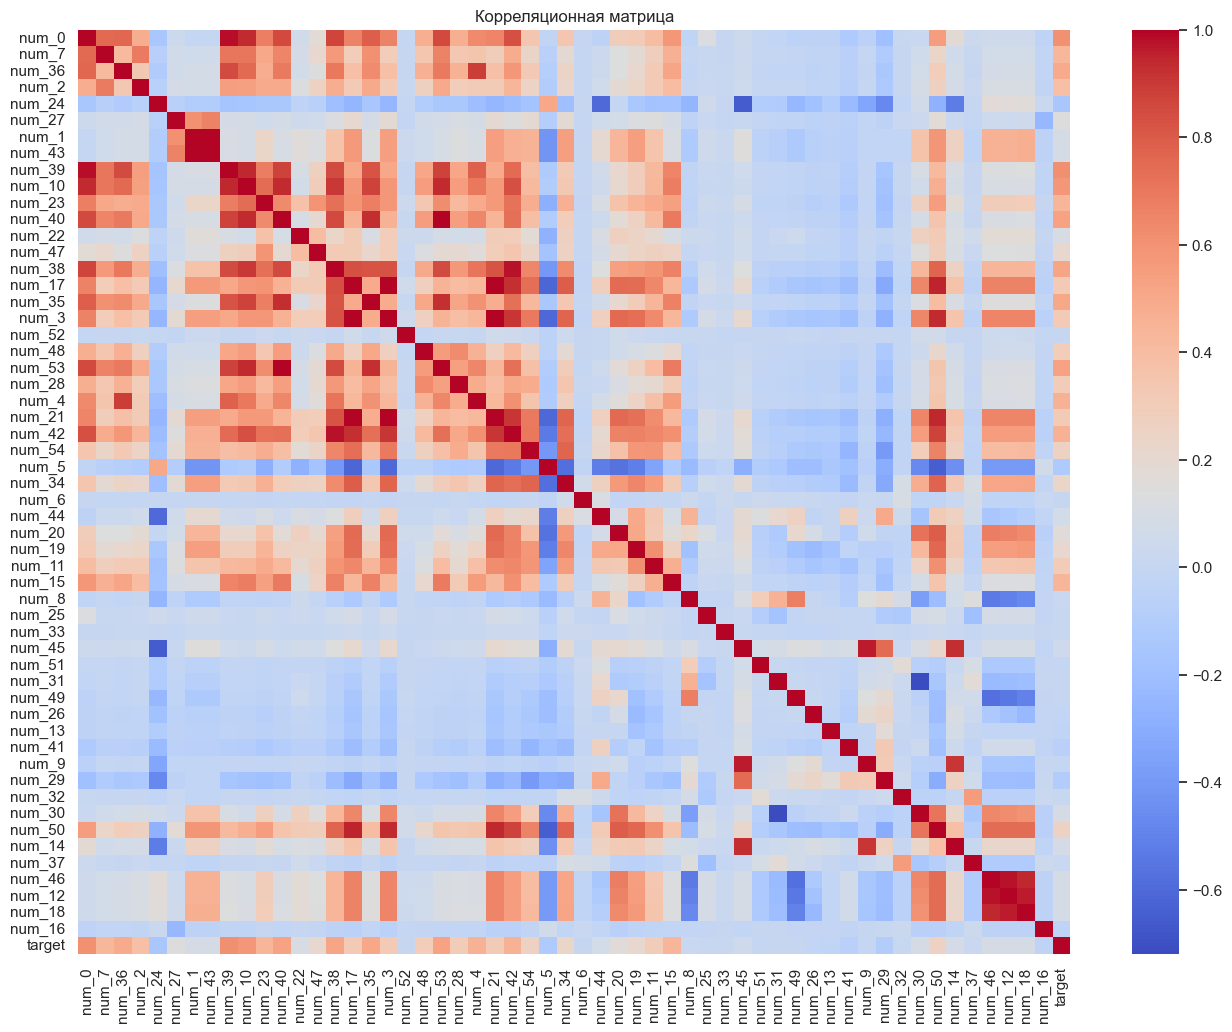


Топ 10 признаков по корреляции с целевой переменной:
num_39    0.611829
num_0     0.610128
num_10    0.582436
num_40    0.532688
num_53    0.531398
num_38    0.519152
num_35    0.503545
num_36    0.494610
num_4     0.462333
num_42    0.456978
Name: target, dtype: float64


In [14]:
# Анализ корреляций
corr_matrix = train_data[num_cols + ['target']].corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

corr_target = corr_matrix['target'].abs().sort_values(ascending=False)
print("\nТоп 10 признаков по корреляции с целевой переменной:")
print(corr_target[1:11])


Матрица корреляций подсветила эти колонки, конечно, не 95% корреляция, вместе с тем, прежде чем их удалить, проведем еще одну визуализацию:

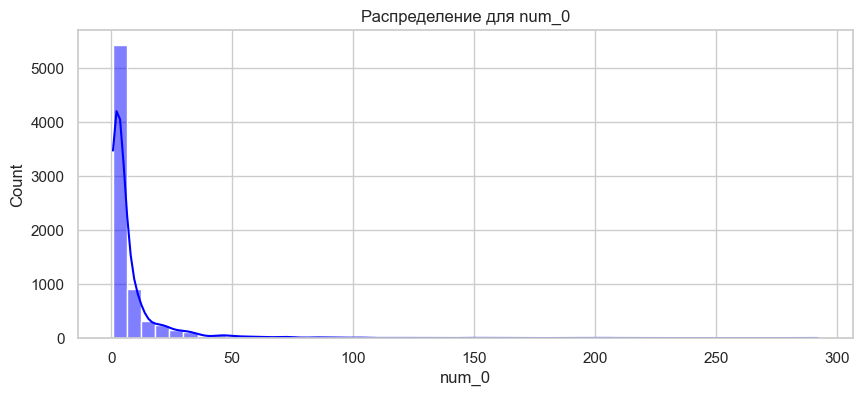

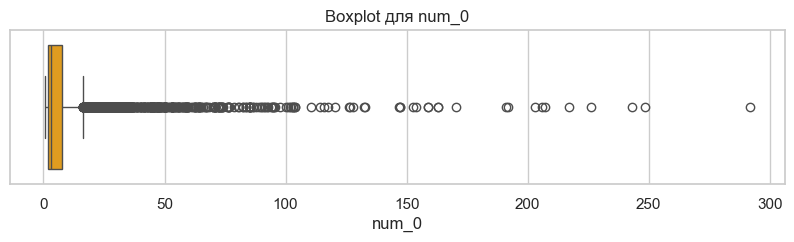

Статистические характеристики для num_0:
count    7448.000000
mean        8.135664
std        15.953880
min         0.722209
25%         1.725044
50%         2.936137
75%         7.566137
max       291.787225
Name: num_0, dtype: float64




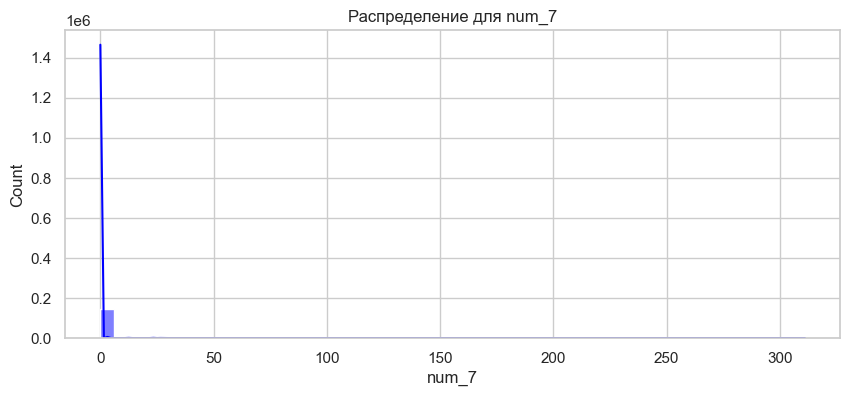

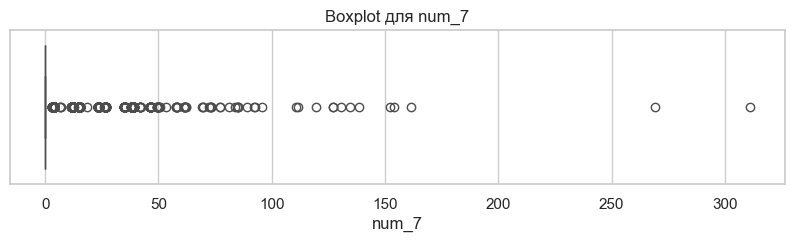

Статистические характеристики для num_7:
count    145906.000000
mean          0.196348
std           2.612937
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         311.000000
Name: num_7, dtype: float64




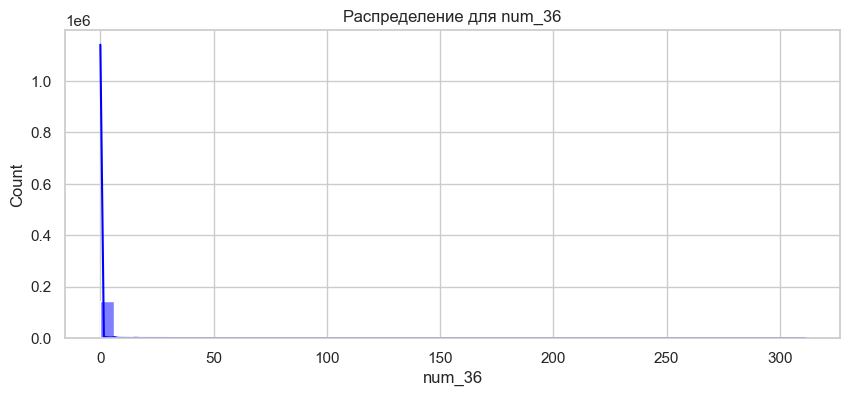

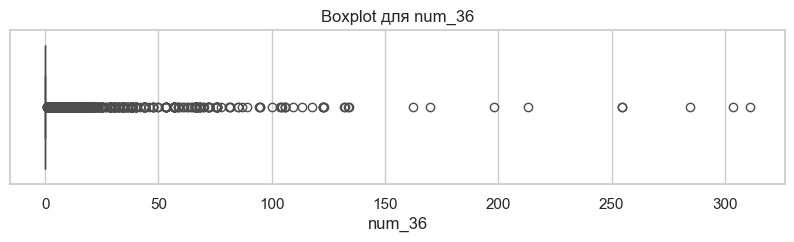

Статистические характеристики для num_36:
count    145906.000000
mean          0.266069
std           3.299882
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         311.000000
Name: num_36, dtype: float64




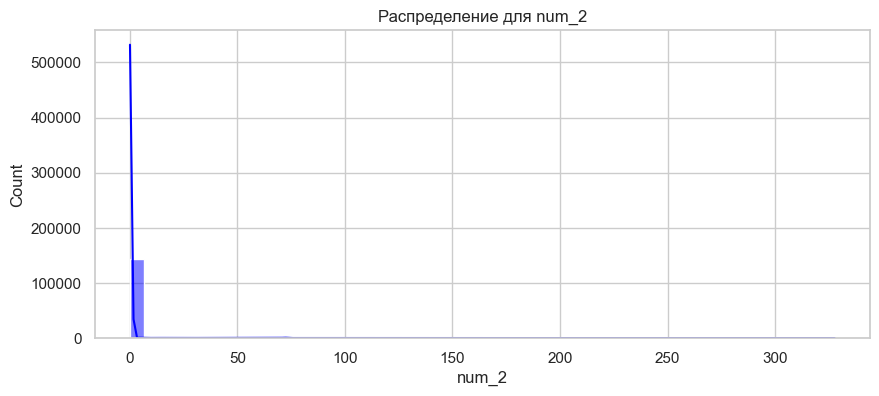

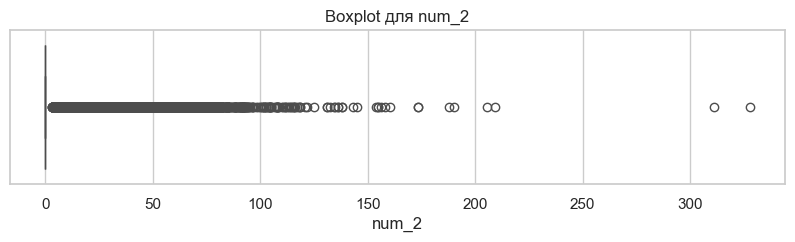

Статистические характеристики для num_2:
count    145906.000000
mean          0.909106
std           7.576602
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         327.679476
Name: num_2, dtype: float64




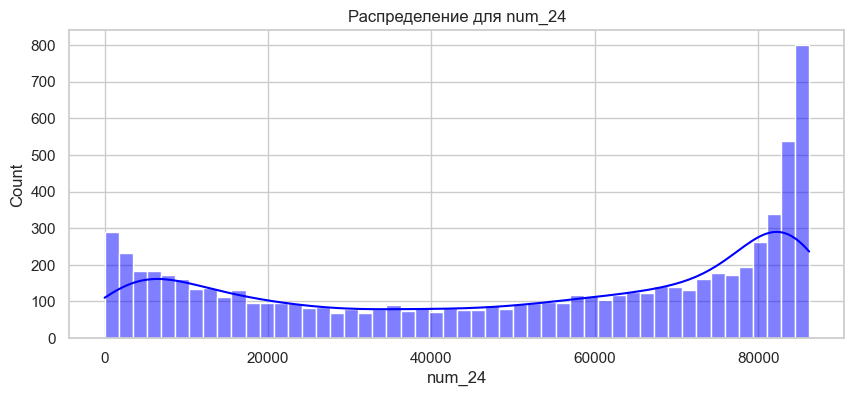

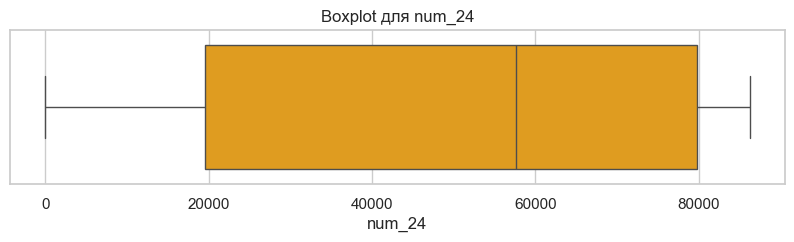

Статистические характеристики для num_24:
count     7448.000000
mean     50125.208676
std      30115.521148
min          1.048999
25%      19519.241996
50%      57577.289497
75%      79815.040998
max      86231.943000
Name: num_24, dtype: float64




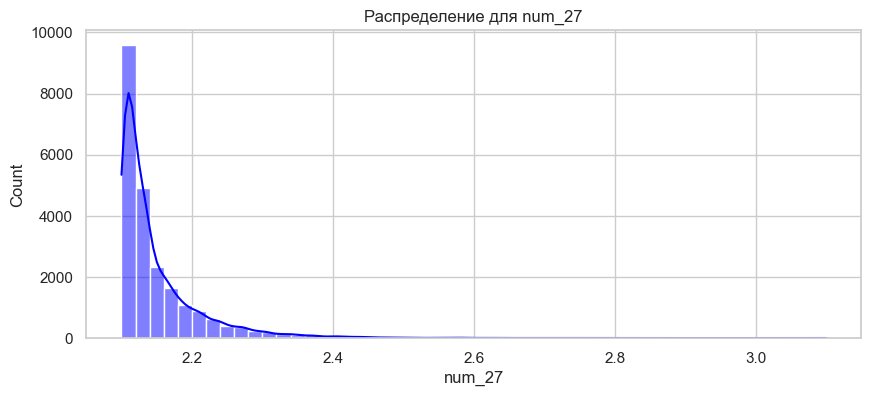

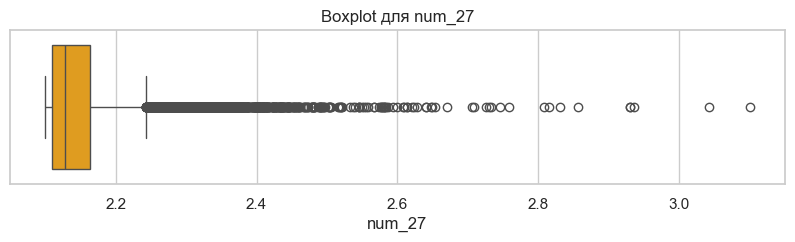

Статистические характеристики для num_27:
count    22855.000000
mean         2.149017
std          0.063170
min          2.100004
25%          2.109968
50%          2.127910
75%          2.163412
max          3.100000
Name: num_27, dtype: float64




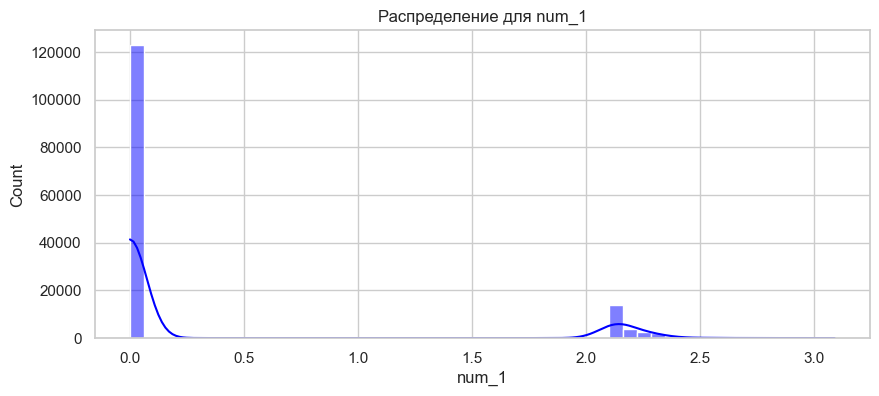

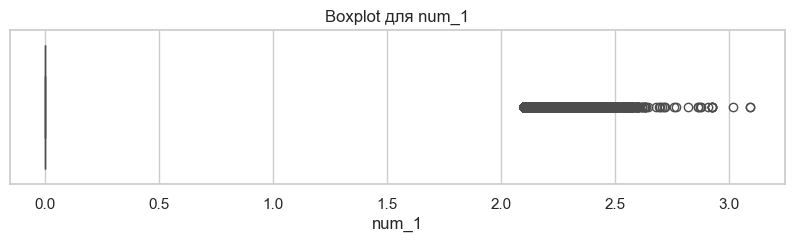

Статистические характеристики для num_1:
count    145906.000000
mean          0.340684
std           0.791142
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.090968
Name: num_1, dtype: float64




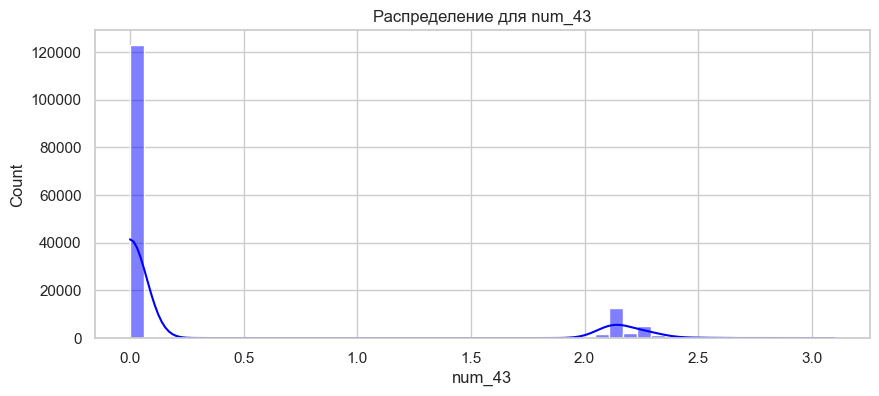

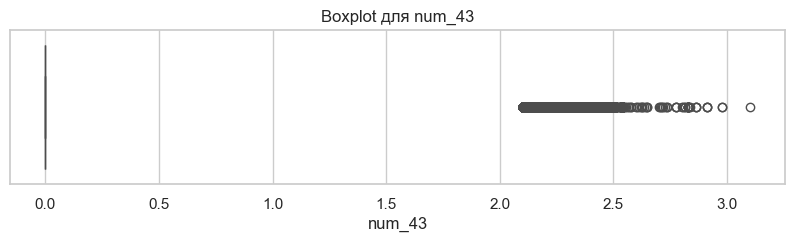

Статистические характеристики для num_43:
count    145906.000000
mean          0.341361
std           0.792782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.100000
Name: num_43, dtype: float64




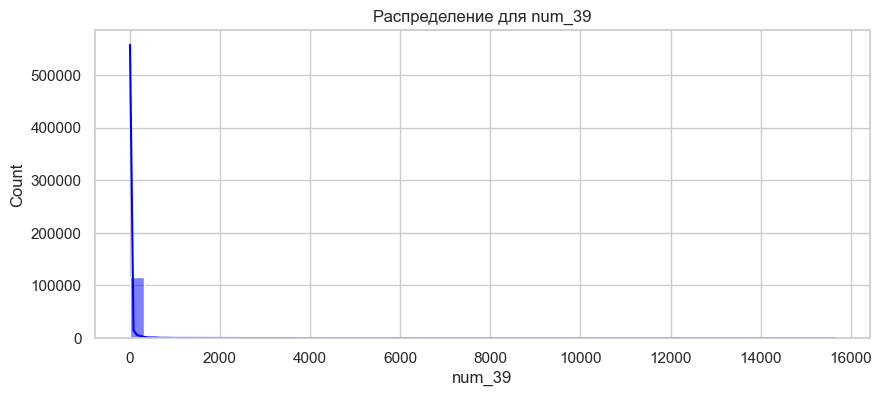

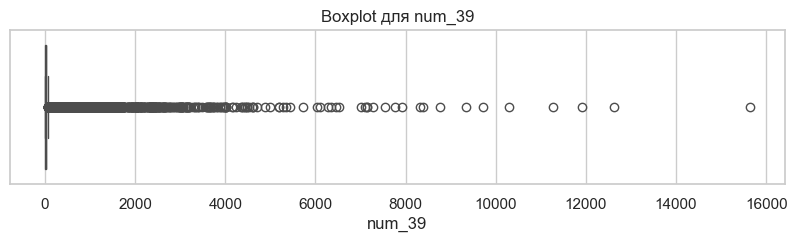

Статистические характеристики для num_39:
count    119023.000000
mean         38.609731
std         202.082150
min           3.000000
25%           6.000000
50%          14.000000
75%          28.000000
max       15637.000000
Name: num_39, dtype: float64




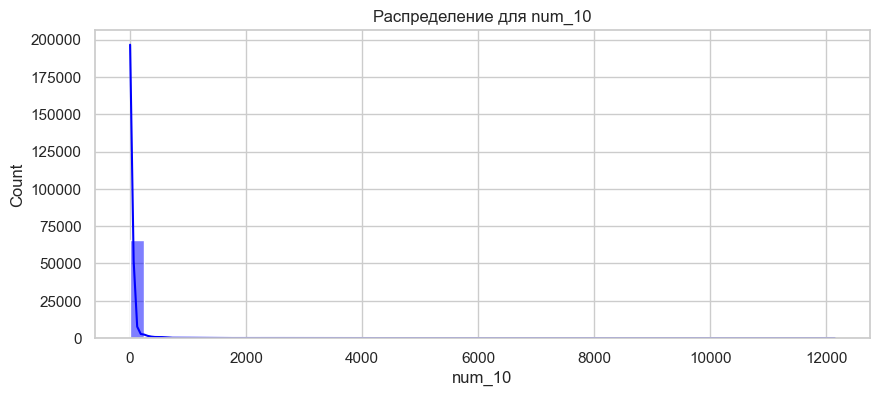

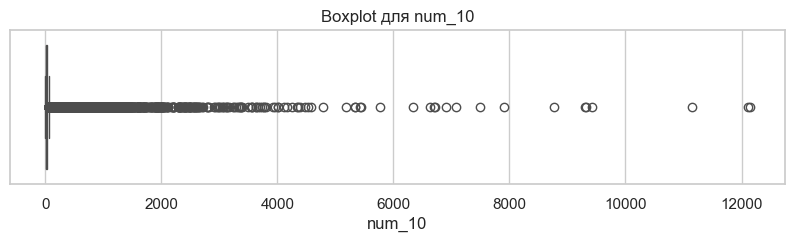

Статистические характеристики для num_10:
count    67710.000000
mean        47.822286
std        224.554755
min          1.000000
25%          6.000000
50%         15.000000
75%         28.000000
max      12142.000000
Name: num_10, dtype: float64




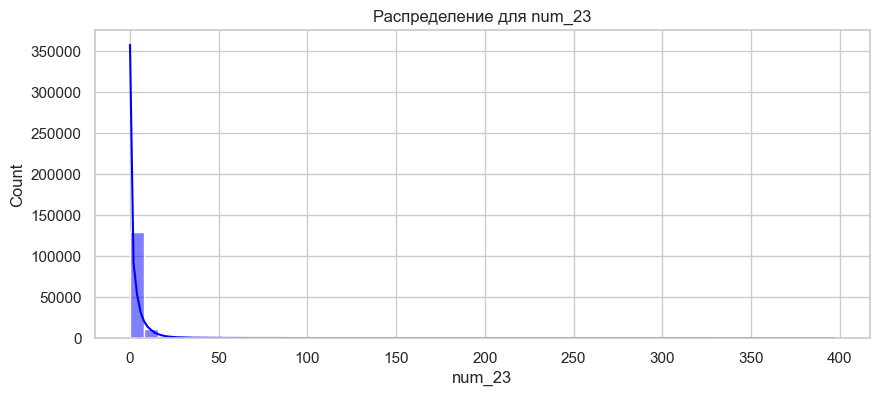

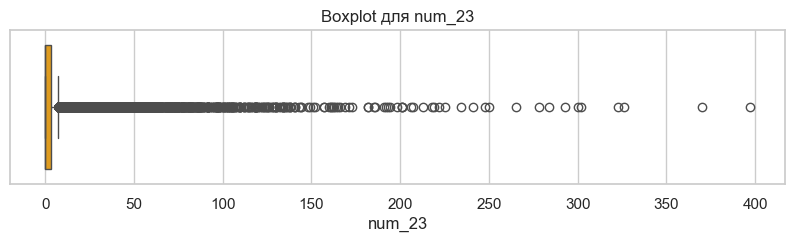

Статистические характеристики для num_23:
count    145906.000000
mean          2.980974
std           8.039373
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         397.000000
Name: num_23, dtype: float64




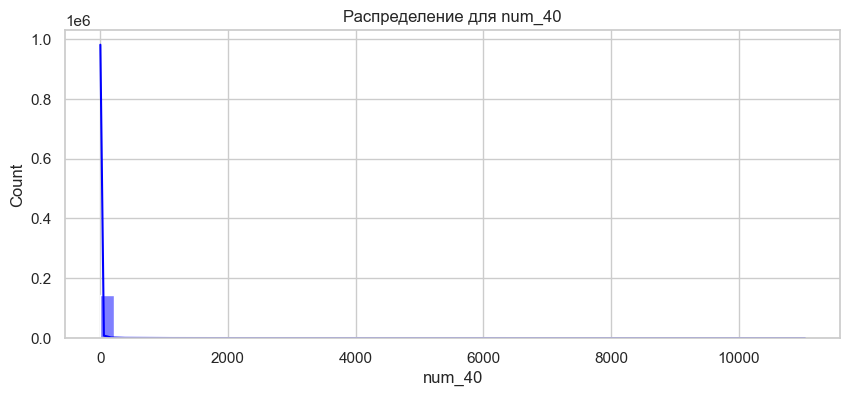

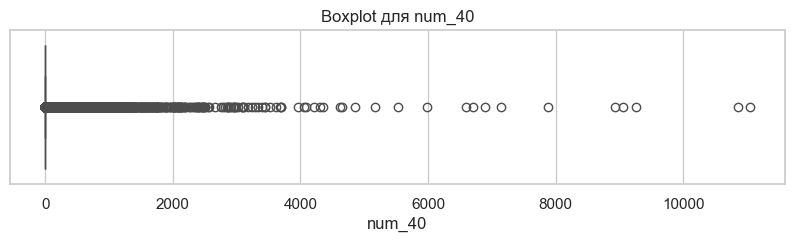

Статистические характеристики для num_40:
count    145906.000000
mean         13.536592
std         127.271298
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       11040.000000
Name: num_40, dtype: float64




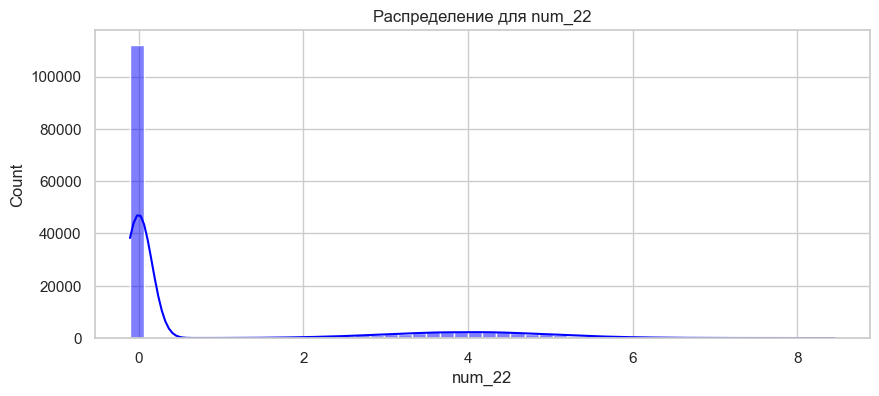

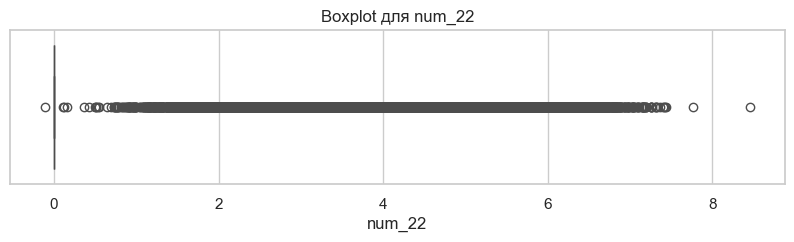

Статистические характеристики для num_22:
count    145906.000000
mean          0.921605
std           1.749194
min          -0.105300
25%           0.000000
50%           0.000000
75%           0.000000
max           8.453800
Name: num_22, dtype: float64




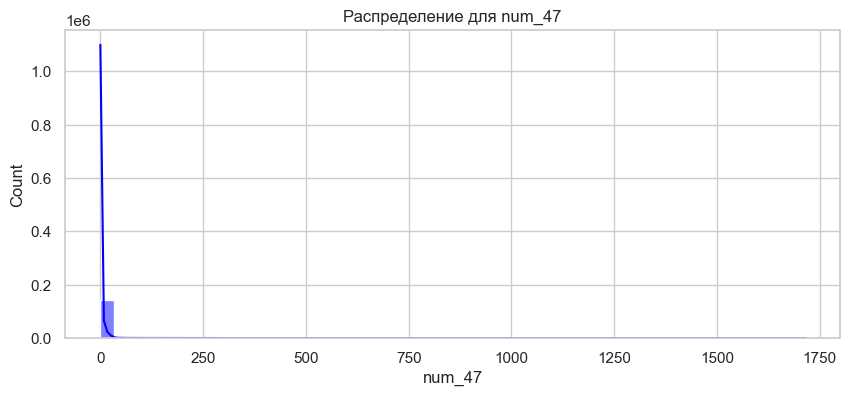

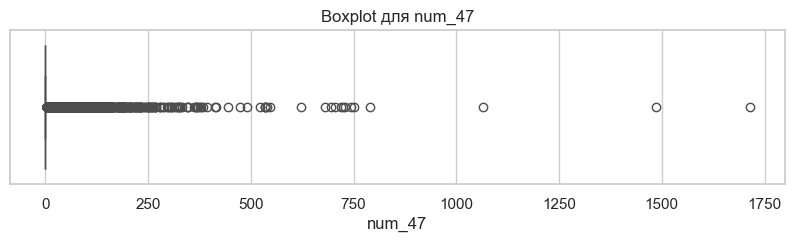

Статистические характеристики для num_47:
count    145906.000000
mean          3.425185
std          15.048947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1714.000000
Name: num_47, dtype: float64




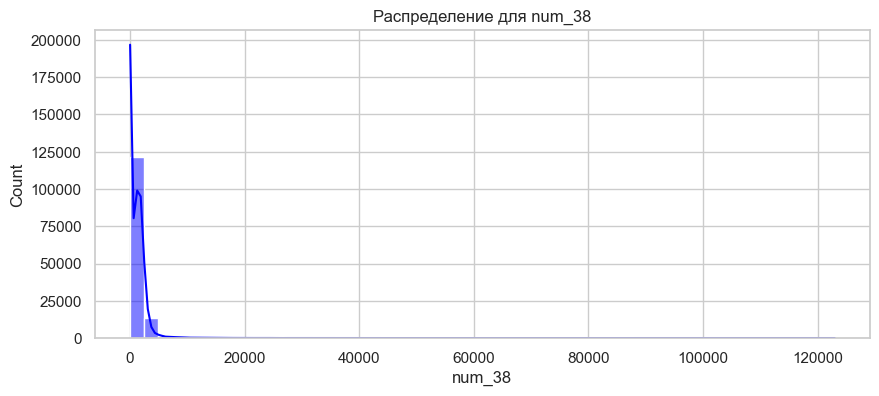

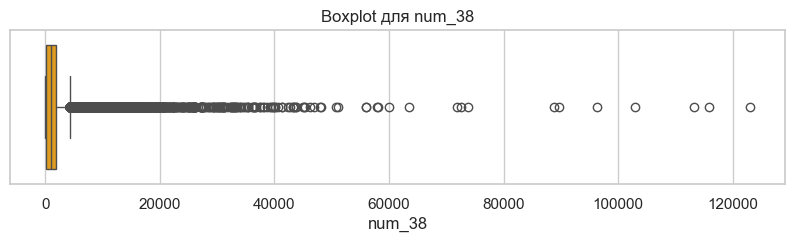

Статистические характеристики для num_38:
count    137187.000000
mean       1281.785009
std        1982.670984
min           9.000000
25%         199.000000
50%        1048.000000
75%        1851.000000
max      122967.000000
Name: num_38, dtype: float64




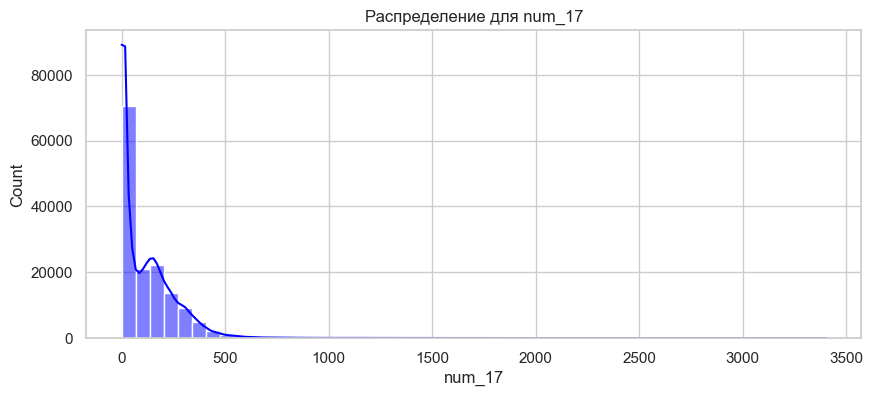

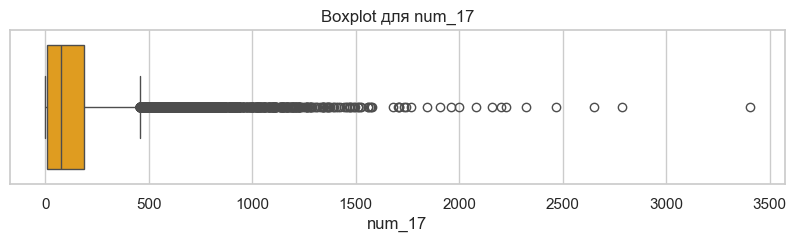

Статистические характеристики для num_17:
count    145906.000000
mean        119.032596
std         134.834192
min           0.000000
25%           8.000000
50%          77.000000
75%         188.000000
max        3403.000000
Name: num_17, dtype: float64




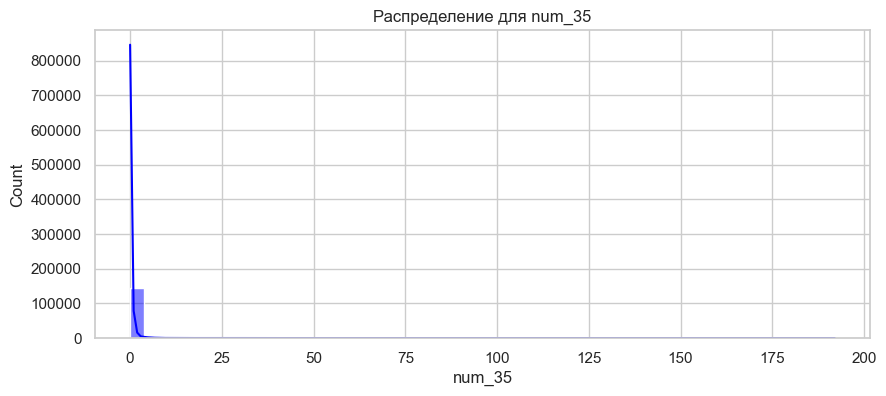

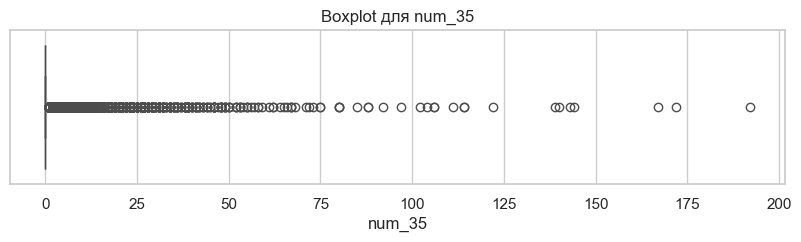

Статистические характеристики для num_35:
count    145906.000000
mean          0.356243
std           2.495358
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         192.000000
Name: num_35, dtype: float64




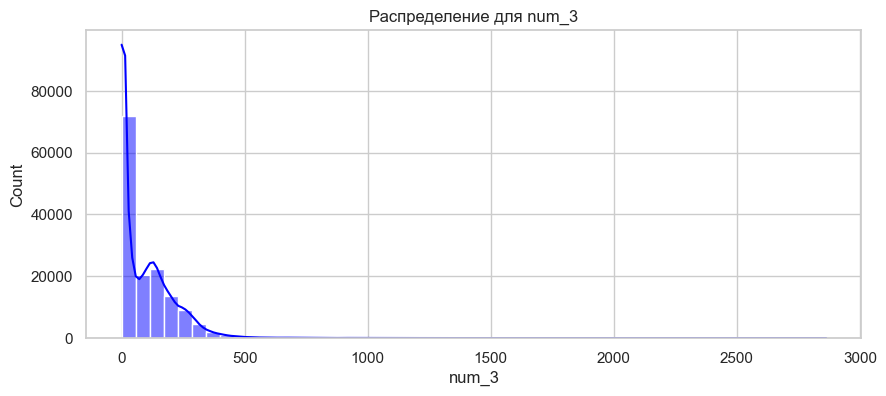

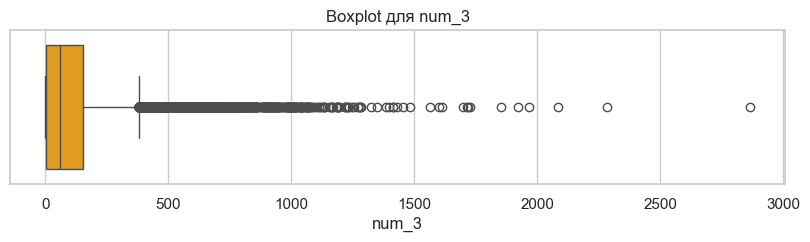

Статистические характеристики для num_3:
count    145906.000000
mean         98.007073
std         112.145429
min           0.000000
25%           5.000000
50%          62.000000
75%         155.000000
max        2863.000000
Name: num_3, dtype: float64




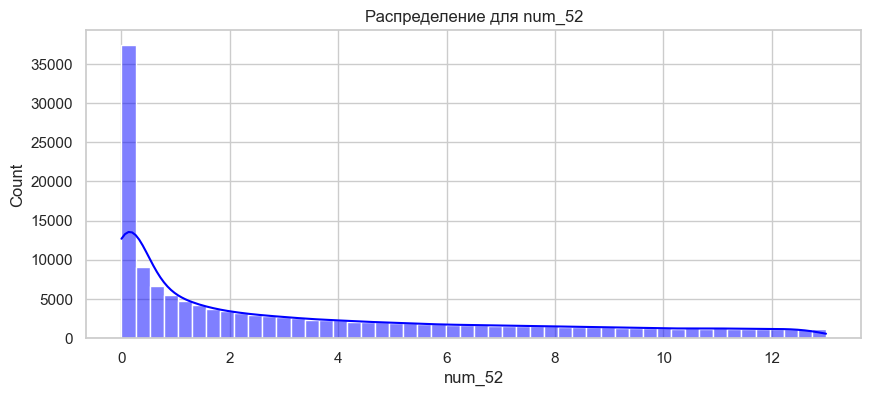

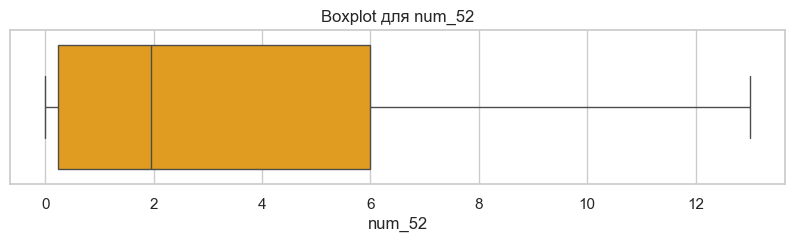

Статистические характеристики для num_52:
count    145906.000000
mean          3.488940
std           3.777708
min           0.000000
25%           0.239700
50%           1.948300
75%           5.993325
max          12.999700
Name: num_52, dtype: float64




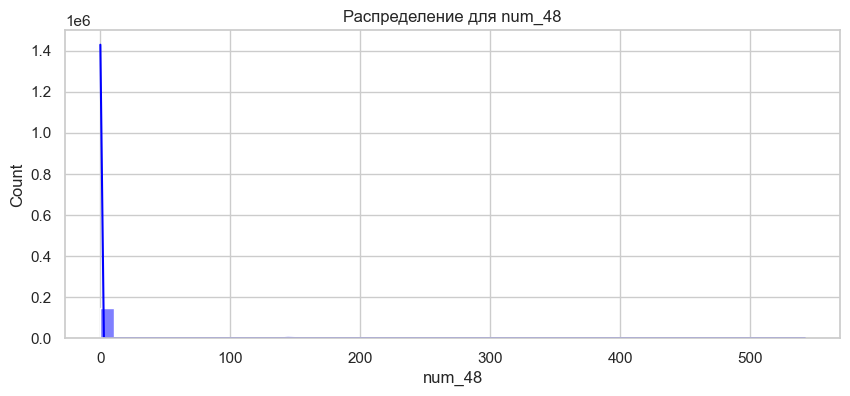

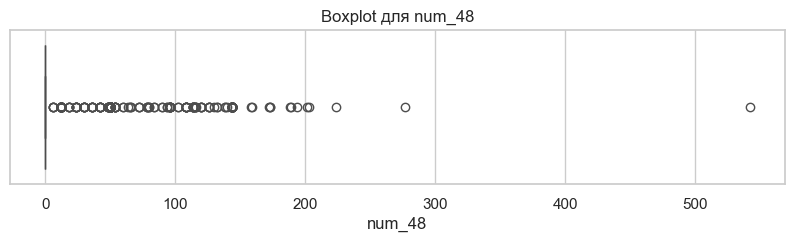

Статистические характеристики для num_48:
count    145906.000000
mean          0.196394
std           4.751101
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         542.000000
Name: num_48, dtype: float64




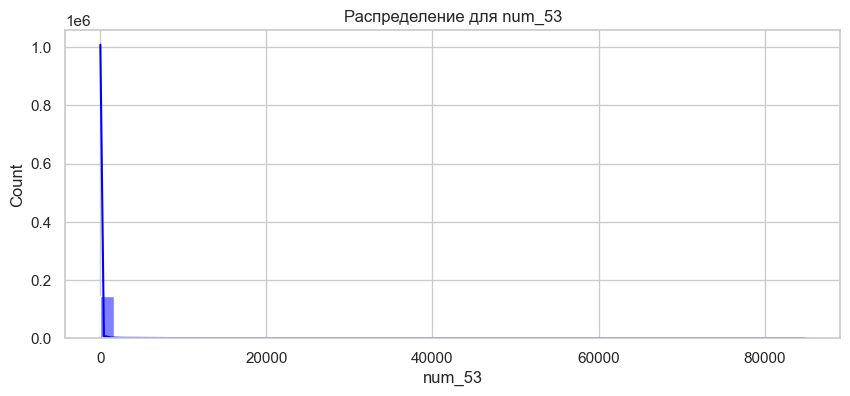

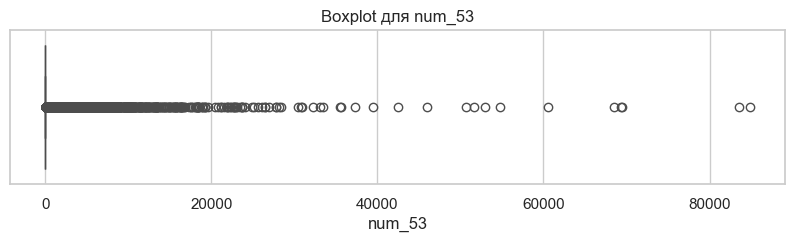

Статистические характеристики для num_53:
count    145906.000000
mean         96.879498
std         968.609364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       84850.000000
Name: num_53, dtype: float64




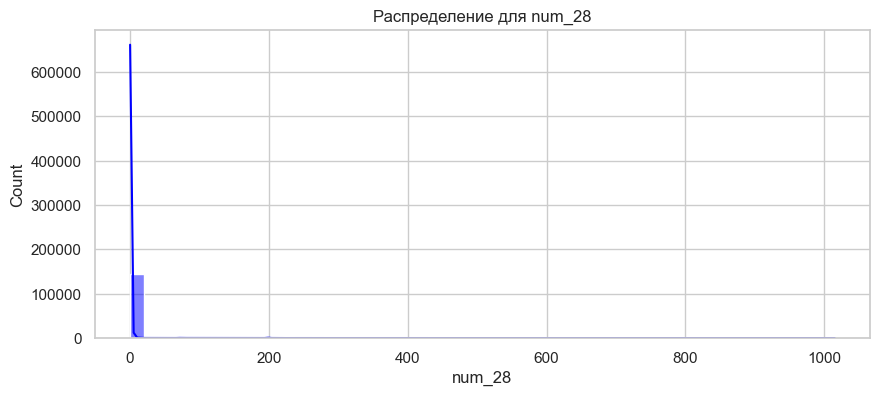

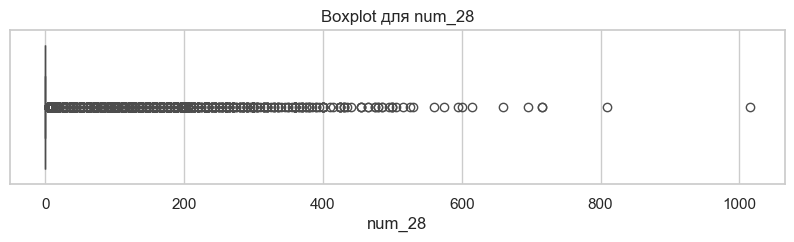

Статистические характеристики для num_28:
count    145906.000000
mean          1.724055
std          18.923518
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1015.000000
Name: num_28, dtype: float64




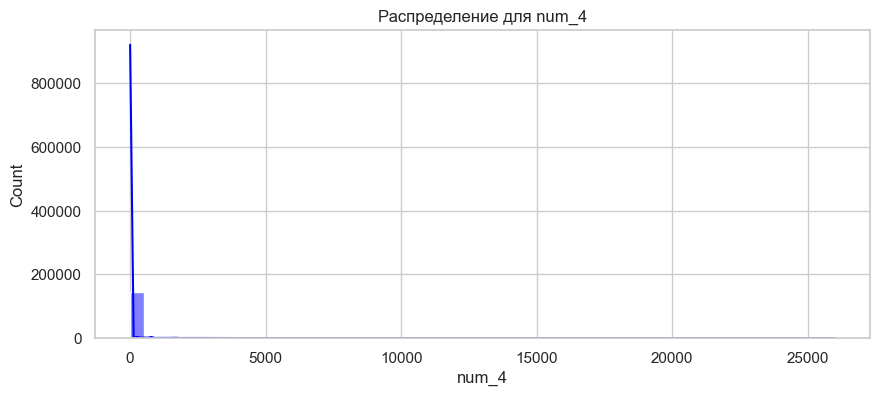

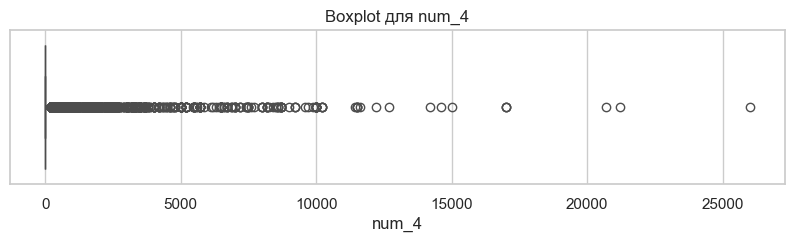

Статистические характеристики для num_4:
count    145906.000000
mean         35.237413
std         340.781356
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       26000.000000
Name: num_4, dtype: float64




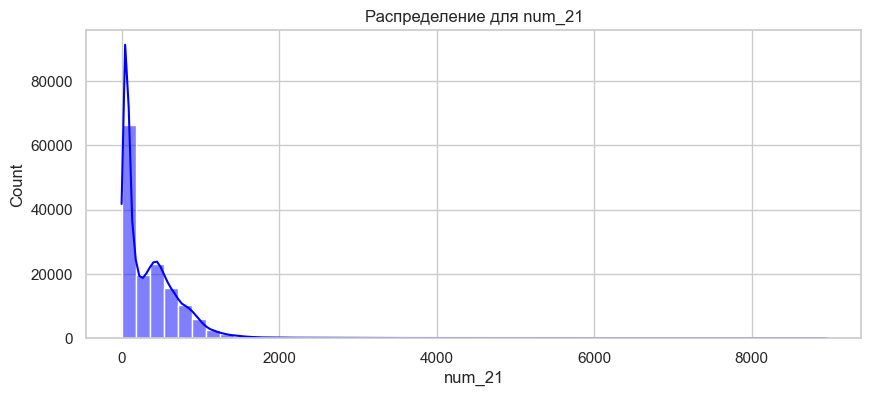

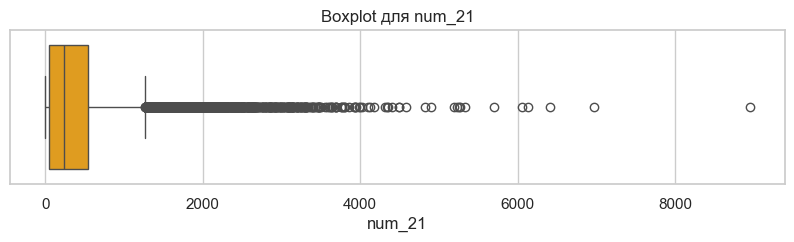

Статистические характеристики для num_21:
count    145906.000000
mean        348.350787
std         358.501359
min           0.000000
25%          50.000000
50%         236.000000
75%         539.000000
max        8946.000000
Name: num_21, dtype: float64




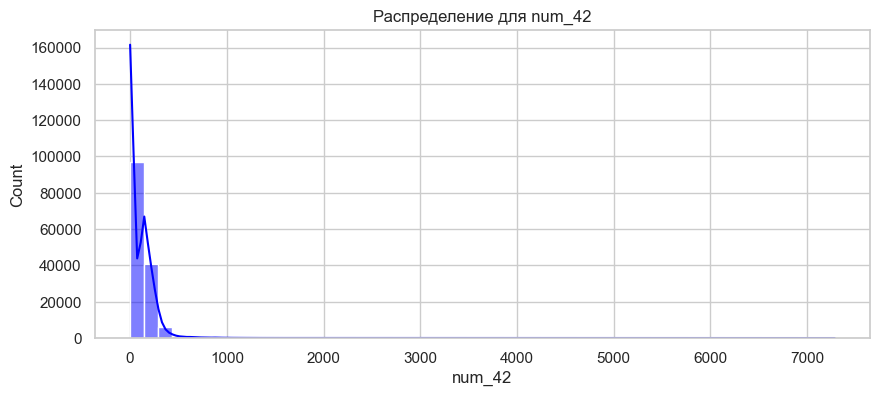

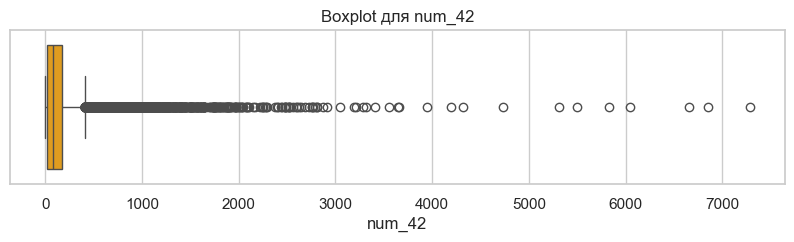

Статистические характеристики для num_42:
count    145906.000000
mean        113.201767
std         145.670396
min           0.000000
25%          14.000000
50%          81.000000
75%         174.000000
max        7284.000000
Name: num_42, dtype: float64




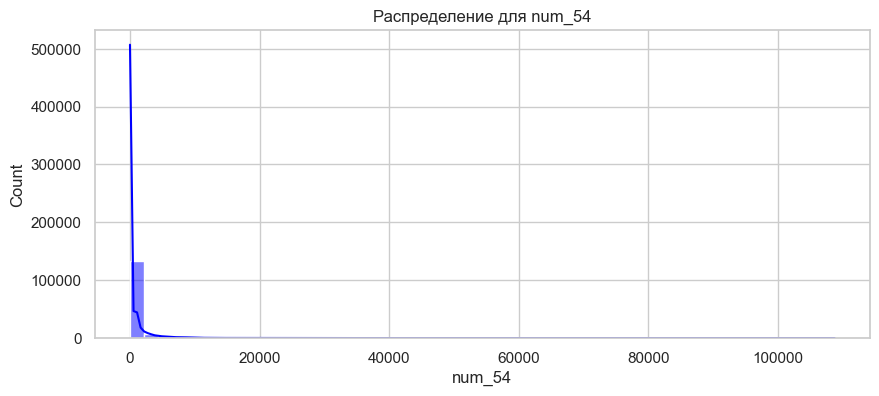

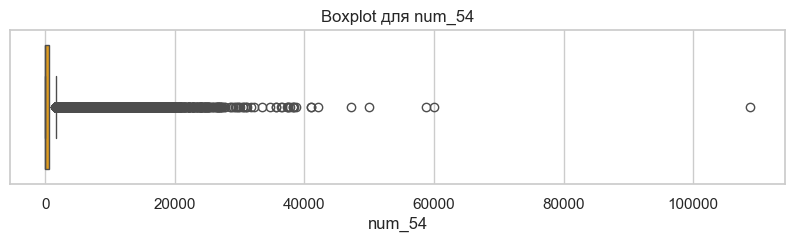

Статистические характеристики для num_54:
count    145906.000000
mean        669.904130
std        1930.224174
min           0.000000
25%           0.000000
50%           0.000000
75%         646.000000
max      108729.000000
Name: num_54, dtype: float64




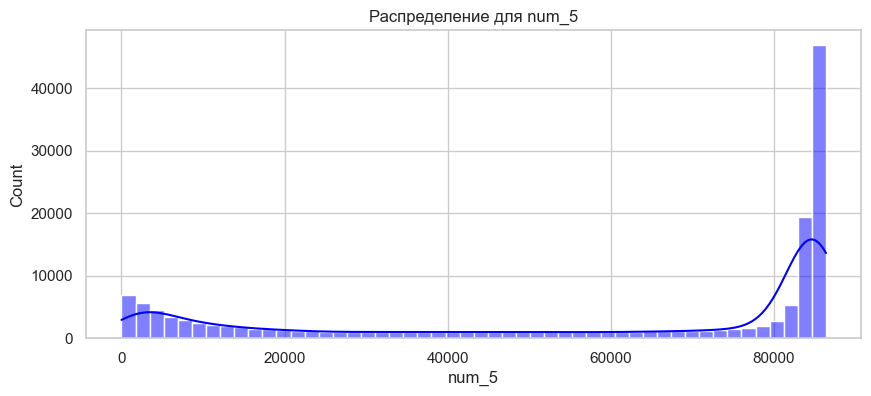

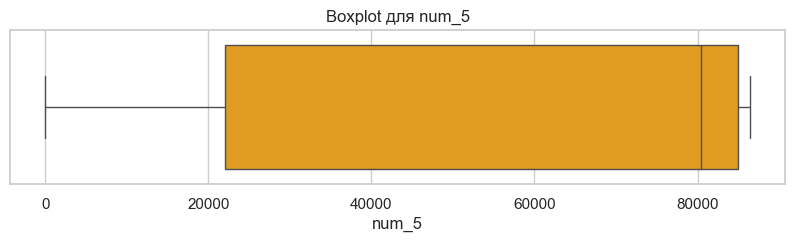

Статистические характеристики для num_5:
count    145906.000000
mean      57609.102572
std       32949.587159
min           0.097000
25%       22083.410250
50%       80446.297500
75%       84996.819000
max       86400.000000
Name: num_5, dtype: float64




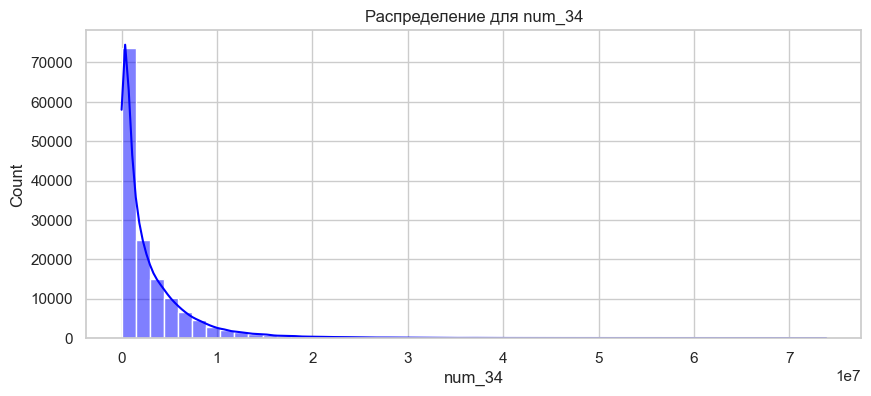

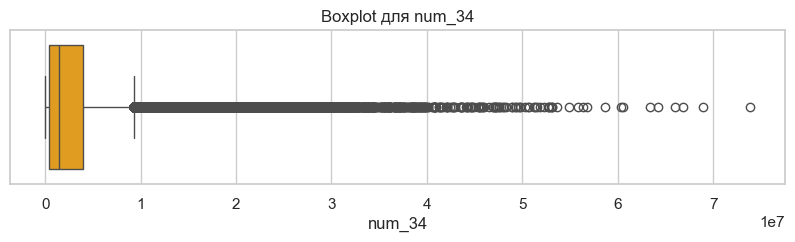

Статистические характеристики для num_34:
count    1.459060e+05
mean     3.009745e+06
std      4.312986e+06
min      0.000000e+00
25%      4.086115e+05
50%      1.443038e+06
75%      3.954973e+06
max      7.384507e+07
Name: num_34, dtype: float64




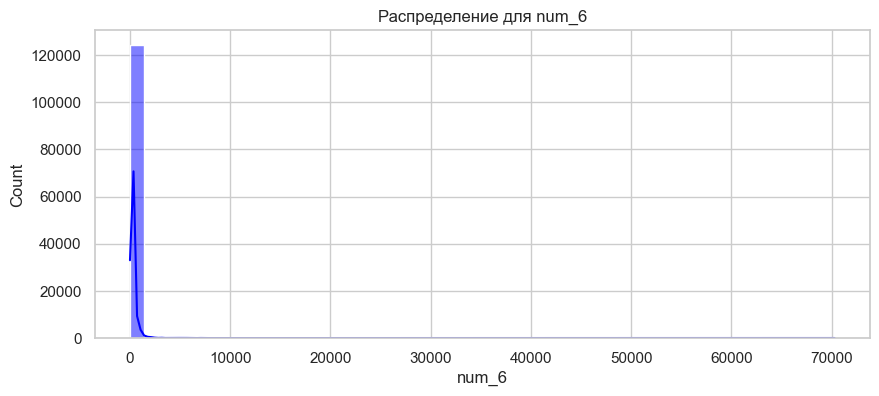

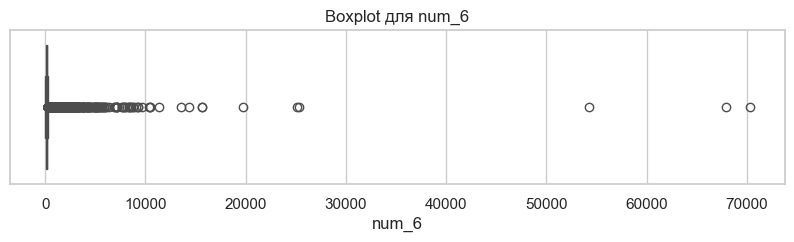

Статистические характеристики для num_6:
count    124857.000000
mean        200.360076
std         414.615738
min           8.000000
25%         120.000000
50%         152.000000
75%         204.000000
max       70280.000000
Name: num_6, dtype: float64




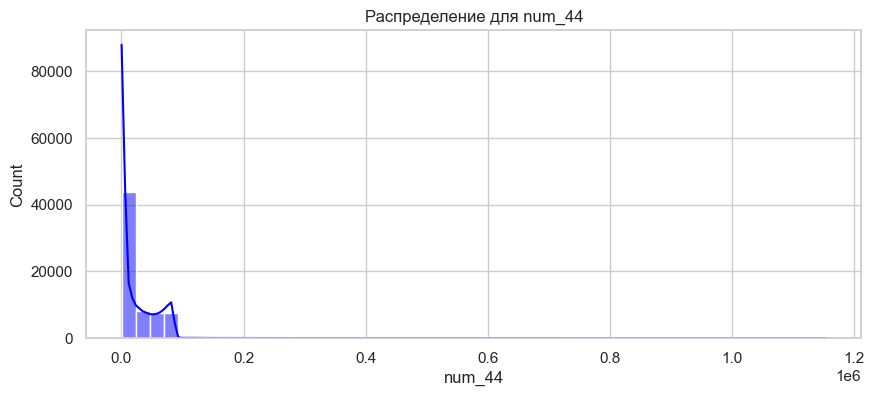

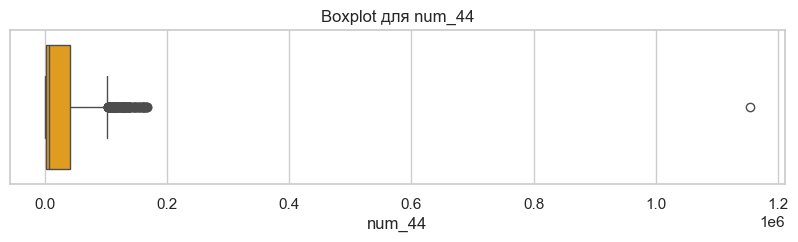

Статистические характеристики для num_44:
count    6.725200e+04
mean     2.283208e+04
std      2.832112e+04
min      4.040000e+02
25%      1.098000e+03
50%      6.790500e+03
75%      4.151075e+04
max      1.153936e+06
Name: num_44, dtype: float64




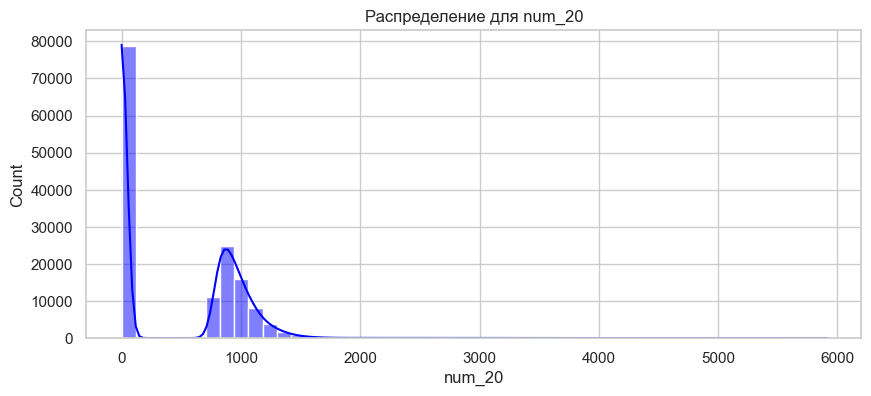

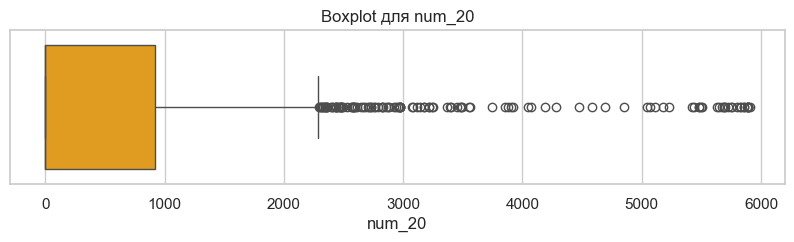

Статистические характеристики для num_20:
count    145906.000000
mean        448.746172
std         505.413538
min           0.000000
25%           0.000000
50%           0.000000
75%         916.000000
max        5905.000000
Name: num_20, dtype: float64




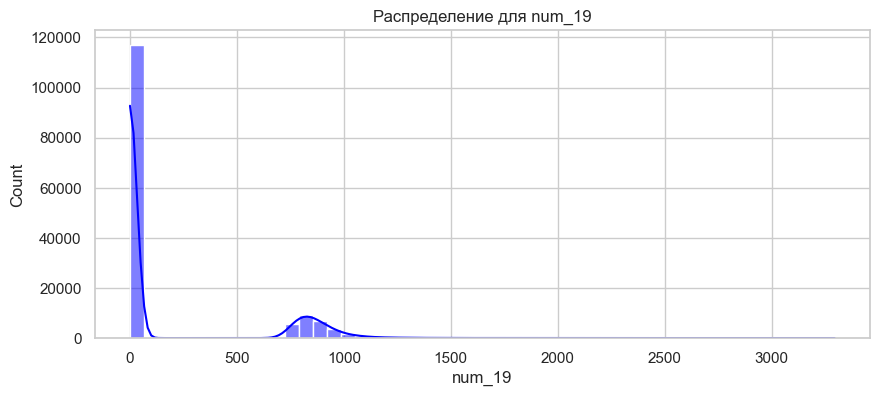

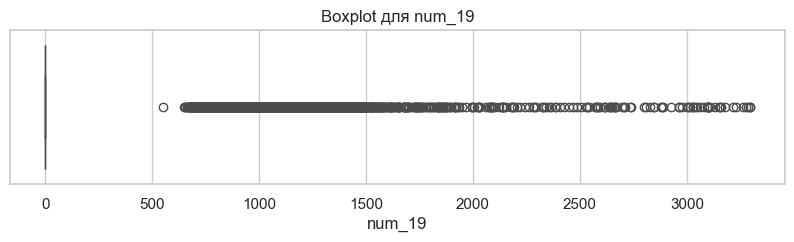

Статистические характеристики для num_19:
count    145906.000000
mean        173.896728
std         357.968727
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3294.000000
Name: num_19, dtype: float64




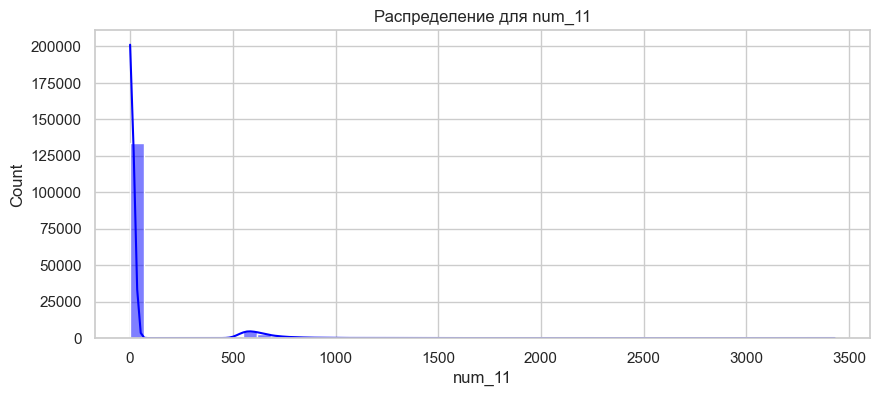

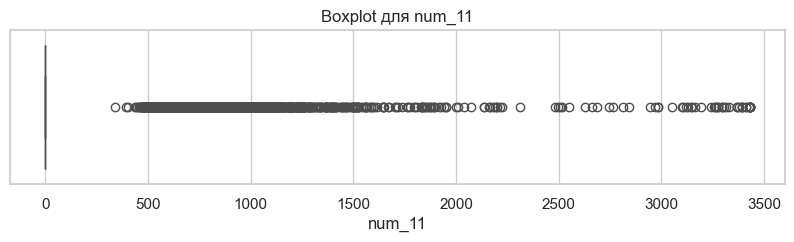

Статистические характеристики для num_11:
count    145906.000000
mean         56.253746
std         196.084264
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3430.000000
Name: num_11, dtype: float64




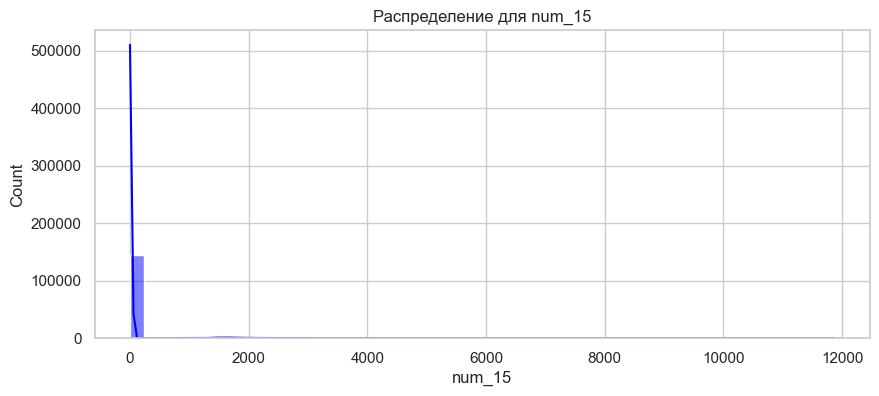

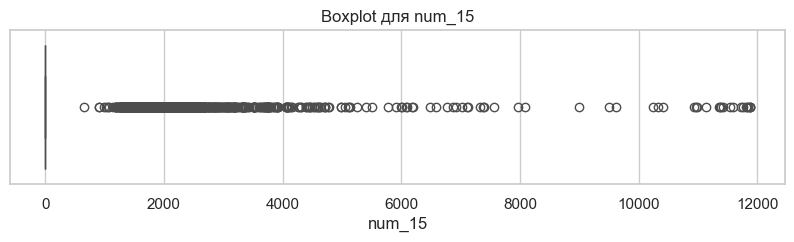

Статистические характеристики для num_15:
count    145906.000000
mean         29.904836
std         287.848619
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       11873.000000
Name: num_15, dtype: float64




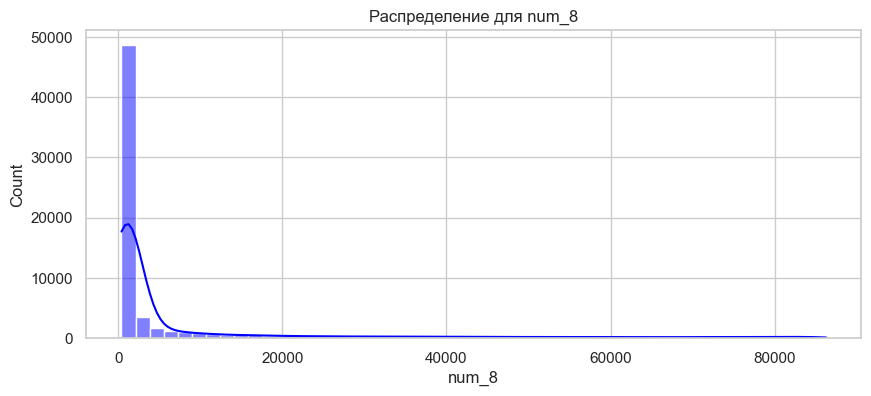

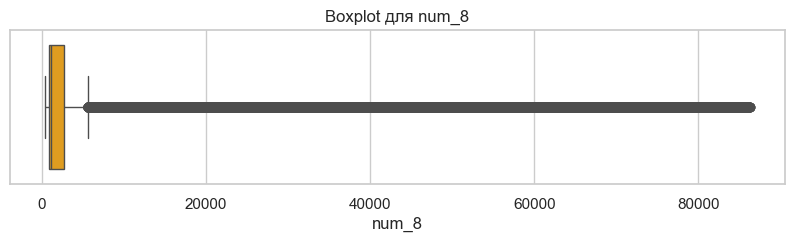

Статистические характеристики для num_8:
count    67219.000000
mean      7640.238921
std      16842.698035
min        404.000000
25%        848.000000
50%       1109.000000
75%       2739.000000
max      86265.000000
Name: num_8, dtype: float64




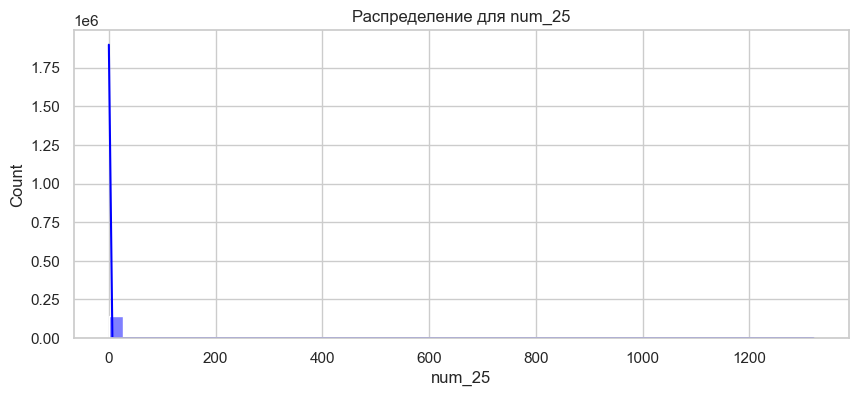

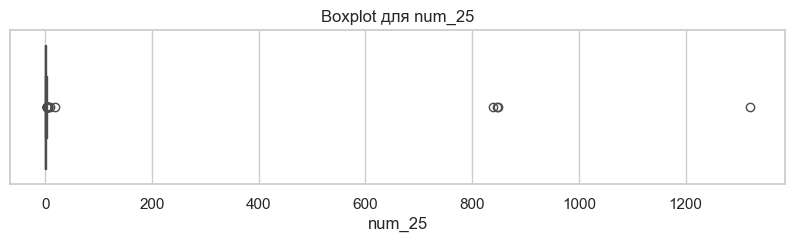

Статистические характеристики для num_25:
count    145906.000000
mean          0.567971
std           5.196382
min           0.000000
25%           0.000000
50%           0.000000
75%           1.145038
max        1320.000000
Name: num_25, dtype: float64




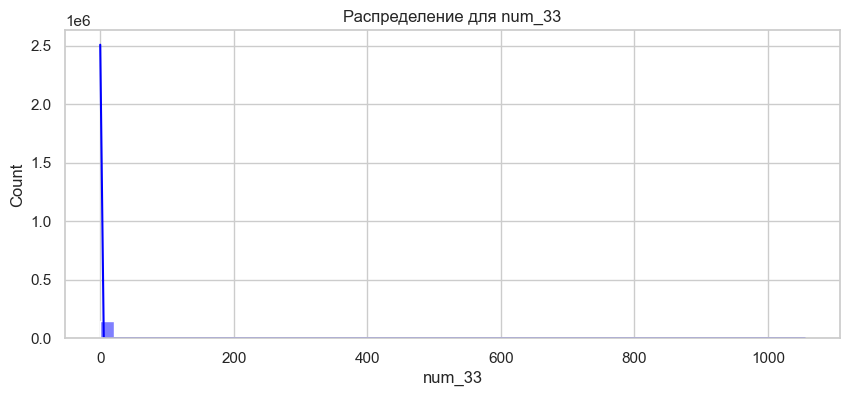

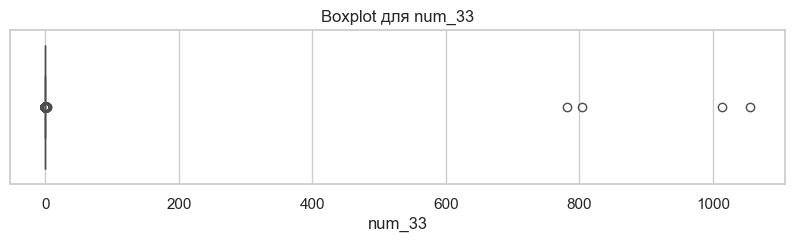

Статистические характеристики для num_33:
count    145906.000000
mean          0.120374
std           4.829076
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1055.000000
Name: num_33, dtype: float64




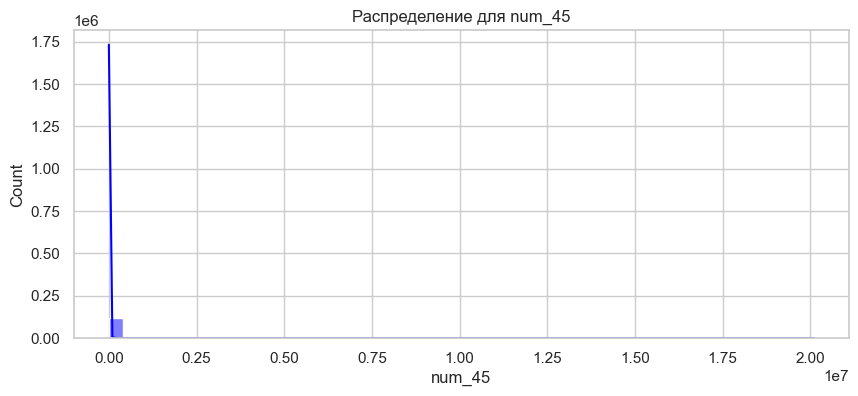

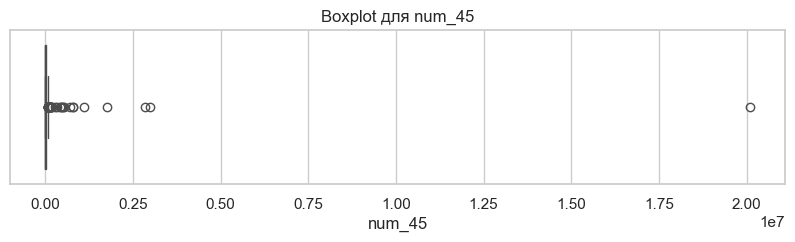

Статистические характеристики для num_45:
count    1.190170e+05
mean     2.029292e+04
std      6.599093e+04
min      7.500000e+01
25%      5.530000e+02
50%      2.735000e+03
75%      3.489000e+04
max      2.009028e+07
Name: num_45, dtype: float64




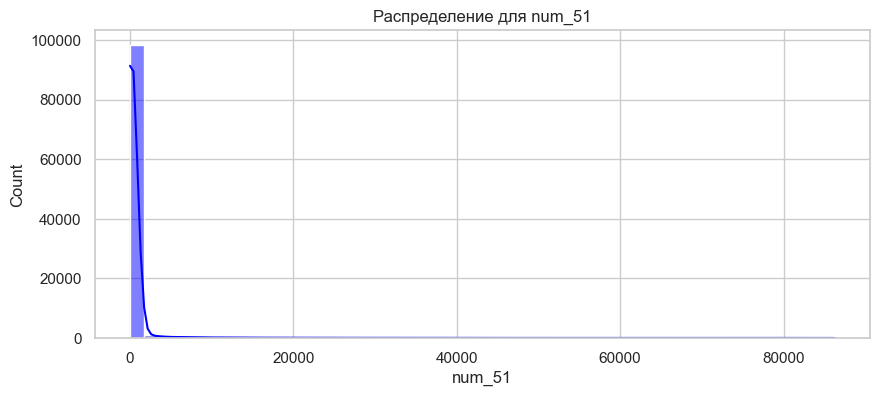

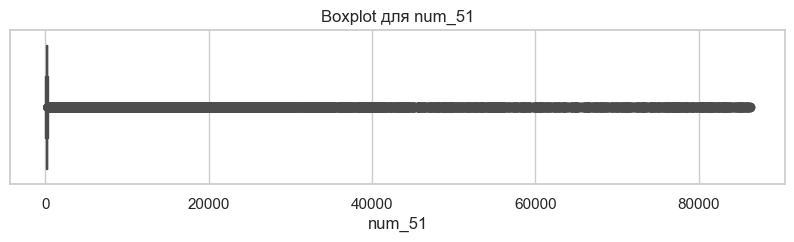

Статистические характеристики для num_51:
count    103146.000000
mean       1282.545586
std        7071.995192
min           6.000000
25%         136.000000
50%         176.000000
75%         243.000000
max       86235.000000
Name: num_51, dtype: float64




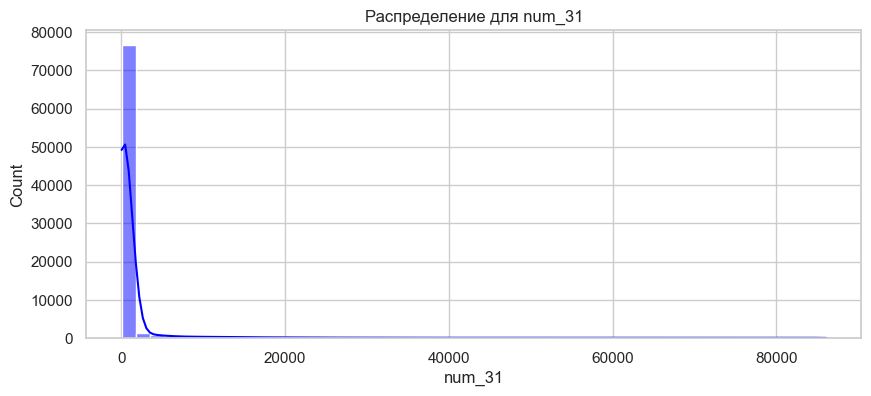

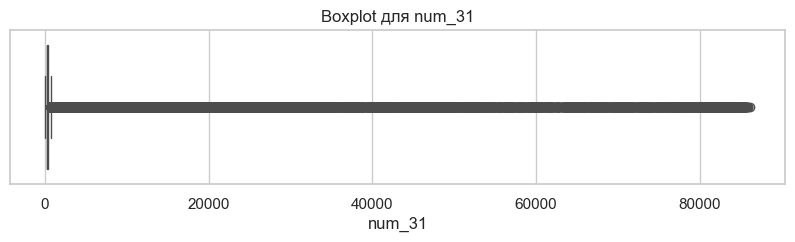

Статистические характеристики для num_31:
count    84189.000000
mean      2412.510482
std       9823.392902
min         26.000000
25%        215.000000
50%        281.000000
75%        405.000000
max      86099.000000
Name: num_31, dtype: float64




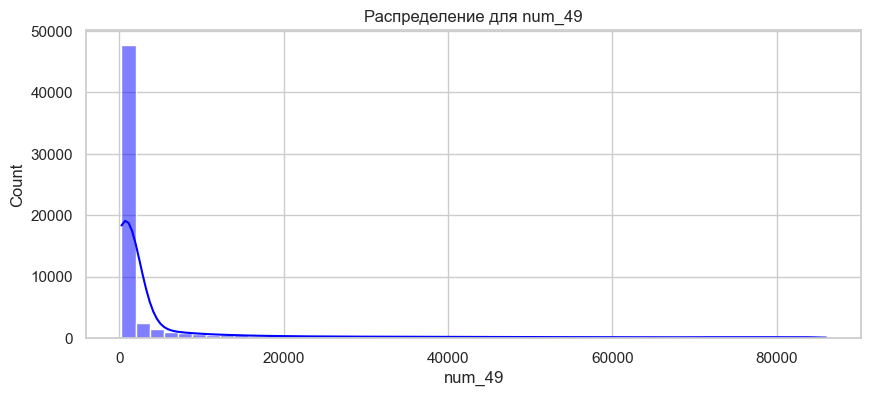

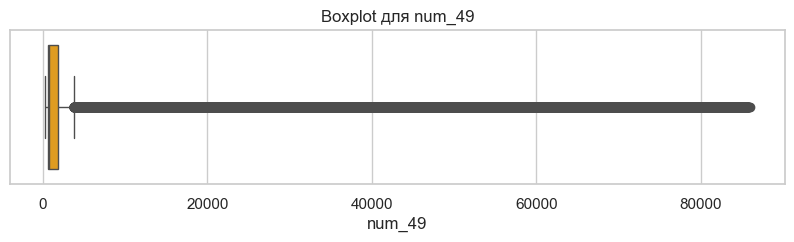

Статистические характеристики для num_49:
count    63347.000000
mean      6714.955120
std      15893.393861
min        269.000000
25%        573.000000
50%        748.000000
75%       1862.000000
max      85985.000000
Name: num_49, dtype: float64




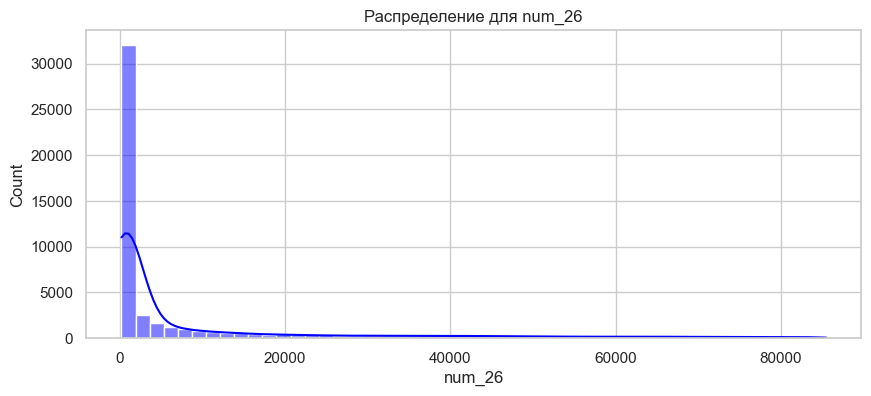

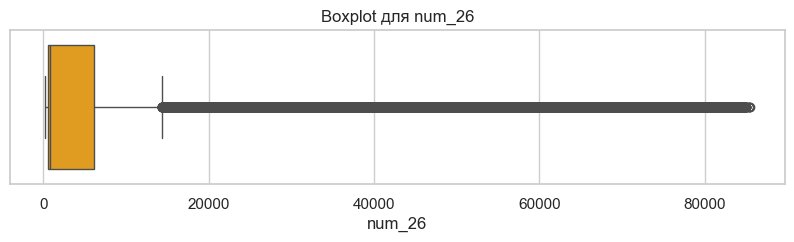

Статистические характеристики для num_26:
count    49015.000000
mean      8688.917127
std      17269.447657
min        217.000000
25%        562.000000
50%        810.000000
75%       6070.000000
max      85459.000000
Name: num_26, dtype: float64




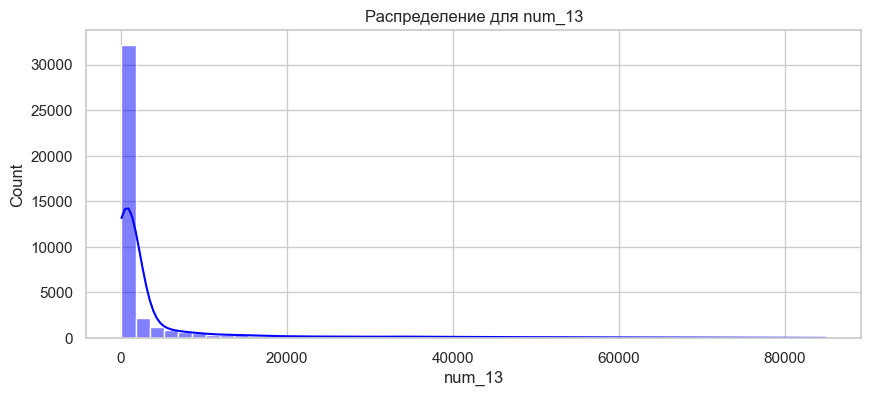

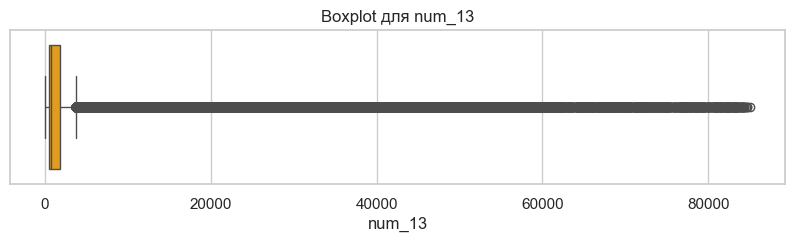

Статистические характеристики для num_13:
count    42987.000000
mean      5420.641962
std      13149.324974
min         68.000000
25%        508.000000
50%        705.000000
75%       1794.500000
max      84992.000000
Name: num_13, dtype: float64




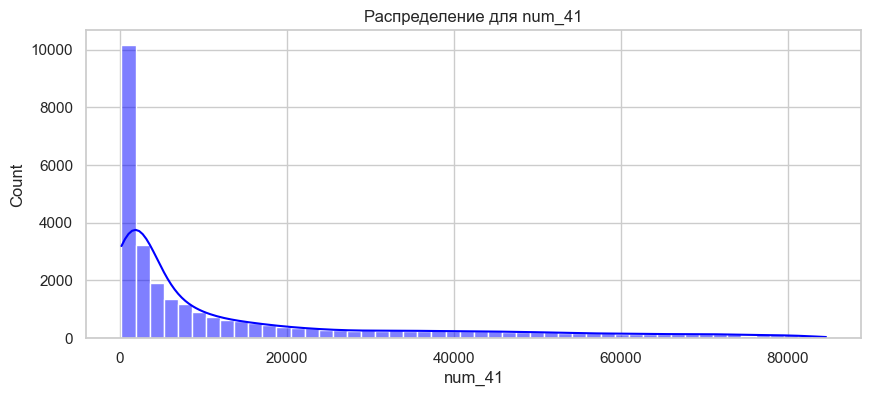

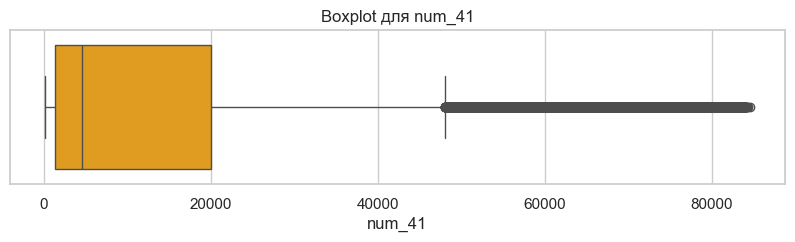

Статистические характеристики для num_41:
count    29194.00000
mean     14766.15832
std      20180.22750
min        169.00000
25%       1311.00000
50%       4540.00000
75%      20001.25000
max      84543.00000
Name: num_41, dtype: float64




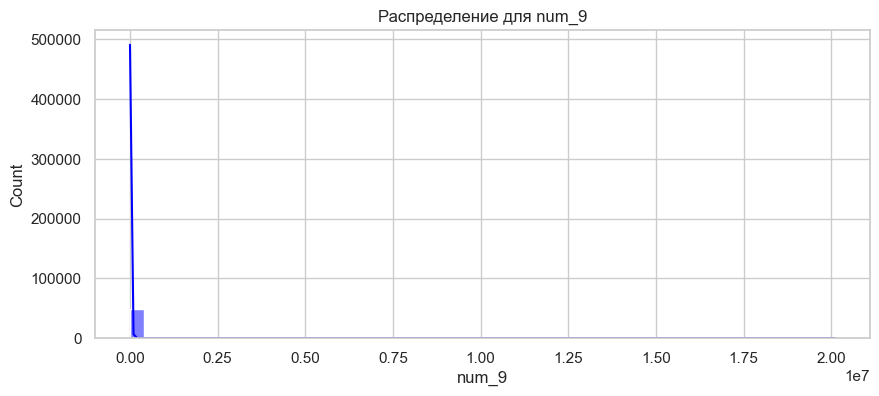

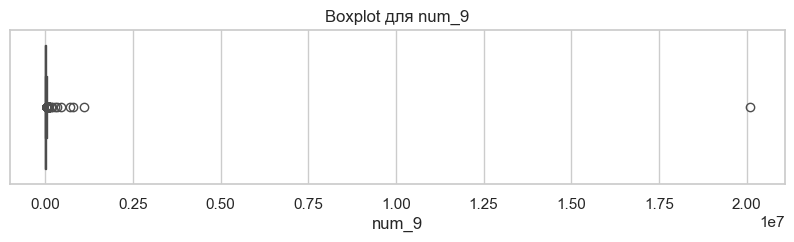

Статистические характеристики для num_9:
count    4.901500e+04
mean     1.671360e+04
std      9.383155e+04
min      6.720000e+02
25%      1.894000e+03
50%      3.537000e+03
75%      2.085700e+04
max      2.008858e+07
Name: num_9, dtype: float64




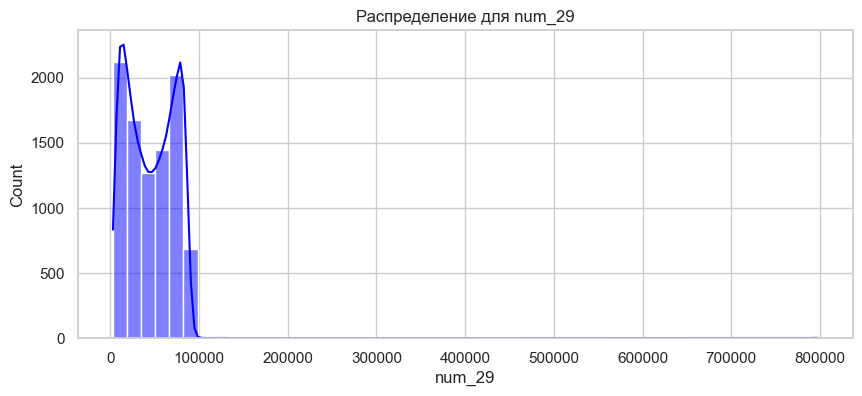

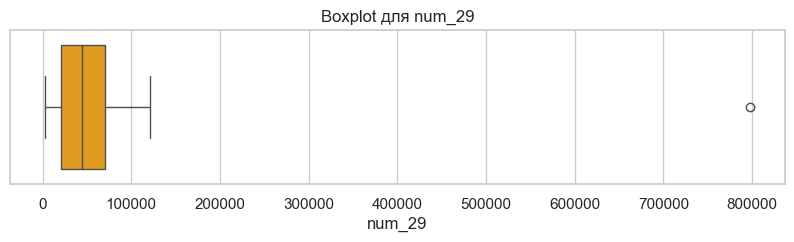

Статистические характеристики для num_29:
count      9206.000000
mean      45316.689442
std       27252.443293
min        2973.000000
25%       20270.250000
50%       44865.500000
75%       70004.750000
max      797279.000000
Name: num_29, dtype: float64




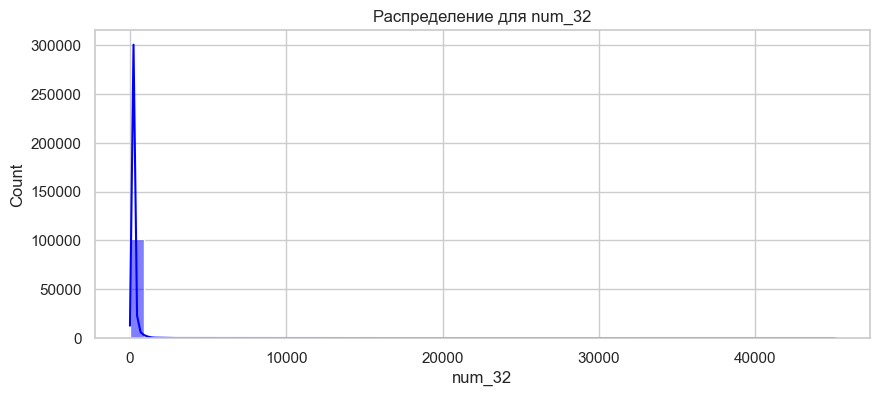

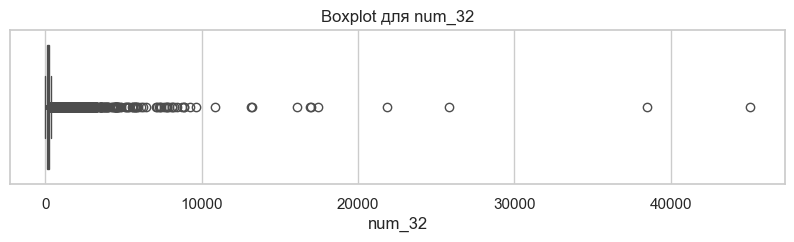

Статистические характеристики для num_32:
count    103146.000000
mean        221.493514
std         335.250424
min           1.000000
25%         136.000000
50%         174.000000
75%         235.000000
max       45068.000000
Name: num_32, dtype: float64




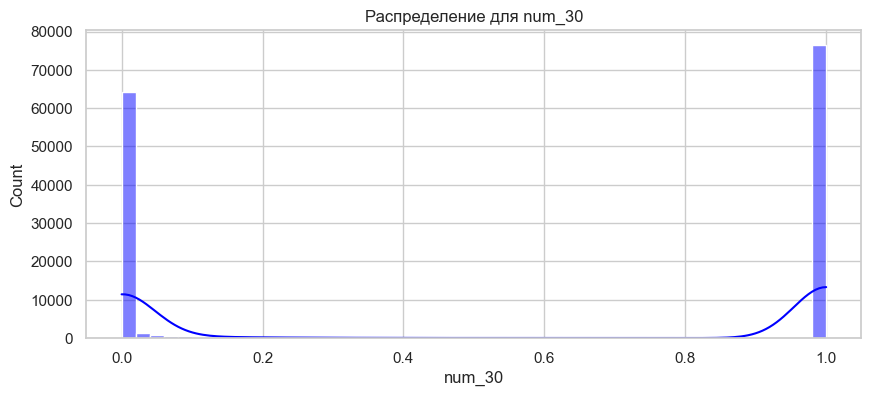

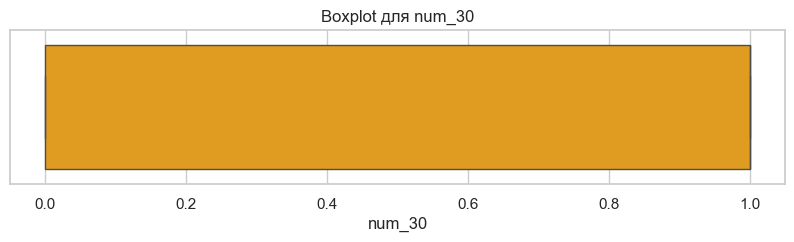

Статистические характеристики для num_30:
count    145906.000000
mean          0.529605
std           0.495511
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: num_30, dtype: float64




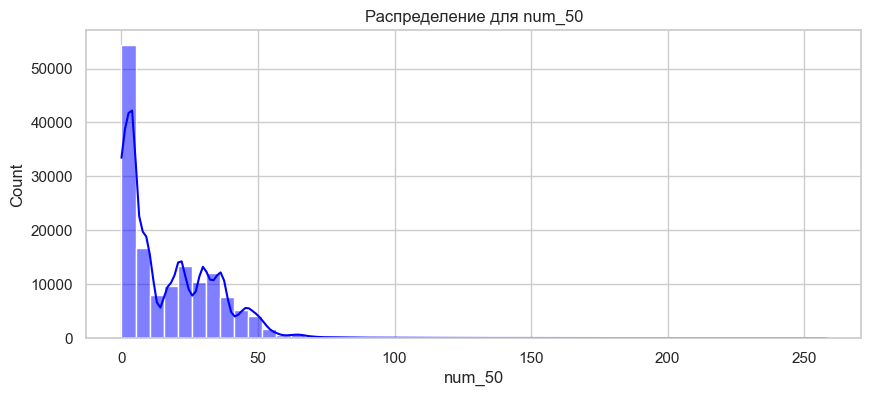

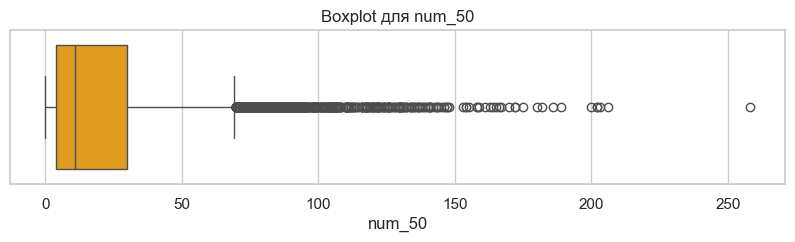

Статистические характеристики для num_50:
count    145906.000000
mean         17.200163
std          16.837077
min           0.000000
25%           4.000000
50%          11.000000
75%          30.000000
max         258.000000
Name: num_50, dtype: float64




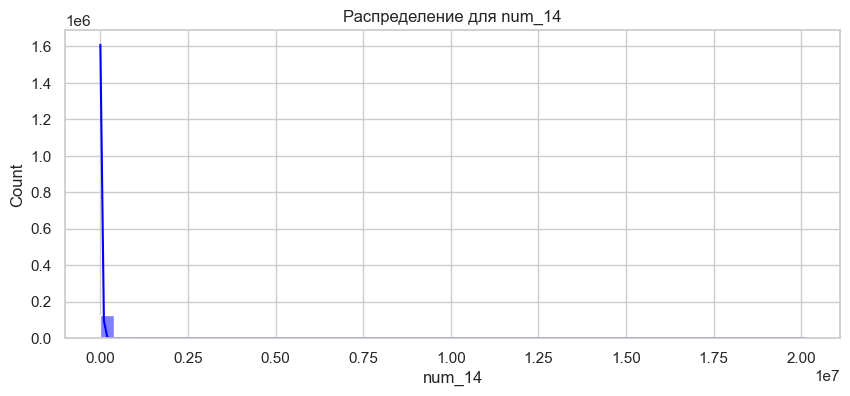

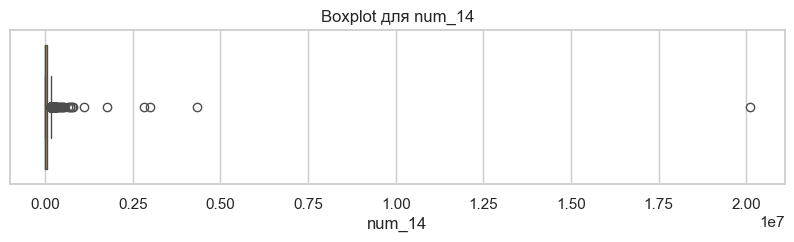

Статистические характеристики для num_14:
count    1.273860e+05
mean     3.055361e+04
std      7.143573e+04
min      5.900000e+01
25%      4.320000e+02
50%      3.703000e+03
75%      6.226700e+04
max      2.010167e+07
Name: num_14, dtype: float64




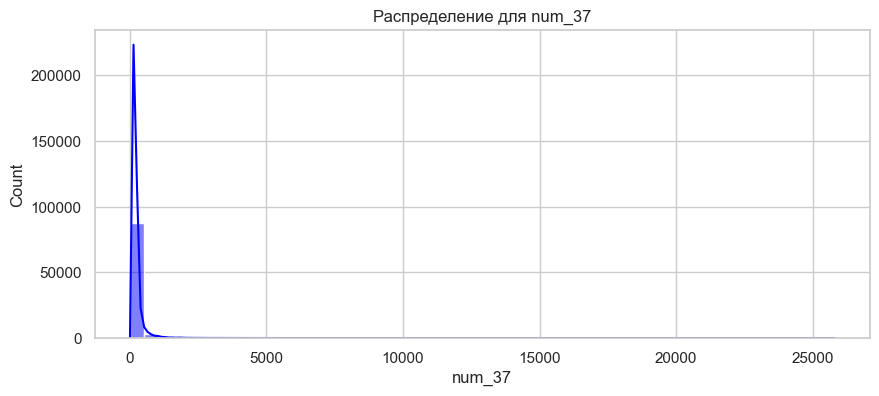

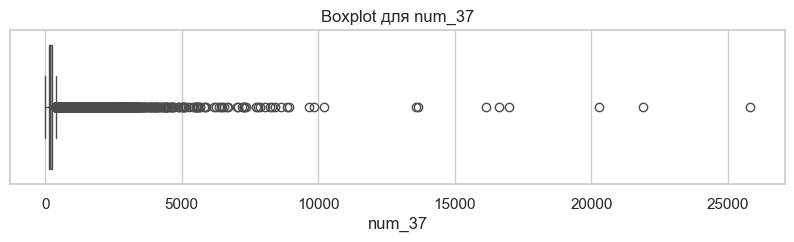

Статистические характеристики для num_37:
count    92226.000000
mean       245.617342
std        325.613780
min          1.000000
25%        148.000000
50%        186.000000
75%        248.000000
max      25802.000000
Name: num_37, dtype: float64




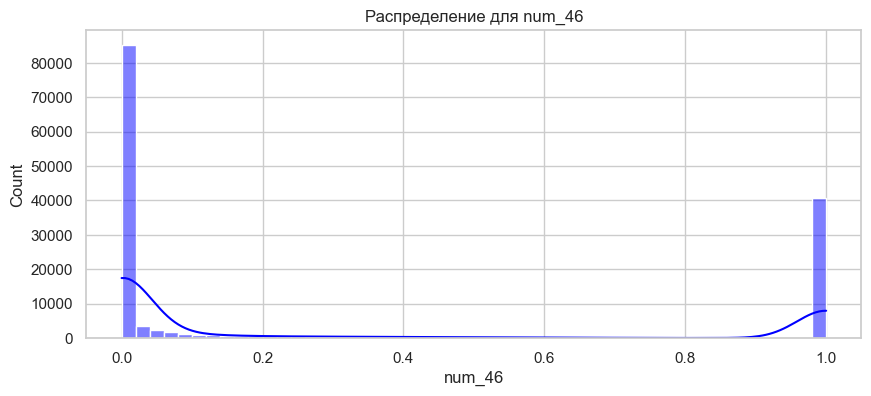

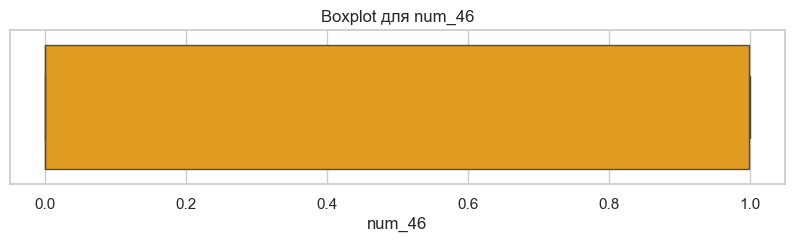

Статистические характеристики для num_46:
count    145906.000000
mean          0.306572
std           0.442301
min           0.000000
25%           0.000000
50%           0.000000
75%           0.999008
max           1.000000
Name: num_46, dtype: float64




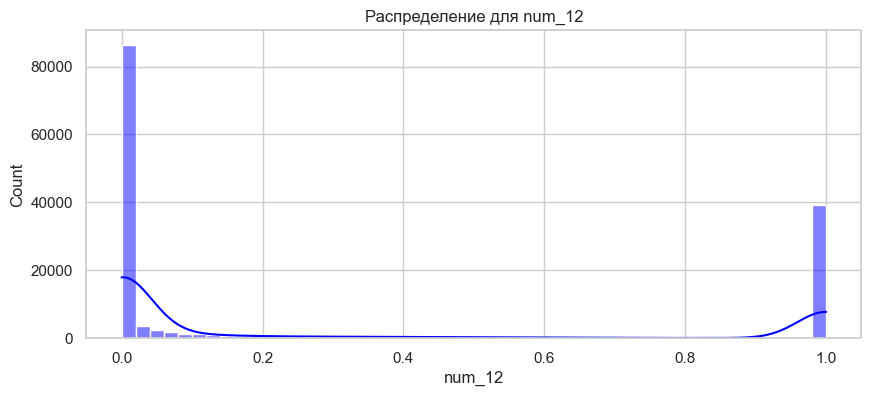

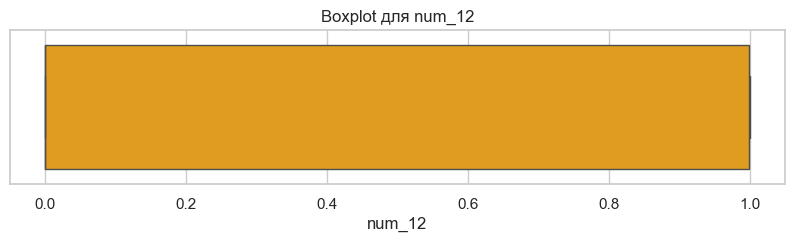

Статистические характеристики для num_12:
count    145906.000000
mean          0.295744
std           0.436992
min           0.000000
25%           0.000000
50%           0.000000
75%           0.998933
max           1.000000
Name: num_12, dtype: float64




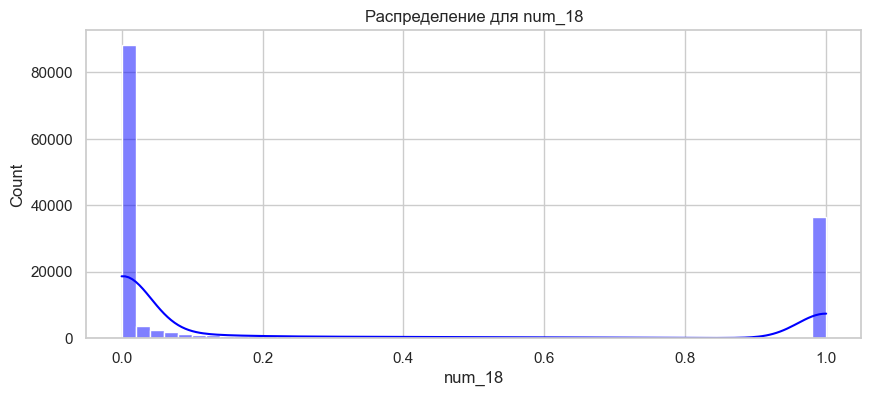

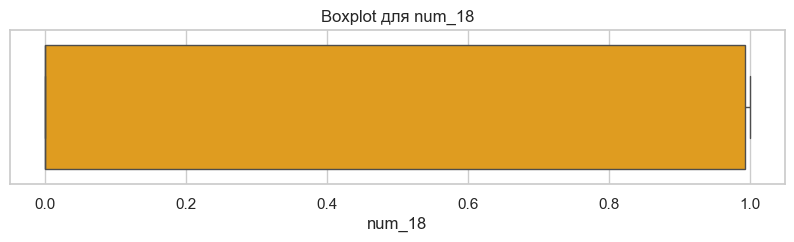

Статистические характеристики для num_18:
count    145906.000000
mean          0.280155
std           0.428463
min           0.000000
25%           0.000000
50%           0.000000
75%           0.993831
max           1.000000
Name: num_18, dtype: float64




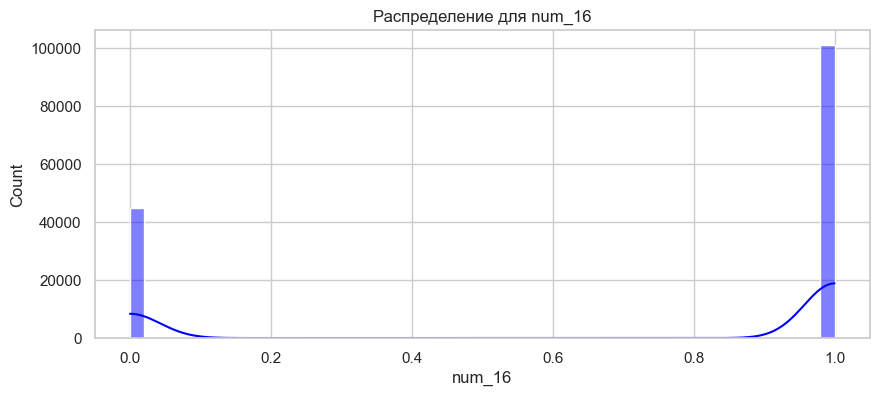

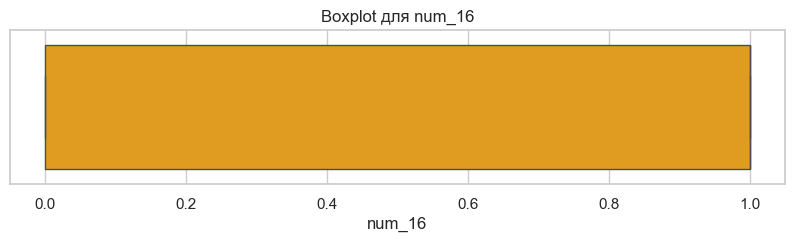

Статистические характеристики для num_16:
count    145906.000000
mean          0.692631
std           0.461405
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: num_16, dtype: float64




In [15]:
# Проверка взаимосвязей между признаками и целевой переменной;
# Анализ числовых переменных
num_cols = [col for col in train_data.columns if col.startswith('num_') and col != 'target']

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(train_data[col], bins=50, kde=True, color='blue')
    plt.title(f'Распределение для {col}')
    plt.show()
    
    # Boxplot для выявления выбросов
    plt.figure(figsize=(10,2))
    sns.boxplot(x=train_data[col], color='orange')
    plt.title(f'Boxplot для {col}')
    plt.show()
    
    print(f"Статистические характеристики для {col}:")
    print(train_data[col].describe())
    print("\n")
    

In [16]:
# Это точно ToDo - здесь можно неделю анализировать, поэтому
# Для каждого графика я определю три папки: гистаграммные графики, ящики с усами, и анотоция в виде статистики
# Определение папок для сохранения графиков и аннотаций
hist_dir = 'num/plots/histograms'
boxplot_dir = 'num/plots/boxplots'
annotation_dir = 'num/annotations'

# Создание папок, если они не существуют:
os.makedirs(hist_dir, exist_ok=True)
os.makedirs(boxplot_dir, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Определение числовых признаков
num_cols = [col for col in train_data.columns if col.startswith('num_') and col != 'target']

for col in num_cols:
    # Сохранение гистограммы
    plt.figure(figsize=(10, 4))
    sns.histplot(train_data[col], bins=50, kde=True, color='blue')
    plt.title(f'Распределение для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    
    hist_path = os.path.join(hist_dir, f'{col}_hist.png')
    plt.savefig(hist_path)
    plt.close()
    
    # Сохранение бокс-плота
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=train_data[col], color='orange')
    plt.title(f'Boxplot для {col}')
    plt.xlabel(col)
    
    boxplot_path = os.path.join(boxplot_dir, f'{col}_boxplot.png')
    plt.savefig(boxplot_path)
    plt.close()
    
    # Сохранение статистических характеристик в текстовый файл
    describe_stats = train_data[col].describe()
    annotation_path = os.path.join(annotation_dir, f'{col}_describe.txt')
    
    with open(annotation_path, 'w', encoding='utf-8') as file:
        file.write(f"Статистические характеристики для {col}:\n")
        file.write(describe_stats.to_string())
        file.write("\n")
    
    print(f"Графики и аннотации для {col} сохранены.")


Графики и аннотации для num_0 сохранены.
Графики и аннотации для num_7 сохранены.
Графики и аннотации для num_36 сохранены.
Графики и аннотации для num_2 сохранены.
Графики и аннотации для num_24 сохранены.
Графики и аннотации для num_27 сохранены.
Графики и аннотации для num_1 сохранены.
Графики и аннотации для num_43 сохранены.
Графики и аннотации для num_39 сохранены.
Графики и аннотации для num_10 сохранены.
Графики и аннотации для num_23 сохранены.
Графики и аннотации для num_40 сохранены.
Графики и аннотации для num_22 сохранены.
Графики и аннотации для num_47 сохранены.
Графики и аннотации для num_38 сохранены.
Графики и аннотации для num_17 сохранены.
Графики и аннотации для num_35 сохранены.
Графики и аннотации для num_3 сохранены.
Графики и аннотации для num_52 сохранены.
Графики и аннотации для num_48 сохранены.
Графики и аннотации для num_53 сохранены.
Графики и аннотации для num_28 сохранены.
Графики и аннотации для num_4 сохранены.
Графики и аннотации для num_21 сохранены

Проведу анализ по первой колонкам с самой высокой корреляцией:
 - num_39    0.611829

   Основыне наблюдения по num_39
    - Медиана (50%): 14
    - Интерквартильный размах (IQR): Q3 - Q1 = 28 - 6 = 22
    - Минимальное значение: 3
    - Максимальное значение: 15637
    - Среднее значение: 38.6
    - Стандартное отклонение: 202.08
    - Ящик с усами показал огромное значение выбросов
    - Для данной колонки можно применить логарифмирование или другого вида преобразования для снижения влияния выбросов (например заменить выбросы на верхнюю границу уса.).

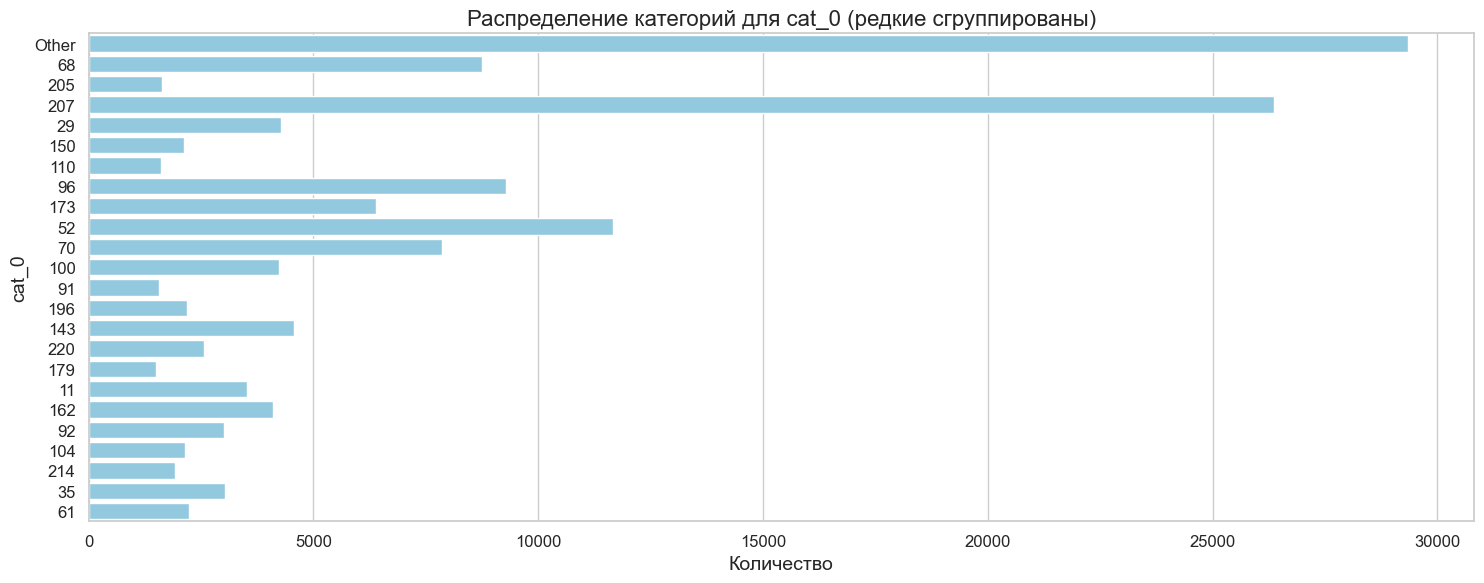

График распределения для cat_0 сохранён в cat/plots\cat_0_countplot.png
Количество уникальных категорий в cat_0: 24



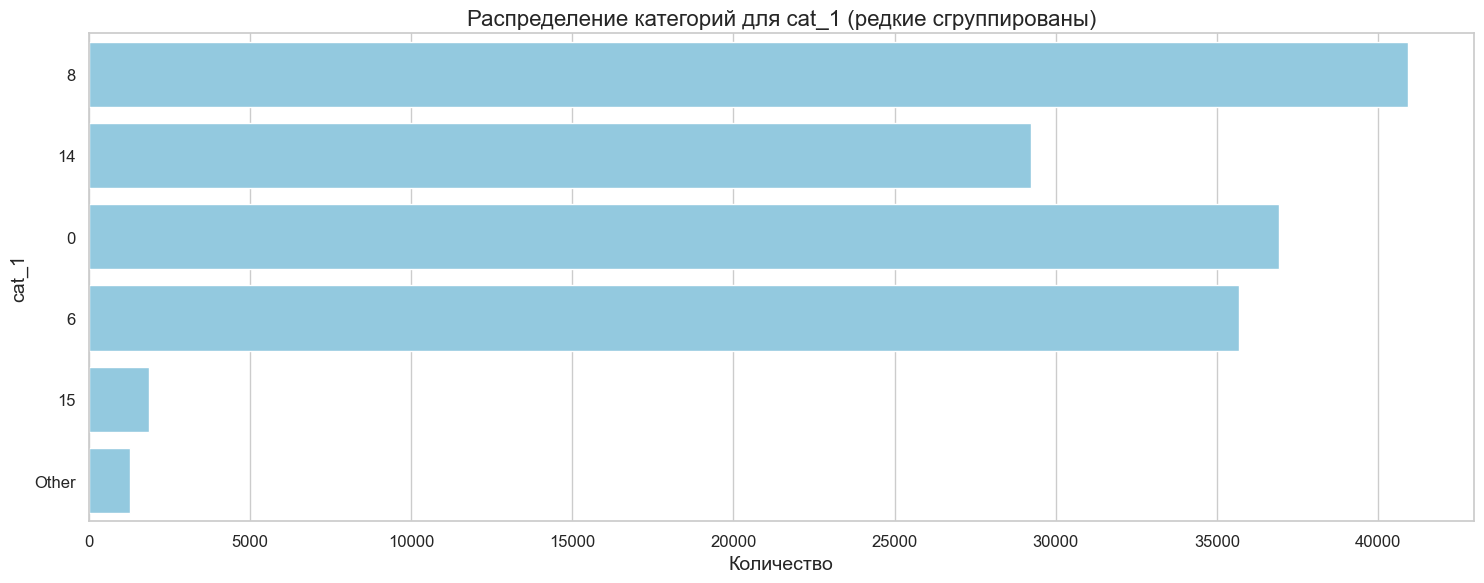

График распределения для cat_1 сохранён в cat/plots\cat_1_countplot.png
Количество уникальных категорий в cat_1: 6



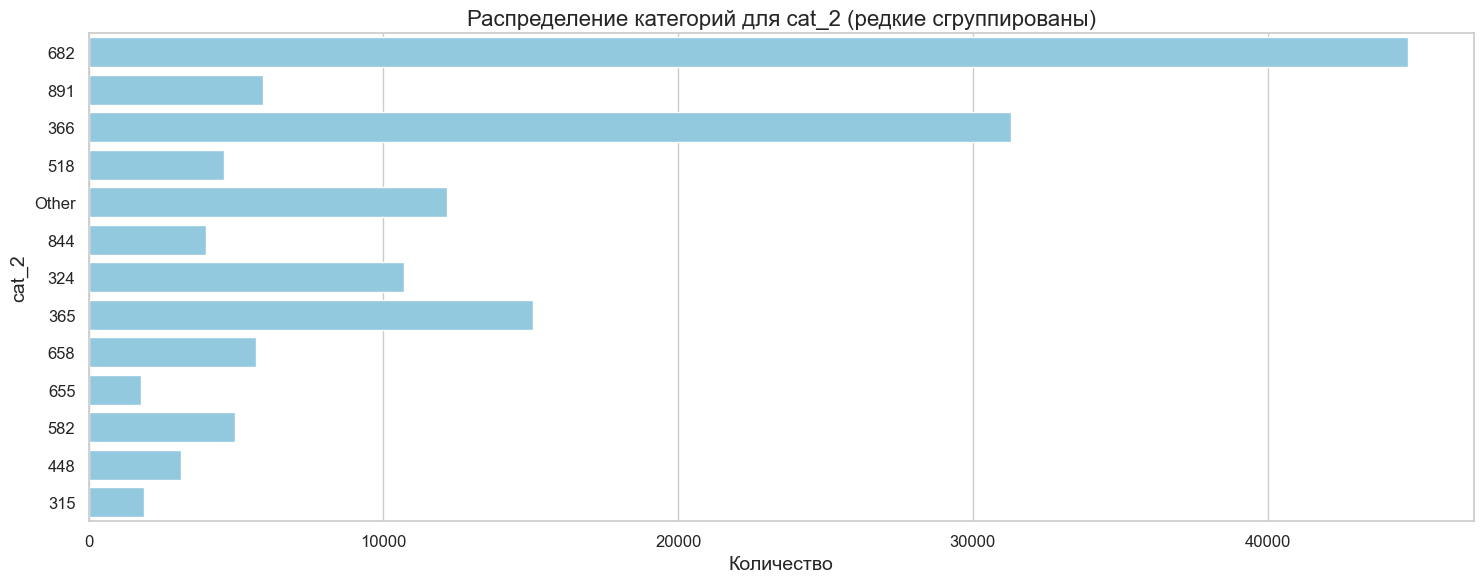

График распределения для cat_2 сохранён в cat/plots\cat_2_countplot.png
Количество уникальных категорий в cat_2: 13



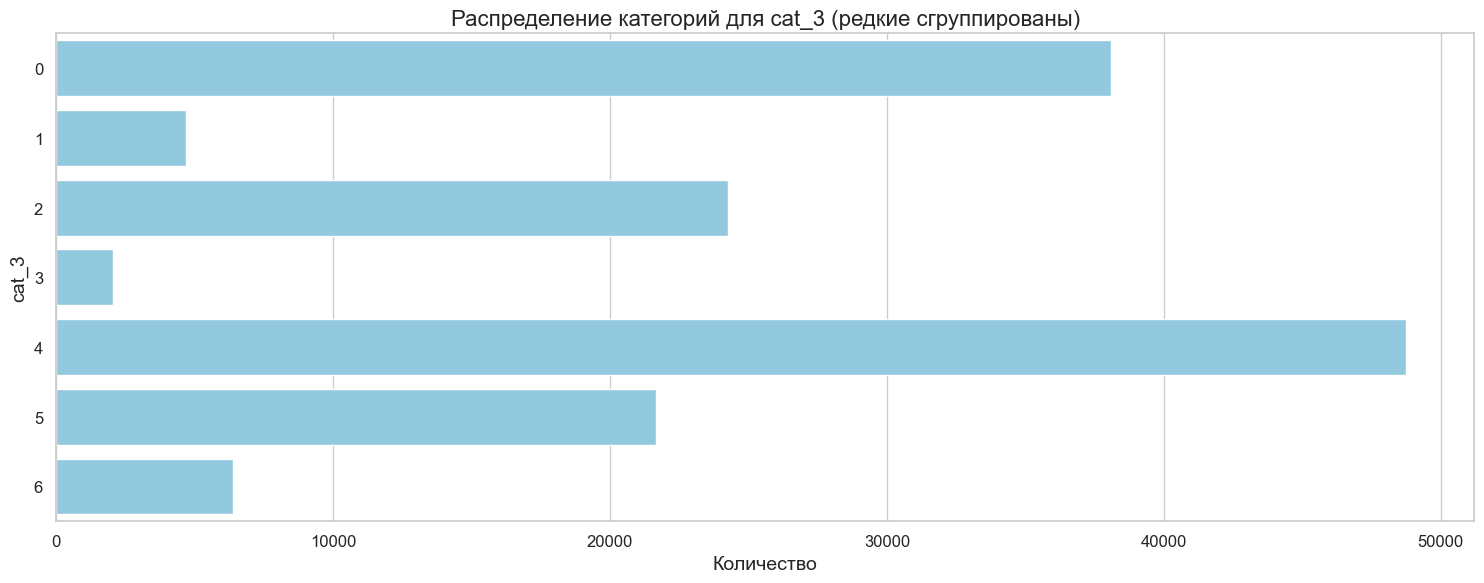

График распределения для cat_3 сохранён в cat/plots\cat_3_countplot.png
Количество уникальных категорий в cat_3: 7



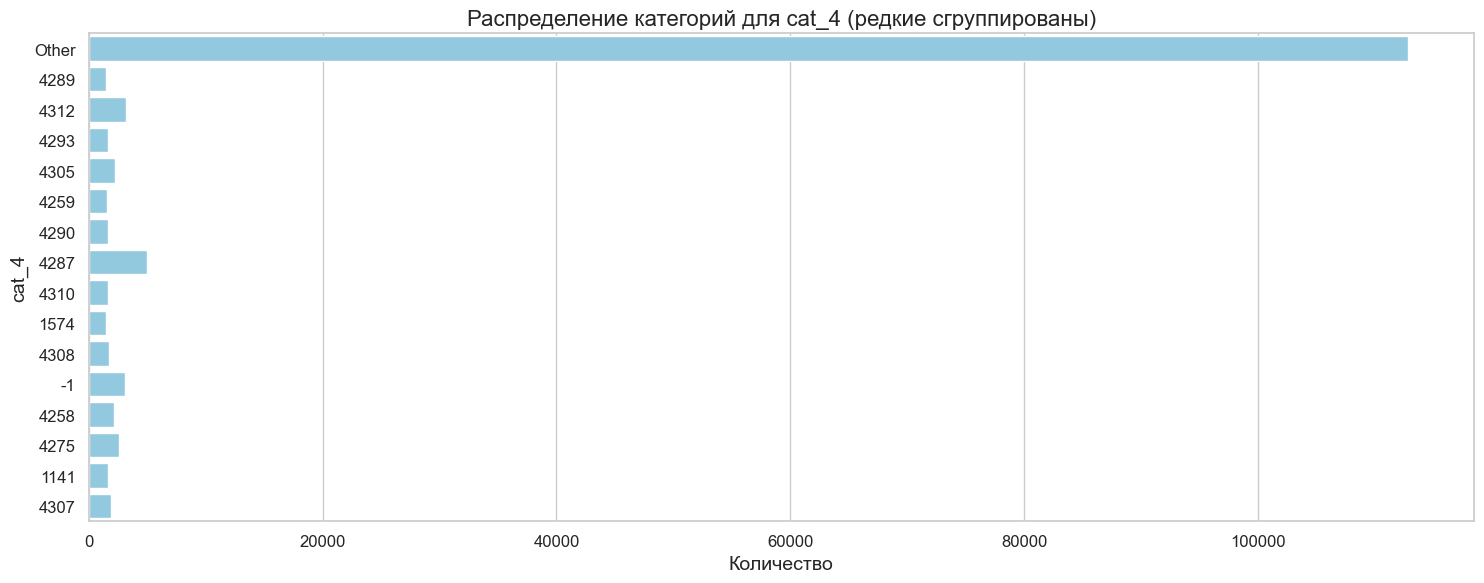

График распределения для cat_4 сохранён в cat/plots\cat_4_countplot.png
Количество уникальных категорий в cat_4: 16



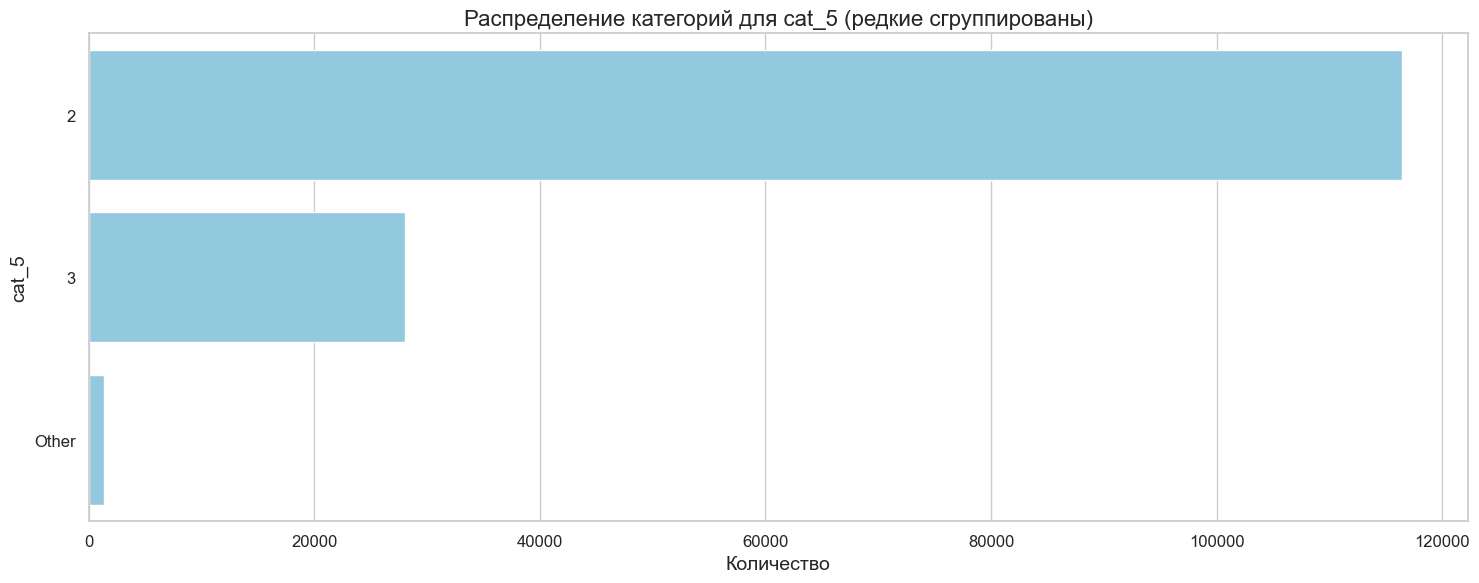

График распределения для cat_5 сохранён в cat/plots\cat_5_countplot.png
Количество уникальных категорий в cat_5: 3



In [17]:
# Создание папок для сохранения графиков и аннотаций, если они не существуют
plots_dir = 'cat/plots'
annotations_dir = 'cat/annotations'
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(annotations_dir, exist_ok=True)

# Определение категориальных признаков
cat_cols = [col for col in train_data.columns if col.startswith('cat_')]

# Функция для группировки редких категорий
def group_rare_categories(df, col, threshold=0.01):
    """
    Группирует редкие категории в одну категорию 'Other'.
    
    :param df: DataFrame
    :param col: Название столбца
    :param threshold: Порог частоты (например, 0.01 для 1%)
    :return: DataFrame с обновлённым столбцом
    """
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df[col] = df[col].replace(rare_categories, 'Other')
    return df

# Применение группировки редких категорий
for col in cat_cols:
    train_data = group_rare_categories(train_data, col, threshold=0.01)
    test_data = group_rare_categories(test_data, col, threshold=0.01)

# Визуализация распределения категориальных признаков
for col in cat_cols:
    plt.figure(figsize=(15, 6))  
    sns.countplot(y=col, data=train_data, color='skyblue')  # Использование единого цвета вместо палитры
    plt.title(f'Распределение категорий для {col} (редкие сгруппированы)', fontsize=16)
    plt.xlabel('Количество', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Автоматическая подгонка элементов фигуры
    
    # Сохранение графика в папку cat/plots
    plot_path = os.path.join(plots_dir, f'{col}_countplot.png')
    plt.savefig(plot_path)
    
    plt.show()
    
    plt.close()  # Закрытие фигуры для освобождения памяти
    
    # Сохранение аннотаций в папку cat/annotations
    annotation_path = os.path.join(annotations_dir, f'{col}_countplot_annotation.txt')
    unique_categories = train_data[col].nunique()
    with open(annotation_path, 'w', encoding='utf-8') as f:
        f.write(f"Количество уникальных категорий в {col}: {unique_categories}\n")
    
    print(f"График распределения для {col} сохранён в {plot_path}")
    print(f"Количество уникальных категорий в {col}: {unique_categories}\n")


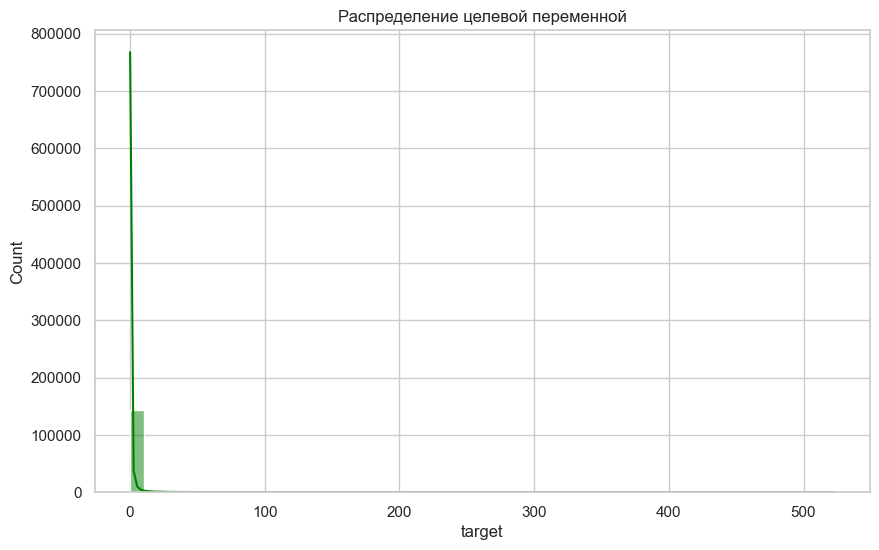


Статистические характеристики целевой переменной:
count    145906.000000
mean          1.038924
std           7.699504
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         523.083931
Name: target, dtype: float64


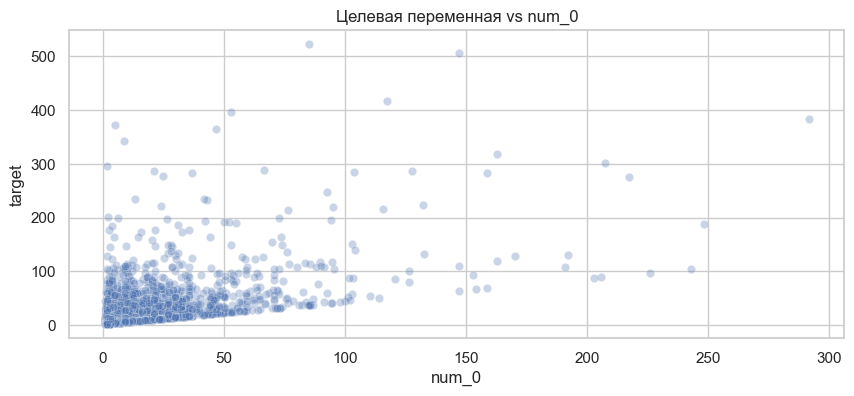

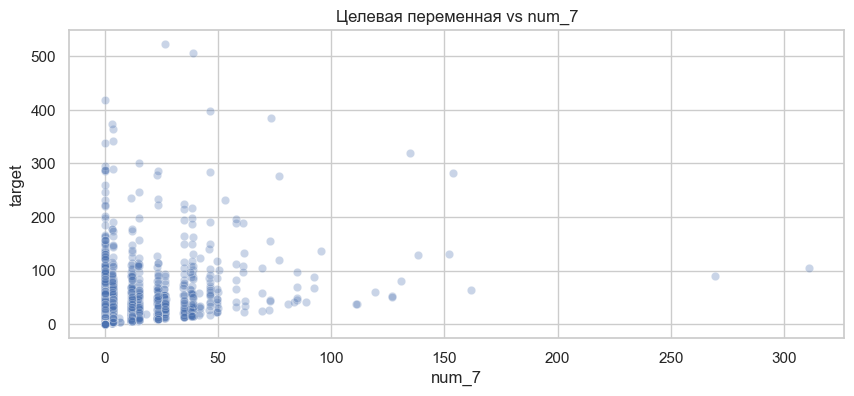

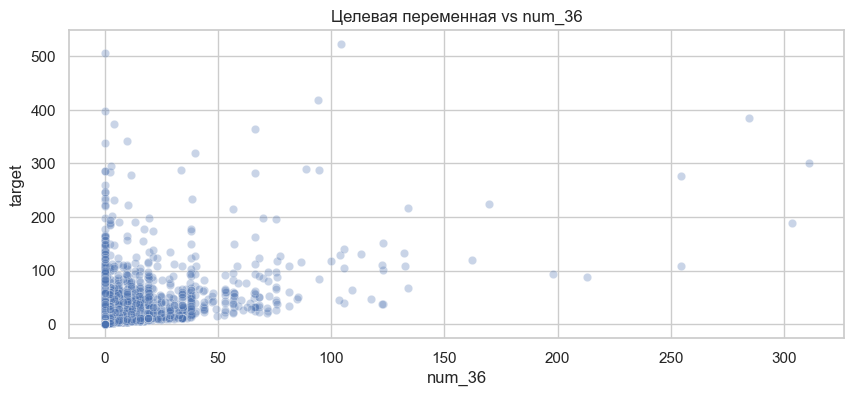

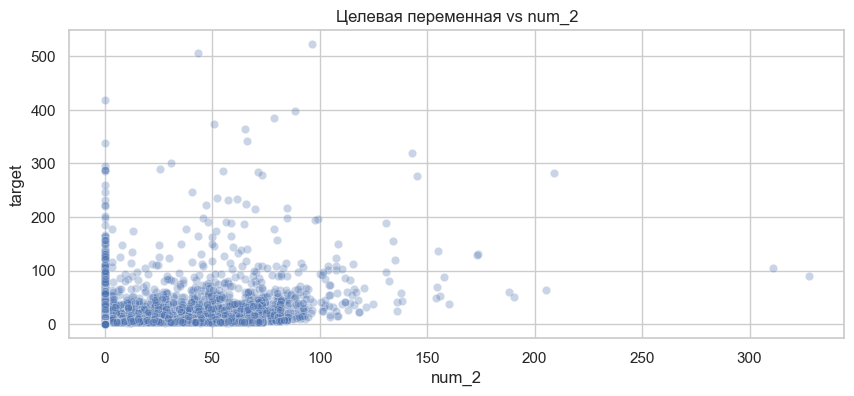

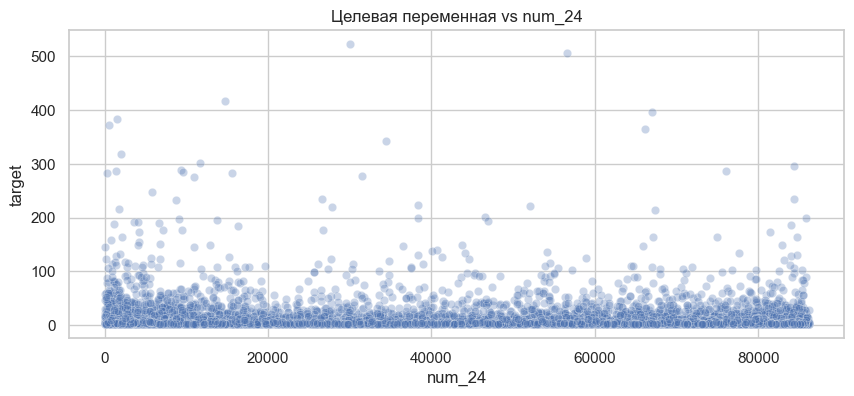

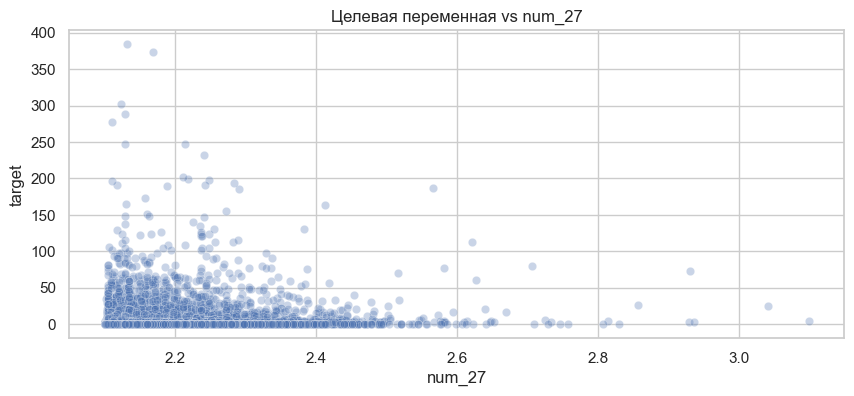

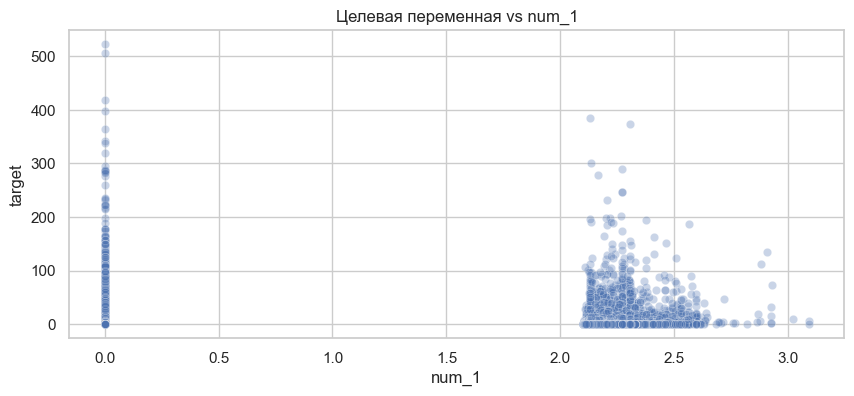

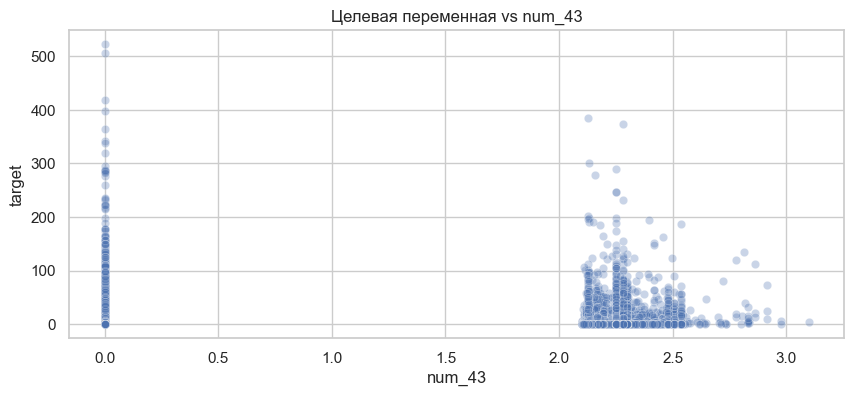

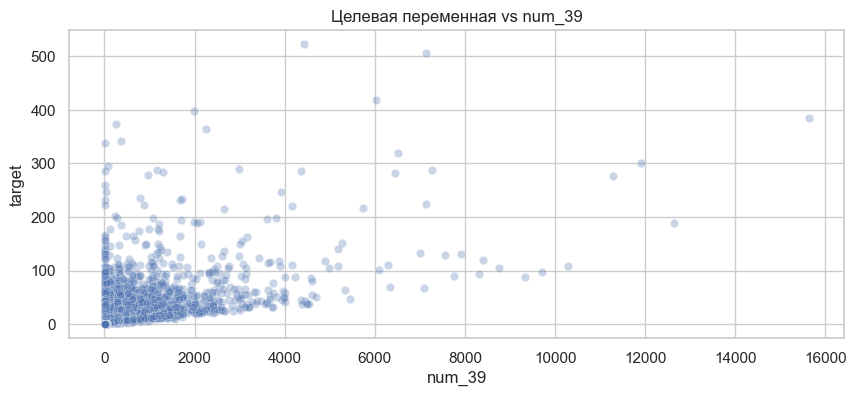

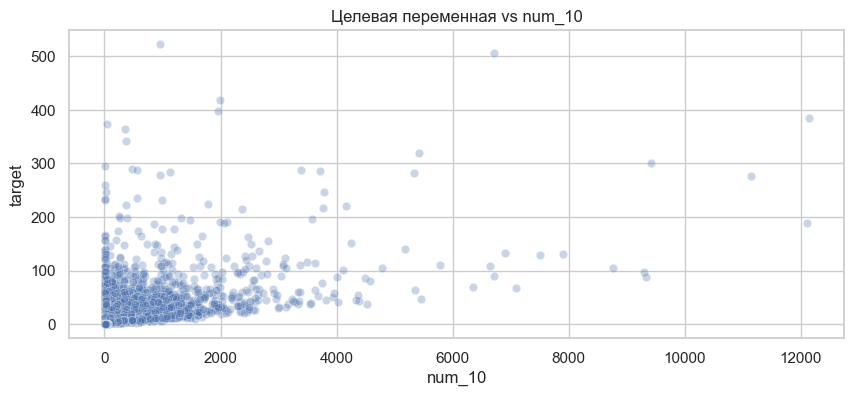

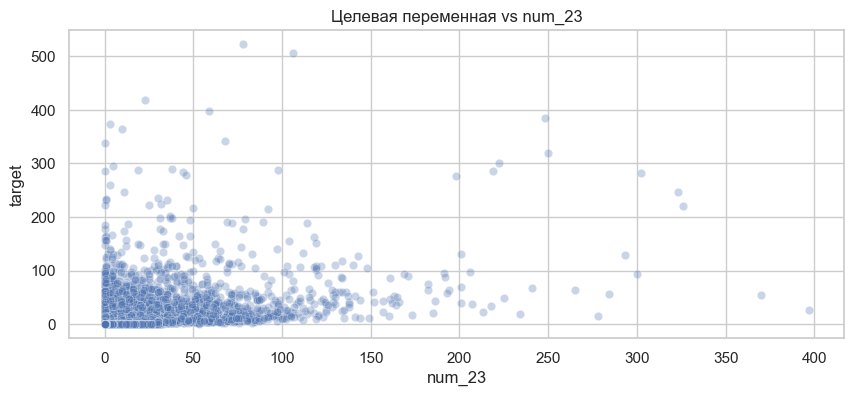

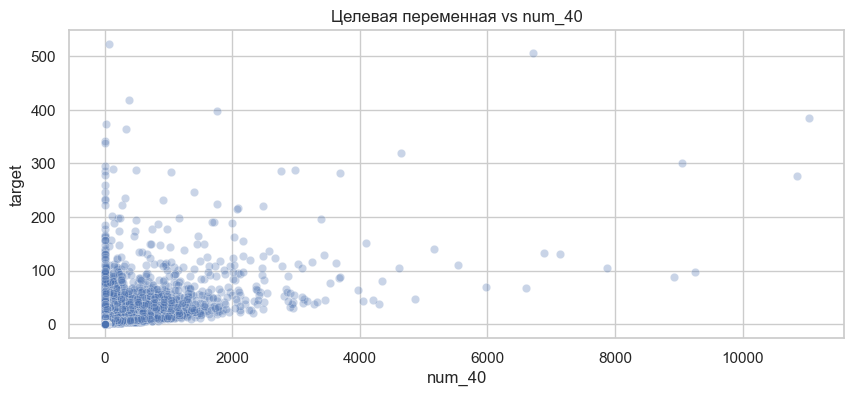

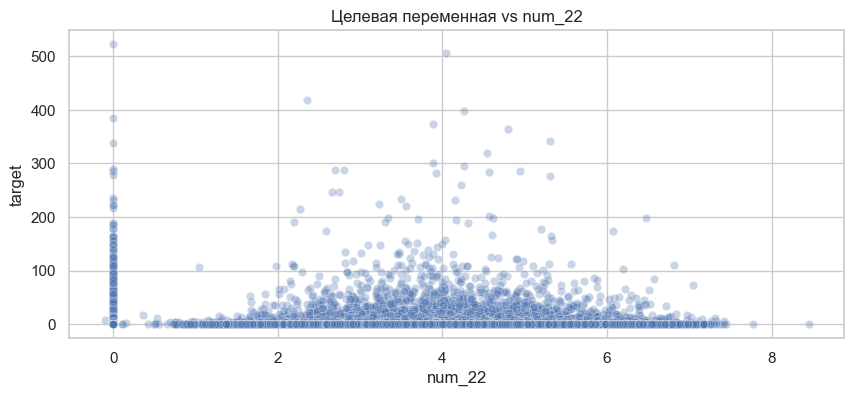

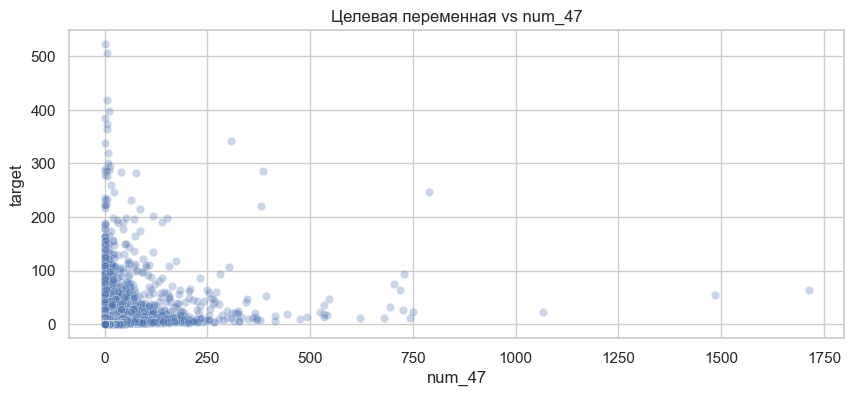

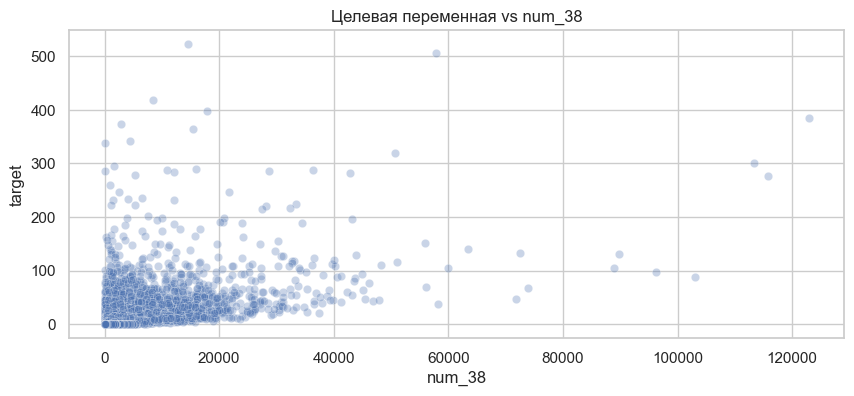

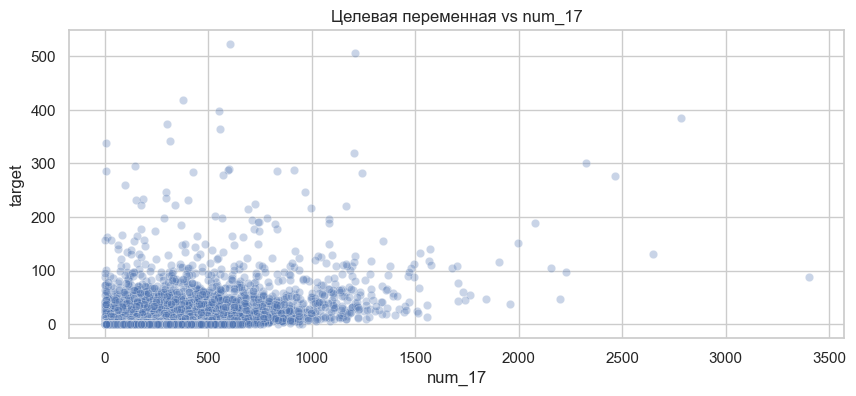

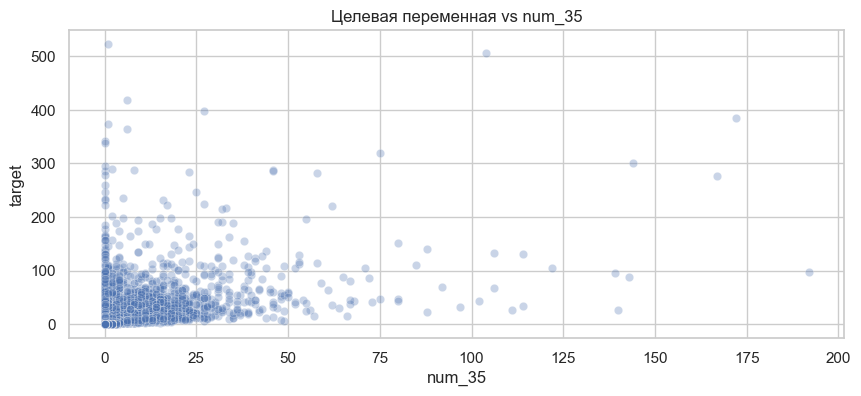

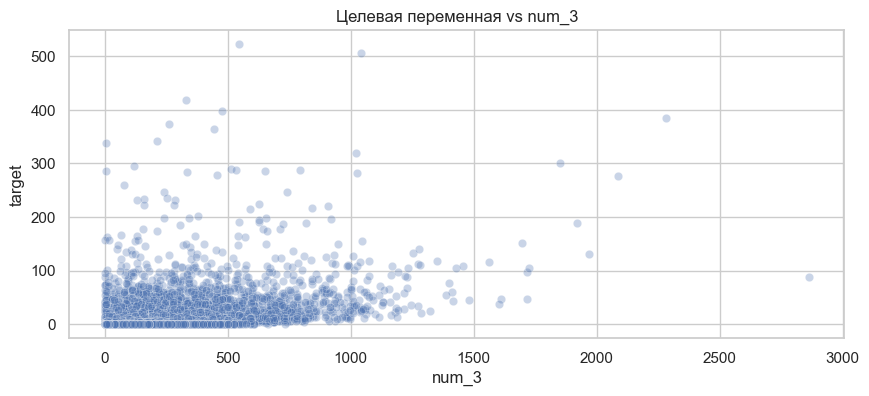

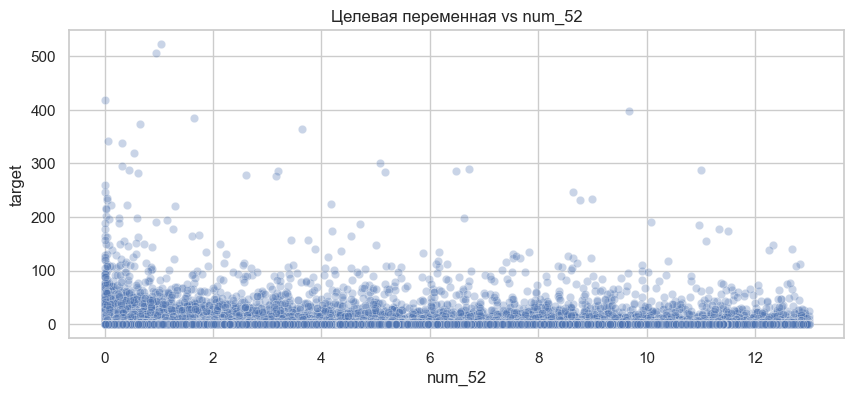

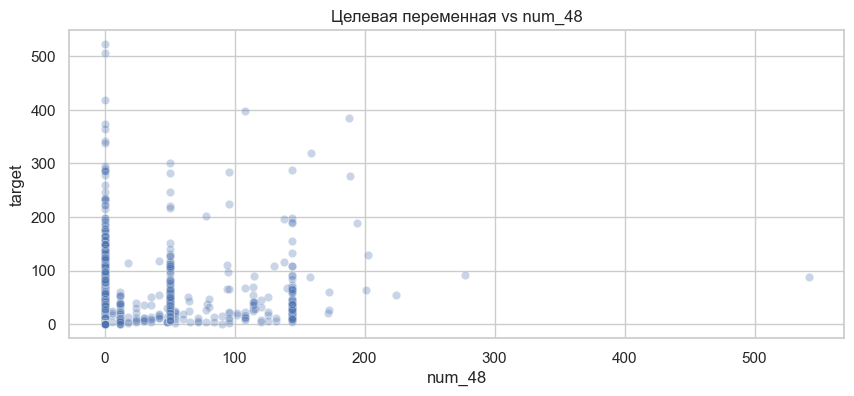

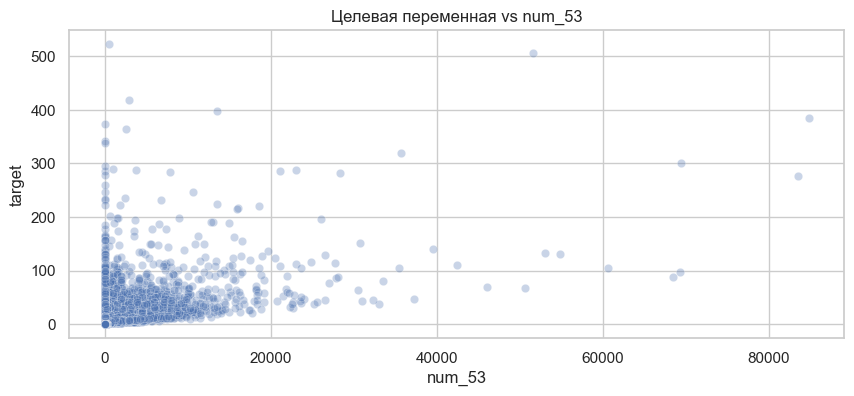

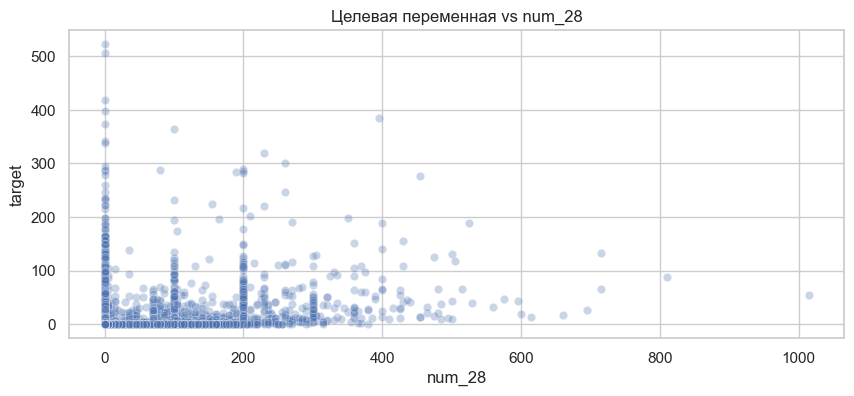

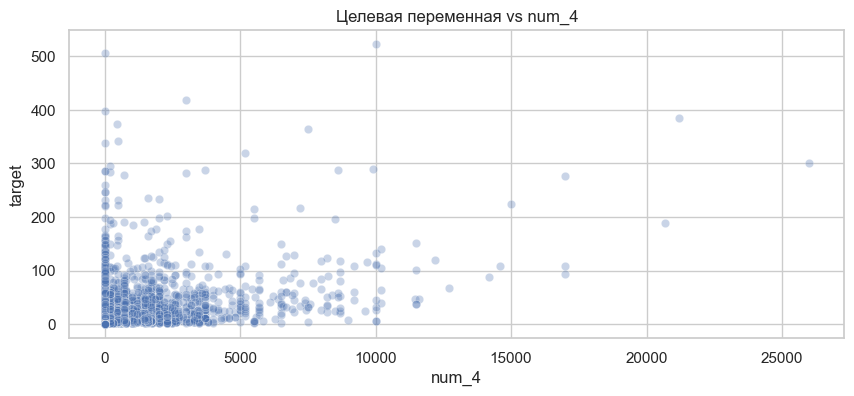

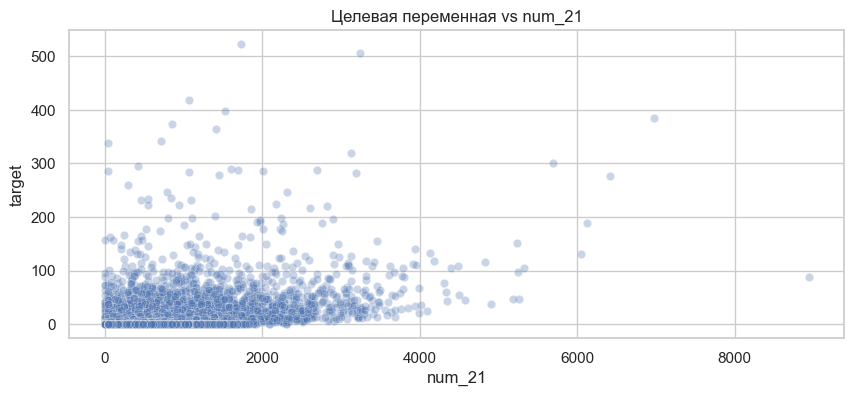

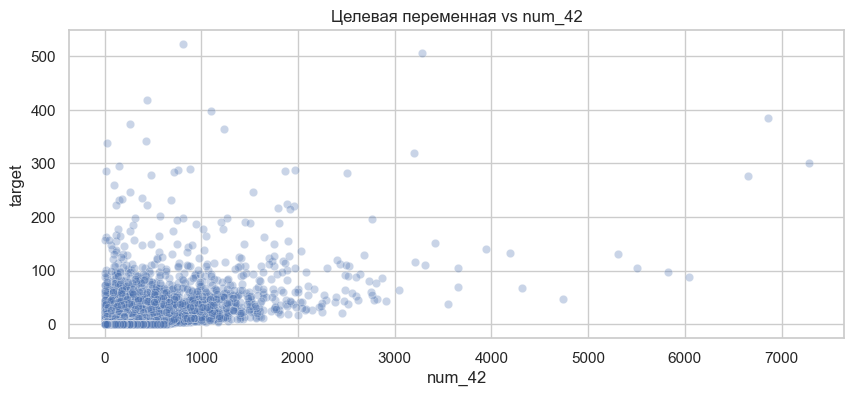

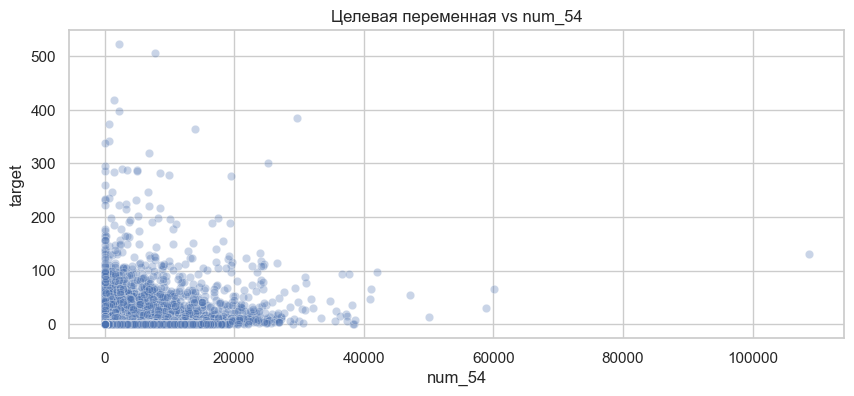

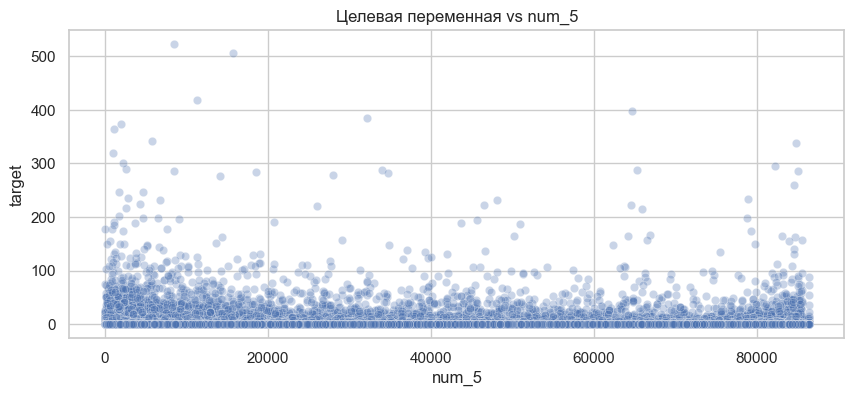

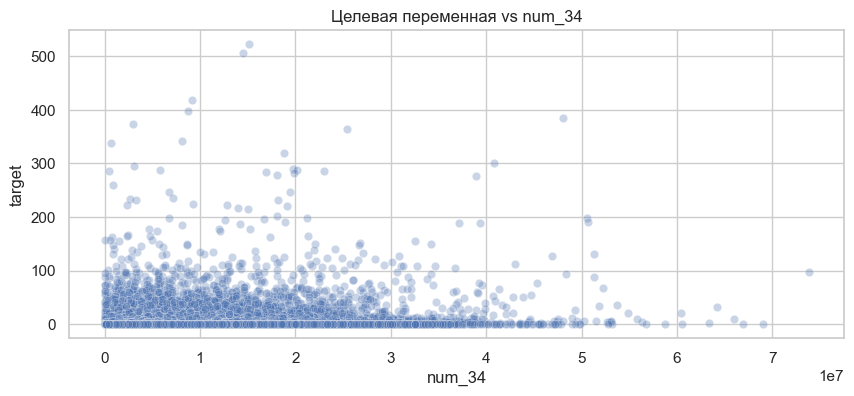

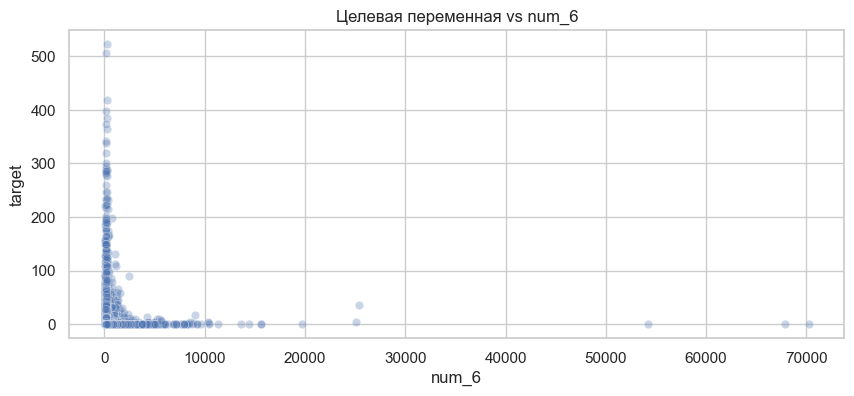

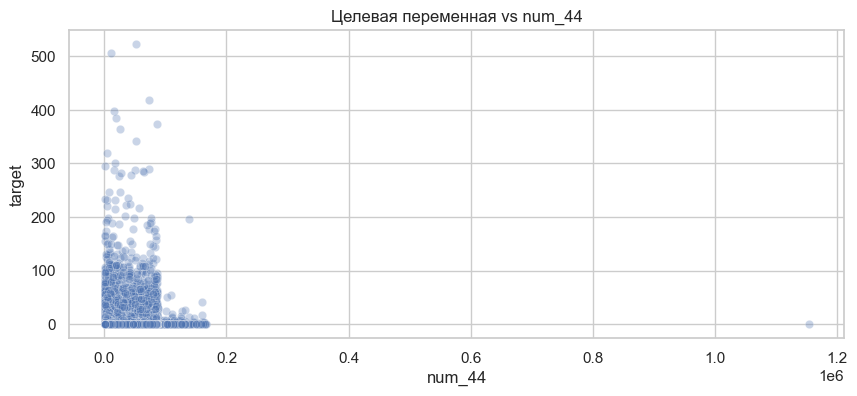

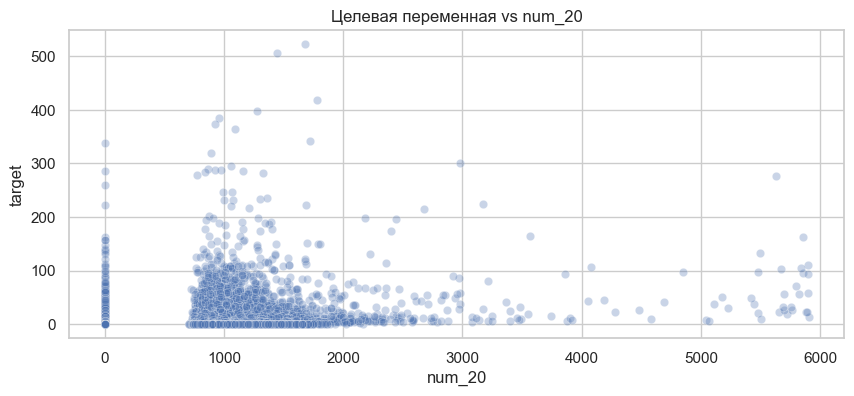

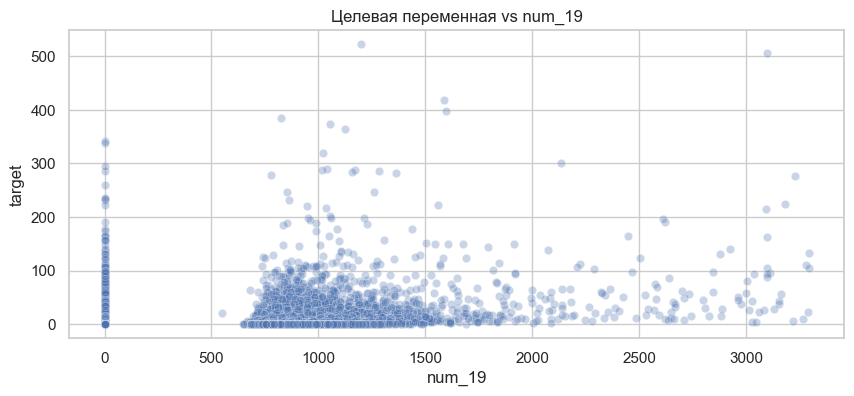

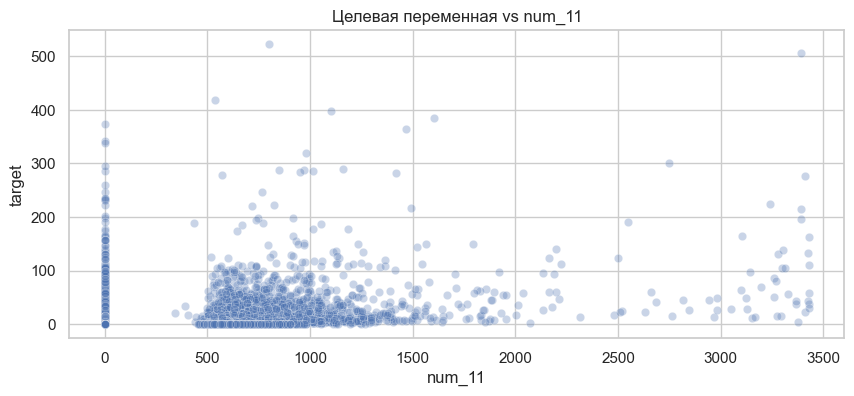

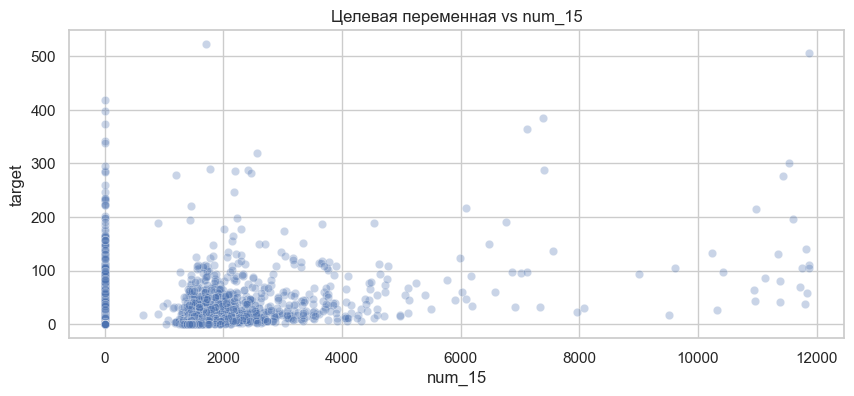

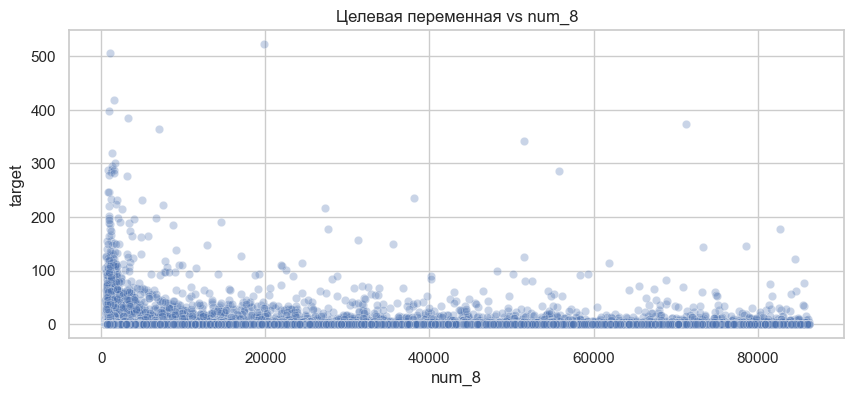

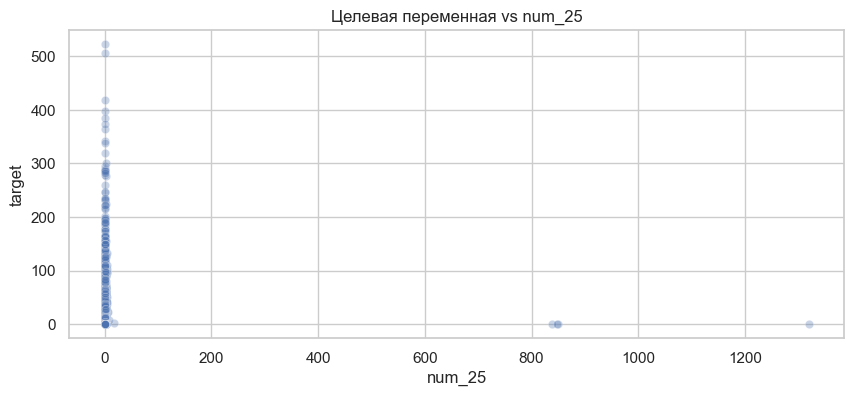

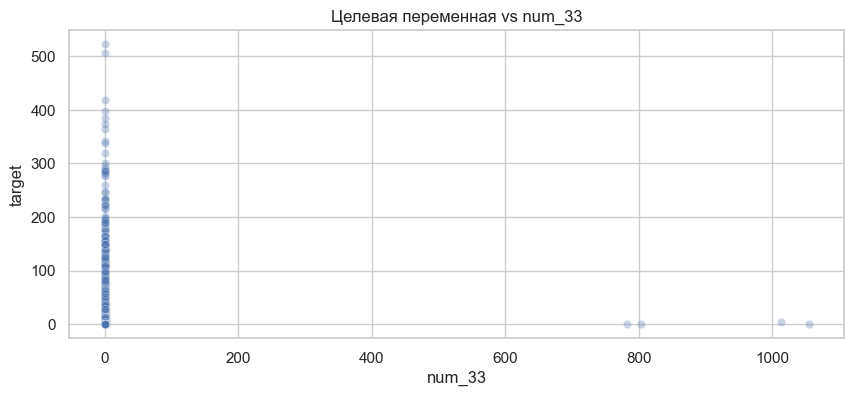

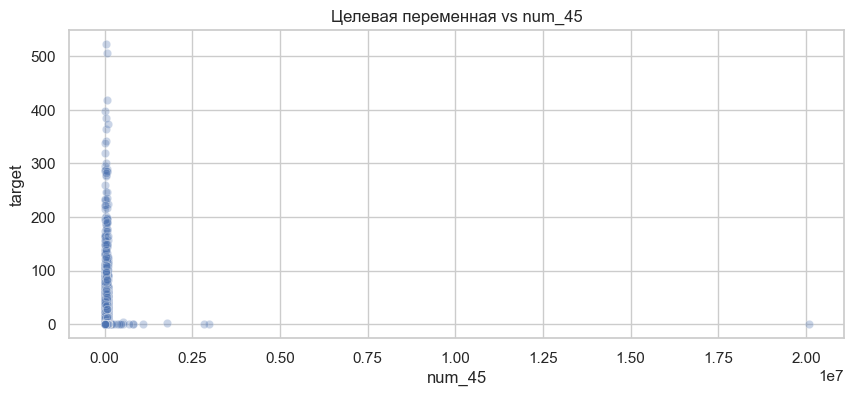

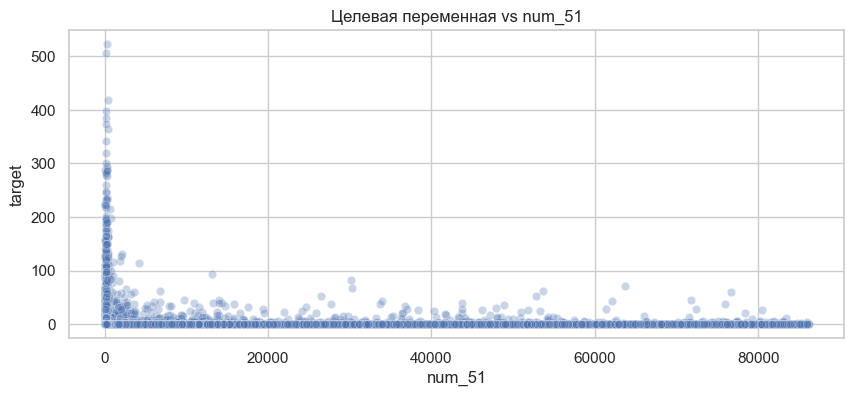

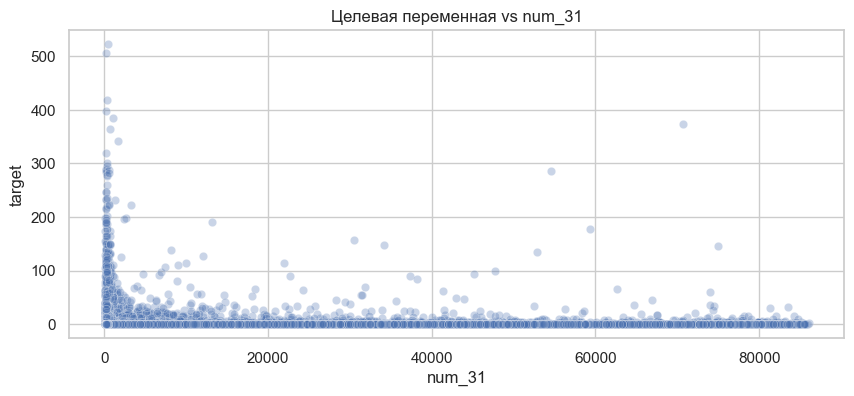

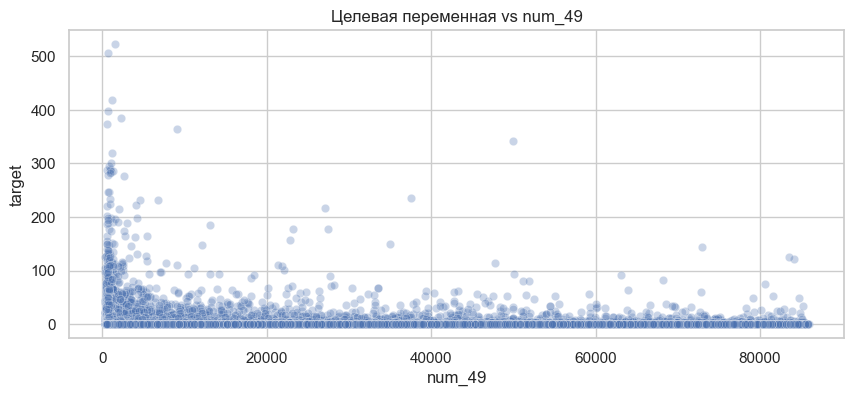

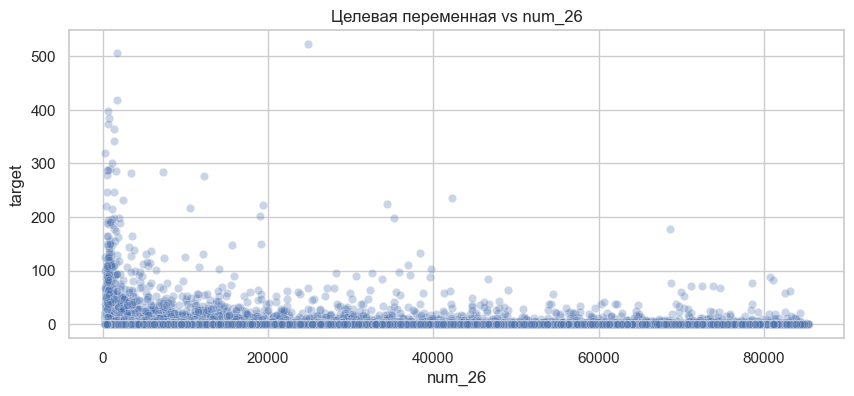

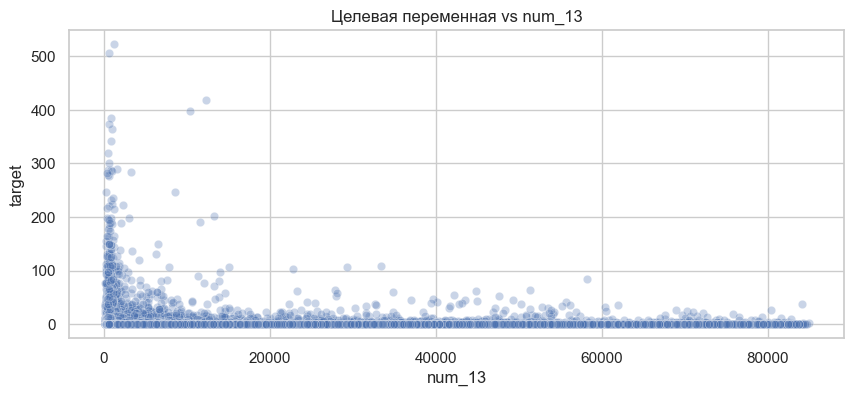

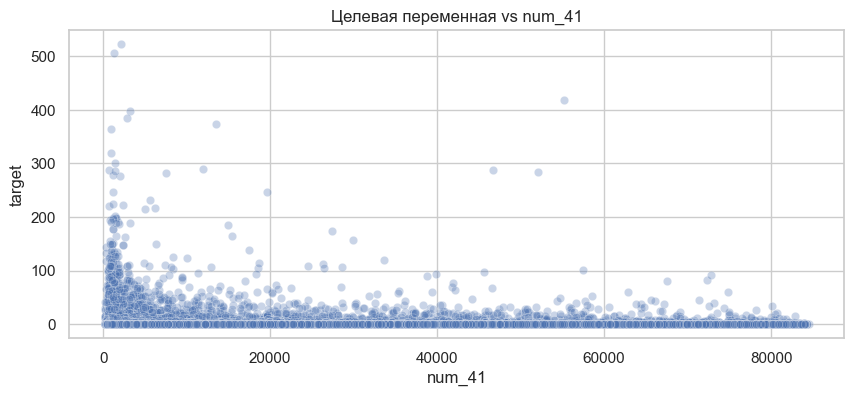

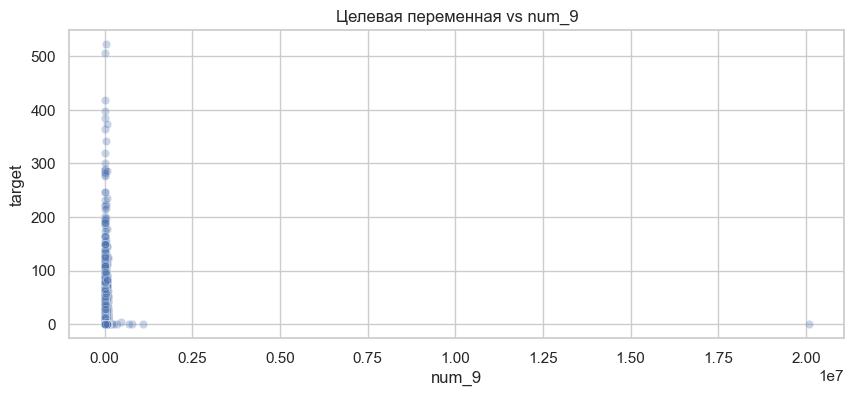

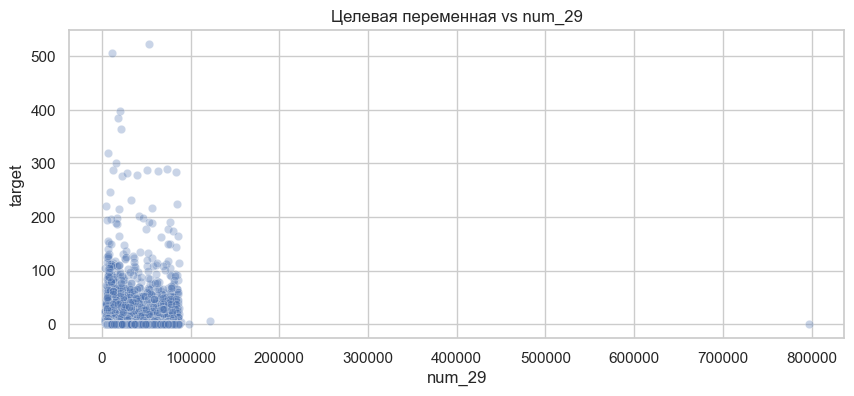

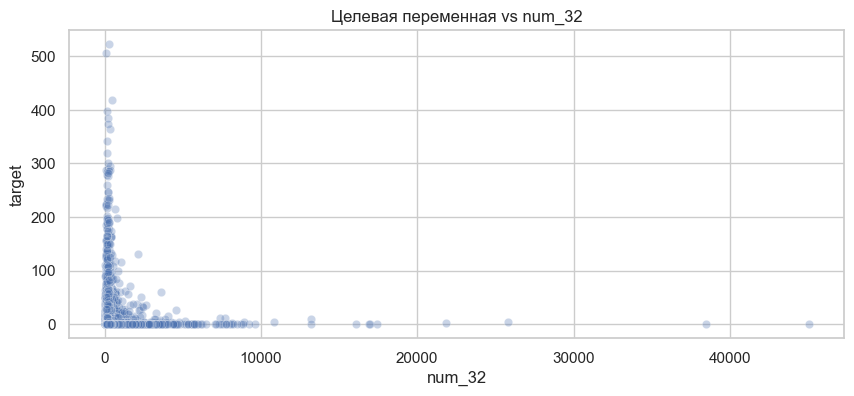

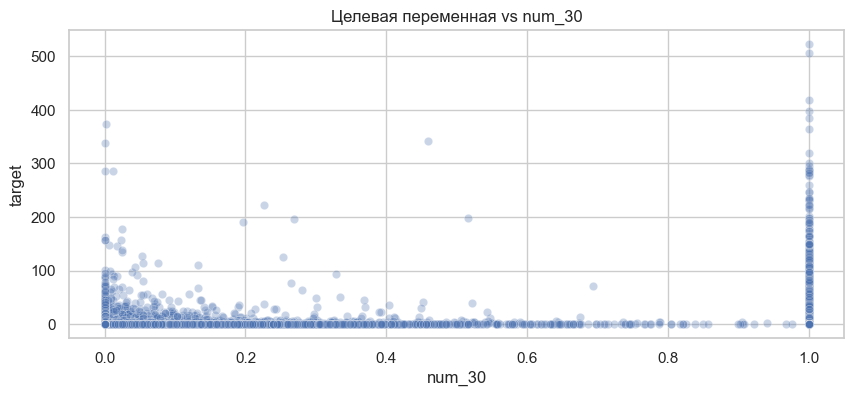

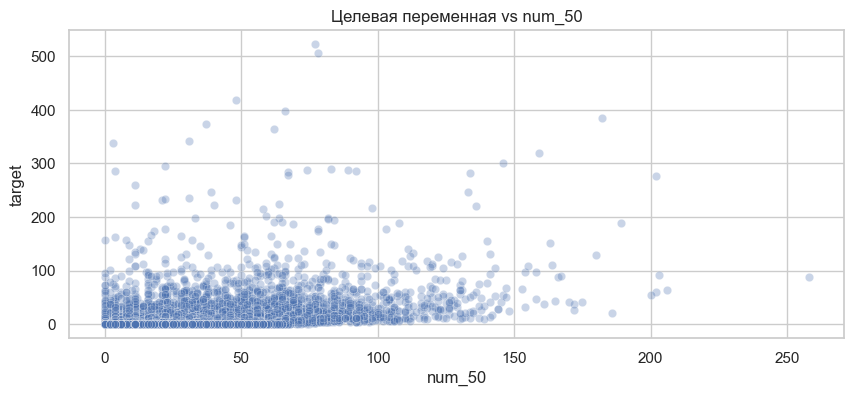

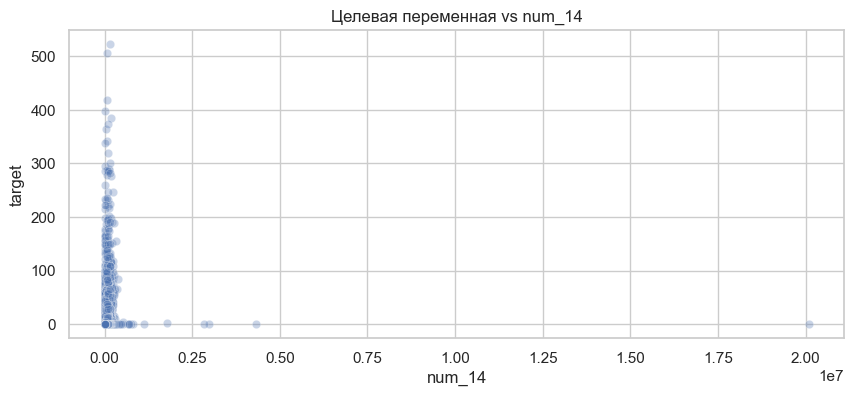

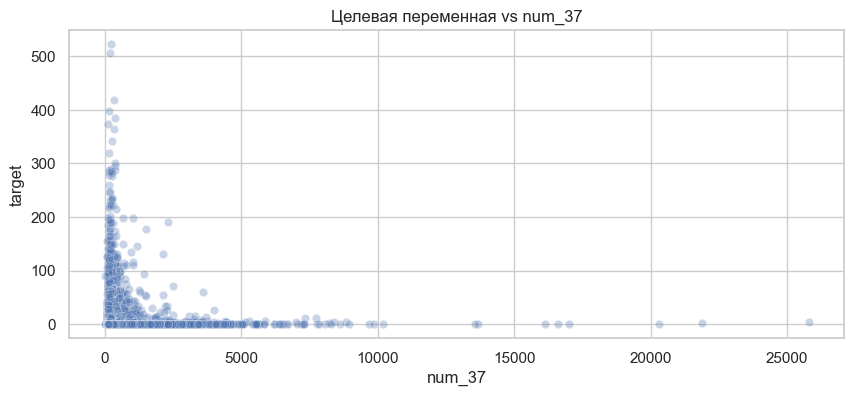

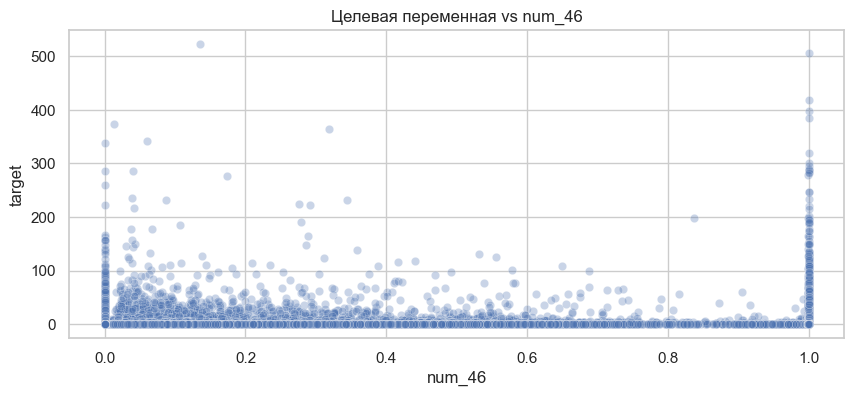

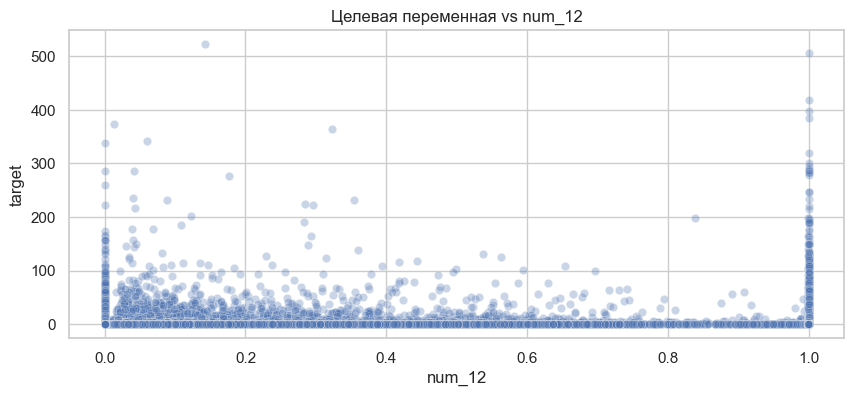

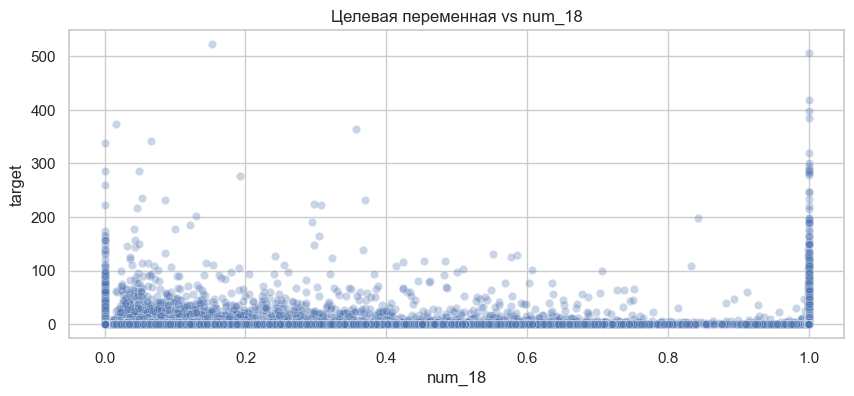

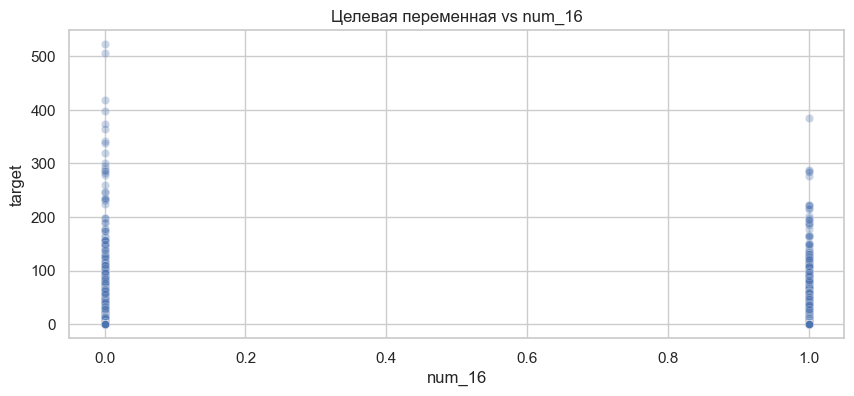

In [18]:
# Исследование целевой переменной
plt.figure(figsize=(10,6))
sns.histplot(train_data['target'], bins=50, kde=True, color='green')
plt.title('Распределение целевой переменной')
plt.show()

print("\nСтатистические характеристики целевой переменной:")
print(train_data['target'].describe())

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=train_data[col], y=train_data['target'], alpha=0.3)
    plt.title(f'Целевая переменная vs {col}')
    plt.show()
    

Количество выбросов в num_0: 875


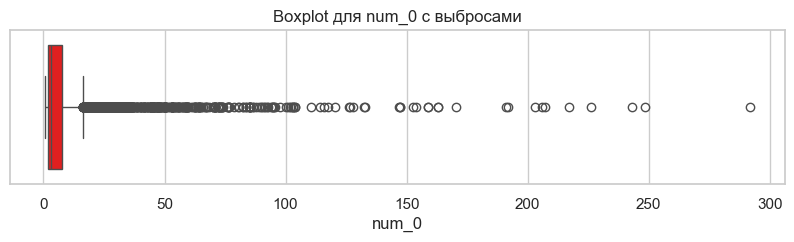

In [19]:
# Выявление выбросов для одного признака
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

sample_col = num_cols[0]
outliers = detect_outliers(train_data, sample_col)
print(f"Количество выбросов в {sample_col}: {outliers.shape[0]}")

plt.figure(figsize=(10,2))
sns.boxplot(x=train_data[sample_col], color='red')
plt.title(f'Boxplot для {sample_col} с выбросами')
plt.show()


In [20]:
# Выводы, важно понять как обрабатывать значения, я покажу план, все ниже это ToDO
# Для меня время имеет ценность, поэтому я ограничила выполнение тз 8-ми часами

In [21]:
# Важно решить, как обрабатывать пропущенные значения.
# Простая импутация:
from sklearn.impute import SimpleImputer

# Импутация числовых данных средним
num_imputer = SimpleImputer(strategy='mean')
train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])
test_data[num_cols] = num_imputer.transform(test_data[num_cols])

# Импутация категориальных данных модой
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])
test_data[cat_cols] = cat_imputer.transform(test_data[cat_cols])


Тонкое место такого подхода:
 - Замена пропусков на среднее значение может сгладить распределение данных, уменьшая дисперсию и делая распределение более симметричным;
 - Если данные имеют асимметричное распределение (скошенность), среднее может быть не лучшим представителем центральной тенденции;
 - Замена модой: замена пропусков на наиболее частую категорию может привести к перенасыщению этой категории, особенно если пропусков много;
 - Это может искажать истинное распределение категориальных признаков, делая модель склонной к предсказанию наиболее частой категории;
 - Простая импутация уменьшает разнообразие данных, особенно если пропусков много, что может негативно сказаться на способности модели обобщать;
 - Если пропущенные значения не случайны (например, Missing Not At Random - MNAR), простая импутация может ввести систематическое смещение в данные;
 - Среднее и мода могут не учитывать зависимости между признаками и целевой переменной, что ведёт к неправильным предположениям о данных;
 - Простые методы импутации не учитывают корреляции или взаимосвязи между различными признаками, что может быть важным для точной импутации;
 - Среднее может быть чувствительно к выбросам. Если в данных присутствуют экстремальные значения, среднее может не отражать центральную тенденцию адекватно;
 - Мода в категориальных признаках может не учитывать редкие, но важные категории, заменяя их на 'Other';
 - Все пропущенные значения заменяются одним и тем же значением (средним или модой), независимо от контекста или других признаков, что может быть неэффективно.

In [22]:
# Мультивариантная импутация:
# Если вы решите использовать более сложные методы импутации, такие как итеративная импутация, для этого потребуется достаточно вычислительных ресурсов.

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Итеративная импутация
iter_imputer = IterativeImputer(random_state=123)
train_data[num_cols] = iter_imputer.fit_transform(train_data[num_cols])
test_data[num_cols] = iter_imputer.transform(test_data[num_cols])


Тонкое место подхода:

 - Метод предполагает, что данные пропущены случайным образом (Missing At Random, MAR). Если данные пропущены не случайно (Missing Not At Random, MNAR), импутация может ввести систематические искажения. Импутированные значения могут быть смещены, что негативно скажется на качестве модели;
 - По умолчанию IterativeImputer использует BayesianRidge в качестве базовой модели регрессии. Этот выбор может не быть оптимальным для всех типов данных. Некорректная модель регрессии может привести к неточным импутациям, особенно если данные не соответствуют предположениям модели;
 - Наличие выбросов в данных может повлиять на качество импутации, так как модели регрессии могут быть чувствительны к экстремальным значениям, а выбросов в данных очень много - это показали ящики с усами;
 - IterativeImputer может быть чувствителен к масштабированию признаков. Если признаки имеют разные масштабы, это может повлиять на производительность модели импутации;
 - Если модель импутации слишком сложна или данные содержат много шума, существует риск переобучения.

In [24]:
# Поэтому, важно уходить в трансформацию признаков
# Трансформация признаков
from sklearn.preprocessing import PowerTransformer

# Применение Yeo-Johnson трансформации
pt = PowerTransformer(method='yeo-johnson')
train_data[num_cols] = pt.fit_transform(train_data[num_cols])
test_data[num_cols] = pt.transform(test_data[num_cols])


In [25]:
# Нормализация или стандартизация
# Нормализация может улучшить сходимость некоторых моделей.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])


In [26]:
# Инженерия признаков
# Создание новых признаков на основе существующих может помочь модели уловить скрытые зависимости.

# Пример: создание нового признака как отношение двух существующих признаков
train_data['new_feature'] = train_data['num_0'] / (train_data['num_1'] + 1e-5)
test_data['new_feature'] = test_data['num_0'] / (test_data['num_1'] + 1e-5)


In [27]:
# Уменьшение размерности
# Если количество признаков слишком велико, рассмотрите методы уменьшения размерности, такие как PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=123)  # Сохраняем 95% дисперсии
train_pca = pca.fit_transform(train_data[num_cols])
test_pca = pca.transform(test_data[num_cols])

# Преобразуем обратно в DataFrame
train_pca_df = pd.DataFrame(train_pca, columns=[f'pca_{i}' for i in range(train_pca.shape[1])])
test_pca_df = pd.DataFrame(test_pca, columns=[f'pca_{i}' for i in range(test_pca.shape[1])])

# Объединяем с исходными данными (если необходимо)
train_data = pd.concat([train_data.drop(columns=num_cols), train_pca_df], axis=1)
test_data = pd.concat([test_data.drop(columns=num_cols), test_pca_df], axis=1)


Я предлагаю посмотреть на автоматизацию процесса с использование инструментов для автоматической реализации решения задачи регрессии.

Реализация в **pycaret.ipynb**